<a href="https://colab.research.google.com/github/axell2017/noobstuff/blob/master/SimpleNNnumber_sample_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modules

In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import tqdm
import tensorflow as tf


Using TensorFlow backend.


# PREPROCESS TEST DATA

In [2]:
train_path = 'C:/Users/Axell2017/Downloads/Code/PetImages'
categories = ['Dog', 'Cat']

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)




#test_labels = np.array(test_labels)
#test_samples = np.array(test_samples)

11493376/11490434 [==============================] - 0s 0us/step


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

  0.         0.         0.         0.        ]]


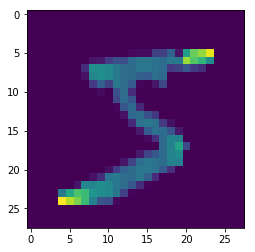

In [0]:
print(x_train[0])
plt.imshow(x_train[0])
plt.show()

In [0]:
print(y_train[3])

1


# MODEL

In [0]:
model = Sequential()
model.add(Flatten()) # converts our 3D feature maps into 1D feature vectors
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

validation_split = 0.1 = uses training data and splits 10% of it as testing/validation set as it trains on epochs.



In [0]:
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - ETA: 52s - loss: 0.0062 - acc: 1.00 - ETA: 1:13 - loss: 0.0321 - acc: 0.984 - ETA: 42s - loss: 0.0162 - acc: 0.994 - ETA: 21s - loss: 0.0121 - acc: 0.99 - ETA: 16s - loss: 0.0100 - acc: 0.99 - ETA: 15s - loss: 0.0114 - acc: 0.99 - ETA: 15s - loss: 0.0106 - acc: 0.99 - ETA: 13s - loss: 0.0092 - acc: 0.99 - ETA: 12s - loss: 0.0103 - acc: 0.99 - ETA: 12s - loss: 0.0094 - acc: 0.99 - ETA: 11s - loss: 0.0088 - acc: 0.99 - ETA: 10s - loss: 0.0080 - acc: 0.99 - ETA: 10s - loss: 0.0086 - acc: 0.99 - ETA: 10s - loss: 0.0089 - acc: 0.99 - ETA: 10s - loss: 0.0086 - acc: 0.99 - ETA: 9s - loss: 0.0085 - acc: 0.9972 - ETA: 9s - loss: 0.0087 - acc: 0.997 - ETA: 9s - loss: 0.0093 - acc: 0.996 - ETA: 9s - loss: 0.0094 - acc: 0.996 - ETA: 8s - loss: 0.0089 - acc: 0.997 - ETA: 9s - loss: 0.0087 - acc: 0.997 - ETA: 9s - loss: 0.0087 - acc: 0.997 - ETA: 9s - loss: 0.0086 - acc: 0.997 - ETA: 8s - loss:

60000/60000 [==============================] - ETA: 13s - loss: 6.7856e-05 - acc: 1.00 - ETA: 8s - loss: 0.0078 - acc: 0.9976     - ETA: 8s - loss: 0.0059 - acc: 0.997 - ETA: 7s - loss: 0.0049 - acc: 0.998 - ETA: 7s - loss: 0.0067 - acc: 0.997 - ETA: 7s - loss: 0.0091 - acc: 0.997 - ETA: 7s - loss: 0.0083 - acc: 0.997 - ETA: 7s - loss: 0.0083 - acc: 0.997 - ETA: 7s - loss: 0.0075 - acc: 0.997 - ETA: 7s - loss: 0.0068 - acc: 0.998 - ETA: 7s - loss: 0.0072 - acc: 0.998 - ETA: 7s - loss: 0.0079 - acc: 0.997 - ETA: 7s - loss: 0.0076 - acc: 0.997 - ETA: 7s - loss: 0.0086 - acc: 0.997 - ETA: 7s - loss: 0.0099 - acc: 0.997 - ETA: 7s - loss: 0.0099 - acc: 0.997 - ETA: 7s - loss: 0.0100 - acc: 0.996 - ETA: 7s - loss: 0.0098 - acc: 0.997 - ETA: 7s - loss: 0.0097 - acc: 0.996 - ETA: 7s - loss: 0.0102 - acc: 0.996 - ETA: 7s - loss: 0.0109 - acc: 0.996 - ETA: 6s - loss: 0.0111 - acc: 0.996 - ETA: 6s - loss: 0.0107 - acc: 0.996 - ETA: 6s - loss: 0.0111 - acc: 0.996 - ETA: 6s - loss: 0.0107 - acc: 0.

60000/60000 [==============================] - ETA: 16s - loss: 0.0063 - acc: 1.00 - ETA: 9s - loss: 0.0037 - acc: 1.0000 - ETA: 9s - loss: 0.0100 - acc: 0.995 - ETA: 9s - loss: 0.0075 - acc: 0.997 - ETA: 8s - loss: 0.0088 - acc: 0.996 - ETA: 8s - loss: 0.0075 - acc: 0.996 - ETA: 7s - loss: 0.0093 - acc: 0.995 - ETA: 8s - loss: 0.0085 - acc: 0.996 - ETA: 8s - loss: 0.0077 - acc: 0.996 - ETA: 8s - loss: 0.0074 - acc: 0.996 - ETA: 8s - loss: 0.0067 - acc: 0.996 - ETA: 8s - loss: 0.0066 - acc: 0.996 - ETA: 8s - loss: 0.0062 - acc: 0.997 - ETA: 8s - loss: 0.0065 - acc: 0.997 - ETA: 8s - loss: 0.0065 - acc: 0.997 - ETA: 8s - loss: 0.0062 - acc: 0.997 - ETA: 8s - loss: 0.0060 - acc: 0.997 - ETA: 7s - loss: 0.0059 - acc: 0.997 - ETA: 7s - loss: 0.0057 - acc: 0.997 - ETA: 7s - loss: 0.0056 - acc: 0.997 - ETA: 7s - loss: 0.0057 - acc: 0.997 - ETA: 7s - loss: 0.0055 - acc: 0.997 - ETA: 7s - loss: 0.0053 - acc: 0.998 - ETA: 7s - loss: 0.0054 - acc: 0.997 - ETA: 7s - loss: 0.0053 - acc: 0.998 - ET

60000/60000 [==============================] - ETA: 16s - loss: 3.3862e-06 - acc: 1.00 - ETA: 7s - loss: 0.0130 - acc: 0.9955     - ETA: 7s - loss: 0.0117 - acc: 0.996 - ETA: 7s - loss: 0.0109 - acc: 0.996 - ETA: 7s - loss: 0.0096 - acc: 0.995 - ETA: 7s - loss: 0.0086 - acc: 0.996 - ETA: 7s - loss: 0.0075 - acc: 0.996 - ETA: 7s - loss: 0.0094 - acc: 0.996 - ETA: 7s - loss: 0.0100 - acc: 0.995 - ETA: 7s - loss: 0.0099 - acc: 0.995 - ETA: 7s - loss: 0.0102 - acc: 0.995 - ETA: 7s - loss: 0.0103 - acc: 0.995 - ETA: 7s - loss: 0.0126 - acc: 0.995 - ETA: 7s - loss: 0.0122 - acc: 0.995 - ETA: 7s - loss: 0.0117 - acc: 0.995 - ETA: 7s - loss: 0.0121 - acc: 0.995 - ETA: 7s - loss: 0.0116 - acc: 0.996 - ETA: 7s - loss: 0.0112 - acc: 0.996 - ETA: 7s - loss: 0.0107 - acc: 0.996 - ETA: 7s - loss: 0.0106 - acc: 0.996 - ETA: 7s - loss: 0.0102 - acc: 0.996 - ETA: 7s - loss: 0.0102 - acc: 0.996 - ETA: 7s - loss: 0.0098 - acc: 0.996 - ETA: 7s - loss: 0.0098 - acc: 0.996 - ETA: 7s - loss: 0.0096 - acc: 0.

60000/60000 [==============================] - ETA: 14s - loss: 8.1424e-04 - acc: 1.00 - ETA: 9s - loss: 8.5709e-04 - acc: 1.0000 - ETA: 8s - loss: 0.0052 - acc: 0.9976    - ETA: 7s - loss: 0.0064 - acc: 0.997 - ETA: 7s - loss: 0.0052 - acc: 0.998 - ETA: 7s - loss: 0.0062 - acc: 0.997 - ETA: 7s - loss: 0.0077 - acc: 0.997 - ETA: 7s - loss: 0.0080 - acc: 0.996 - ETA: 7s - loss: 0.0085 - acc: 0.996 - ETA: 7s - loss: 0.0079 - acc: 0.997 - ETA: 7s - loss: 0.0078 - acc: 0.997 - ETA: 7s - loss: 0.0073 - acc: 0.997 - ETA: 7s - loss: 0.0075 - acc: 0.997 - ETA: 7s - loss: 0.0079 - acc: 0.997 - ETA: 6s - loss: 0.0076 - acc: 0.997 - ETA: 6s - loss: 0.0087 - acc: 0.996 - ETA: 6s - loss: 0.0094 - acc: 0.996 - ETA: 6s - loss: 0.0093 - acc: 0.996 - ETA: 6s - loss: 0.0092 - acc: 0.996 - ETA: 6s - loss: 0.0091 - acc: 0.996 - ETA: 6s - loss: 0.0092 - acc: 0.996 - ETA: 6s - loss: 0.0089 - acc: 0.996 - ETA: 6s - loss: 0.0085 - acc: 0.996 - ETA: 6s - loss: 0.0082 - acc: 0.996 - ETA: 6s - loss: 0.0084 - acc

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# PREDICTION

In [0]:
predictions = model.predict(x_test)

In [0]:
for i in predictions:
  print(i)

[1.6871467e-10 1.0302665e-10 1.1616864e-08 7.5413595e-07 9.8740731e-15
 6.2172115e-11 9.0603574e-18 9.9999928e-01 4.5298994e-11 7.3981550e-09]
[7.0073050e-14 1.1787624e-07 9.9999988e-01 6.1400782e-09 2.1256087e-16
 5.6550081e-12 7.6732132e-14 3.5956821e-11 9.0323989e-13 9.1830539e-18]
[6.5514336e-09 9.9984574e-01 8.5107030e-07 1.0352265e-06 3.6247993e-06
 2.7327454e-07 1.1395097e-08 1.3830792e-04 1.0115016e-05 1.1324542e-09]
[9.9999714e-01 3.3753625e-10 2.8016214e-07 6.5427407e-11 5.5654068e-09
 2.2782789e-08 1.4152039e-06 9.9553040e-07 6.1873270e-11 2.0123206e-07]
[1.2197536e-08 7.0852244e-09 3.3923336e-06 3.0405070e-07 9.9983859e-01
 2.3825021e-06 9.6716221e-08 1.2991597e-07 3.2455002e-06 1.5181702e-04]
[8.8392341e-08 9.9559361e-01 1.6326003e-07 8.4257778e-07 6.0085904e-06
 1.3639493e-07 8.4605212e-09 4.3891217e-03 9.9266908e-06 1.2882283e-07]
[6.95208544e-11 4.34408198e-09 9.01377861e-10 9.11245834e-08
 9.99987006e-01 1.15683484e-07 3.33072792e-10 2.62917894e-07
 1.97401209e-06 1.05

 1.1238817e-07 5.5811389e-10 5.2589988e-10 1.2787841e-08 4.3342934e-06]
[4.2753279e-10 9.9990487e-01 1.9004265e-08 9.4769508e-09 4.1222142e-06
 1.6022238e-10 5.7113608e-10 8.8993860e-05 1.9878064e-06 9.3309804e-10]
[1.8864472e-12 2.0602801e-11 2.4015520e-10 4.6024127e-07 2.5643416e-05
 5.1281965e-09 3.0486096e-15 3.1714972e-08 1.0986893e-09 9.9997389e-01]
[2.9143454e-08 7.0995998e-10 3.3946045e-12 3.6552336e-08 1.5793854e-11
 9.9999487e-01 3.5175848e-08 6.2329877e-07 4.3262044e-06 4.2491215e-09]
[1.14907354e-11 4.73630873e-14 6.80519321e-08 1.86743107e-10
 3.98694570e-16 1.28047489e-10 1.46515222e-20 9.99999881e-01
 2.13786457e-15 1.41993317e-09]
[5.8592091e-06 1.5421060e-06 8.1002198e-02 6.8041719e-02 5.7978596e-08
 5.7570223e-04 1.1909643e-08 2.9852104e-05 8.5032624e-01 1.6804735e-05]
[8.0648475e-09 1.7032233e-08 3.1111576e-08 7.2111114e-05 2.6818147e-04
 5.7425472e-04 7.1978570e-09 2.0837178e-05 2.9717016e-04 9.9876738e-01]
[3.4683587e-10 1.1770706e-07 1.3446281e-06 9.9988163e-01 1.

 7.2885493e-09 2.4763413e-15 7.3457807e-10 1.3465500e-09 9.9999821e-01]
[9.4135615e-13 2.2461140e-07 8.8905244e-06 6.9990469e-06 1.8693944e-09
 2.3471640e-11 2.5859030e-14 9.9998391e-01 3.2681865e-12 2.7089419e-08]
[2.7440157e-05 4.1357802e-05 6.5312229e-06 9.8513665e-05 5.8439052e-01
 2.2917897e-04 8.7136141e-04 9.7733039e-07 6.7072040e-05 4.1426706e-01]
[1.9452091e-11 1.7128637e-07 5.5527821e-10 1.6842880e-05 9.9983239e-01
 4.8683478e-07 6.0112795e-09 2.8289188e-07 1.5940770e-05 1.3387288e-04]
[8.45571307e-14 1.03374622e-12 1.72221393e-09 1.24845612e-09
 9.99999881e-01 1.16177734e-09 1.13077568e-11 6.51053820e-12
 2.28855671e-10 1.11439185e-07]
[9.7808073e-10 4.4471574e-07 2.9608850e-08 6.8687150e-06 9.0037131e-05
 2.2263956e-07 7.9318583e-12 2.2458740e-07 2.8846173e-07 9.9990189e-01]
[7.1593973e-08 9.9579461e-07 9.9589086e-01 1.2585511e-05 3.0988190e-09
 2.0327465e-10 1.2375720e-09 4.0679122e-03 2.7468895e-05 3.9028080e-08]
[7.1377373e-14 2.4207864e-08 3.3535549e-14 1.4577571e-02 2.

 3.2355217e-08 8.4503689e-12 1.2462306e-07 8.9051341e-08 3.6029819e-06]
[4.6080313e-08 3.0957744e-07 1.0371859e-05 1.2243232e-04 2.4931303e-08
 1.0732580e-08 6.3673298e-12 9.9984884e-01 4.2670808e-06 1.3749330e-05]
[5.5394602e-11 1.2471704e-10 1.0000000e+00 8.0307956e-09 4.1662994e-16
 2.9133834e-11 2.8996415e-14 8.2383306e-10 1.3127109e-08 1.4321155e-17]
[2.7101894e-08 4.0881072e-09 7.2603380e-06 9.9962807e-01 7.7295320e-10
 3.4774412e-04 3.9576425e-11 3.5406406e-06 1.3322081e-05 4.7215423e-11]
[1.4361917e-09 1.0844678e-07 9.9999440e-01 3.2712805e-06 1.9891144e-10
 2.4125750e-09 1.0824502e-12 2.2910078e-06 3.0137162e-08 9.8520958e-10]
[5.1731095e-09 2.5051069e-02 1.5513509e-04 6.2078335e-03 4.2207103e-06
 1.7083885e-07 1.0901668e-11 9.6856254e-01 4.1318408e-06 1.4909245e-05]
[8.8712007e-09 9.9998403e-01 1.1332229e-08 2.7316730e-08 6.2276649e-06
 3.8525312e-09 1.9407553e-08 1.4769602e-06 8.0836217e-06 1.9475385e-07]
[1.5427235e-05 1.5233294e-06 1.2148932e-06 1.6259954e-03 2.1586302e-06

 1.8813589e-08 8.6725889e-09 8.7044070e-09 1.6276238e-09 1.3980821e-06]
[3.17640247e-09 9.99883413e-01 1.02422995e-07 9.56168300e-09
 5.11379767e-06 7.51482077e-09 4.41436576e-09 1.11377296e-04
 5.03399669e-08 7.74719788e-10]
[1.49466695e-09 4.39319869e-08 2.94727511e-06 1.67873914e-05
 1.44358348e-13 8.80461148e-10 1.66776552e-16 9.99980092e-01
 1.00653465e-10 7.53784590e-08]
[7.5111988e-09 1.5502574e-05 3.6983675e-07 9.6235889e-01 2.6730804e-10
 3.7619974e-02 7.6138306e-12 1.5112935e-08 2.3230231e-07 5.0091166e-06]
[2.7595573e-10 7.1208376e-08 1.2342245e-08 9.9991000e-01 2.6046778e-12
 8.9821391e-05 6.4913376e-17 1.0406760e-08 3.5214265e-09 2.8187630e-08]
[1.5445035e-07 1.1157594e-08 1.3584257e-07 4.4261192e-06 4.4414277e-09
 2.3976795e-04 9.6212643e-05 2.1235452e-10 9.9965894e-01 3.8374426e-07]
[2.1130511e-05 1.7650524e-05 8.5361273e-05 1.7689832e-01 2.2500271e-06
 7.3153491e-04 1.1971458e-09 2.9409011e-03 8.0857444e-01 1.0728483e-02]
[7.3915923e-10 3.2753358e-06 3.0377100e-04 2.105

 9.9999940e-01 1.8520469e-13 9.8341873e-12 1.4200056e-09 4.8574289e-10]
[3.3267705e-05 3.4269532e-09 4.0112940e-05 9.6338423e-05 2.3046600e-06
 6.9032972e-06 1.8496268e-09 2.3726114e-05 8.9453033e-06 9.9978846e-01]
[2.9635868e-20 4.1772225e-13 1.0000000e+00 1.1891235e-10 1.6218332e-18
 4.3671080e-17 2.4112939e-18 2.3352879e-11 8.3348751e-16 8.5393583e-26]
[2.4433364e-06 1.0543995e-06 1.4120037e-07 1.2263016e-08 7.8426325e-08
 5.3563126e-04 9.9945158e-01 2.9545047e-11 9.0500371e-06 9.2392893e-09]
[8.5461959e-12 1.5715189e-09 7.9585627e-09 3.6307084e-09 9.9999988e-01
 7.4100465e-10 2.2659372e-09 5.7917084e-08 8.9677649e-10 2.8447971e-08]
[3.1373796e-07 9.9989212e-01 2.0465015e-08 1.2842693e-07 1.1193545e-05
 1.8663265e-07 2.9876803e-06 1.4020128e-05 7.8809877e-05 2.6822124e-07]
[1.7136836e-09 3.3121836e-05 3.0282734e-09 1.0194428e-05 2.2877637e-06
 9.9970943e-01 5.5560090e-06 1.6816603e-09 2.2367487e-04 1.5602467e-05]
[3.8184362e-07 1.2924850e-04 2.5117401e-07 1.7143462e-03 5.7250410e-02

 8.8173729e-01 1.4583543e-08 8.9800645e-10 4.5688132e-08 5.9277193e-07]
[3.5274877e-07 4.0160000e-09 5.3384603e-09 9.0759317e-10 1.4129563e-07
 4.5296347e-05 9.9995029e-01 5.1617537e-09 3.9670917e-06 2.5730713e-12]
[1.9256948e-08 9.9997365e-01 2.4766471e-09 9.6276665e-08 6.8385002e-06
 6.1244552e-09 9.9690780e-08 3.2198753e-07 1.8578303e-05 4.2190666e-07]
[4.4203223e-09 1.8773431e-08 3.4581348e-07 9.9994063e-01 2.3866168e-11
 5.9039321e-05 1.0720649e-13 1.7083625e-08 4.0002384e-08 4.0551845e-10]
[7.6224046e-07 2.4965379e-05 1.1349792e-06 5.5223767e-04 6.6988655e-06
 9.4328483e-05 1.4938448e-05 1.2711776e-07 9.9930406e-01 6.7252859e-07]
[4.8541246e-08 9.8818833e-01 1.3528889e-09 2.1340049e-05 1.0950558e-02
 1.4250692e-07 6.3964308e-08 7.7397108e-06 3.7734087e-06 8.2814309e-04]
[9.9992132e-01 2.1371557e-10 7.5905053e-05 2.7175075e-08 5.6361942e-12
 2.6828278e-07 9.3174492e-08 1.2761541e-06 7.0376257e-07 3.8287433e-07]
[4.0589639e-11 1.0960894e-05 7.5172452e-11 8.3270497e-05 7.6576882e-08

 9.9990451e-01 1.2728192e-10 5.4543631e-13 8.9625019e-09 3.0555444e-07]
[8.5738682e-12 1.5179077e-12 9.2456780e-09 2.9706824e-09 9.9994814e-01
 1.4802485e-07 6.7802285e-11 3.3607774e-09 1.8905050e-08 5.1770116e-05]
[1.5453102e-08 4.9256293e-08 4.0277075e-03 1.1611013e-07 9.9582630e-01
 1.3093477e-05 2.6119473e-09 3.4148053e-09 1.2752756e-08 1.3269918e-04]
[7.3732907e-04 9.3964037e-10 9.9925500e-01 1.2031378e-06 4.9222909e-10
 1.0919695e-07 7.6103790e-11 5.7508846e-06 6.2127089e-07 2.5983093e-08]
[1.5474210e-08 1.3186903e-07 5.5862533e-06 1.3377072e-04 1.4732134e-06
 6.9328514e-08 5.9139821e-10 6.8731289e-08 9.9985290e-01 5.9318431e-06]
[2.1869595e-10 4.1351097e-07 5.1450816e-06 9.9995887e-01 1.1838022e-06
 2.3913881e-05 7.8600642e-12 5.5153832e-06 5.0181652e-06 9.7582020e-10]
[1.23450135e-07 8.91103846e-05 4.74497028e-06 8.72928707e-04
 2.13039639e-05 4.20282269e-03 1.10839865e-05 2.69524094e-06
 9.94388402e-01 4.06740495e-04]
[3.3299781e-08 3.0091708e-06 9.9543780e-01 1.4002415e-03 9.

 4.8667158e-07 3.7673499e-13 1.0499241e-06 3.3683996e-08 9.9999297e-01]
[2.0970701e-08 9.9947184e-01 5.3451862e-07 1.8309121e-08 2.8030529e-06
 1.0523770e-09 9.4231872e-08 5.2401423e-04 7.6303473e-07 8.0660378e-10]
[3.6397391e-13 6.4447703e-04 9.9932015e-01 1.3769127e-08 3.7493508e-13
 1.0560957e-09 8.0653203e-14 3.5325782e-05 1.2610612e-11 8.0994476e-15]
[1.70550575e-05 1.11002443e-07 1.95794869e-09 5.68348923e-09
 1.31198963e-09 3.23621382e-04 9.99645472e-01 5.04896333e-11
 1.36524395e-05 1.11035895e-07]
[1.5680234e-08 1.8104755e-07 7.9976826e-07 2.4550343e-05 3.7749622e-08
 1.2141473e-07 2.3154534e-08 9.8557882e-09 9.9997377e-01 4.2180451e-07]
[9.9998379e-01 2.0042332e-12 4.6102866e-07 3.6525394e-11 4.4214680e-12
 1.5300250e-08 1.5743592e-05 2.2356441e-09 9.8669051e-10 2.0510855e-08]
[1.0513335e-09 2.1166034e-08 2.9690937e-11 1.5315469e-05 2.4757547e-08
 9.8556721e-01 2.4274997e-11 4.0660357e-06 4.6090070e-05 1.4367199e-02]
[2.3474225e-09 4.0728157e-11 6.5088779e-10 1.7507879e-11 2.

 1.39548387e-10 1.52713735e-08]
[1.4625610e-09 2.8314970e-03 8.6088975e-10 1.6459840e-06 9.9453884e-01
 2.7149579e-07 7.2879925e-07 8.5065774e-05 2.5124184e-03 2.9453231e-05]
[2.3601358e-14 5.9967483e-08 9.9999988e-01 4.6328097e-10 1.4104141e-15
 8.7682715e-13 6.7240437e-14 5.5888855e-10 4.0997826e-12 1.0466240e-16]
[8.7312426e-16 1.1774910e-10 1.0000000e+00 2.1390418e-09 5.5201872e-12
 2.1928424e-14 8.2823932e-15 1.5381344e-08 5.2123165e-14 5.1638352e-19]
[3.6244693e-08 1.2874390e-11 4.6459923e-11 7.0428564e-13 6.3479333e-11
 7.6878862e-08 9.9999988e-01 3.3478064e-11 1.1197536e-09 2.6178980e-15]
[4.8333486e-12 3.0191956e-09 3.5464998e-07 9.9999547e-01 2.4557673e-10
 5.8721912e-07 5.4183763e-14 2.9162102e-06 7.6021519e-07 3.3576943e-09]
[1.4946001e-09 4.2157149e-09 9.9999821e-01 5.4806873e-07 5.9773686e-07
 2.4503109e-07 3.9344059e-07 6.4375110e-09 2.9283449e-09 2.0009474e-15]
[8.5991314e-07 4.7629578e-10 7.9008107e-09 6.6596897e-12 7.6532487e-08
 1.7295434e-09 9.9999905e-01 1.3636521e

 2.0258284e-08 1.8984636e-08 1.2527502e-06 1.7793497e-09 5.5402431e-08]
[2.6562390e-07 9.0669445e-09 2.4203500e-10 1.1194324e-08 2.2515276e-09
 3.4147358e-06 9.9996805e-01 1.9521253e-12 2.8294755e-05 2.4772450e-11]
[2.3276934e-11 4.7594574e-07 1.8642322e-05 9.9993944e-01 1.4055807e-06
 3.2317479e-05 1.2274140e-10 2.3073787e-06 5.5041314e-06 4.5413864e-10]
[2.6313606e-08 4.5898414e-09 7.8173734e-09 4.7590379e-06 4.2899115e-13
 9.9999487e-01 1.6128847e-11 1.3215504e-07 6.2155209e-08 2.1600884e-07]
[4.3072448e-10 2.1571386e-08 3.1986346e-07 4.8194025e-08 9.9975520e-01
 3.2759075e-08 2.0555203e-11 2.8915974e-07 5.2708882e-10 2.4421775e-04]
[2.5768933e-05 6.0000364e-04 2.5351055e-04 2.2822931e-02 4.4581425e-06
 8.6819916e-04 1.0187563e-06 5.3841792e-05 9.7317940e-01 2.1908421e-03]
[1.8497732e-13 2.3201299e-10 2.0467705e-09 9.9999928e-01 5.5414111e-11
 5.6476568e-07 4.7439435e-15 1.7439028e-10 7.6792347e-08 1.6856976e-12]
[3.4996943e-09 1.0300079e-07 3.3338314e-05 9.9984968e-01 1.6288683e-10

 7.5244863e-08 1.1543565e-10 1.3221255e-04 2.1856436e-05 4.7738338e-11]
[1.5106857e-05 1.6066040e-10 2.7059603e-09 1.3178505e-11 5.4412467e-05
 1.4264693e-08 9.9993038e-01 2.2277902e-13 9.7181763e-10 4.4881759e-12]
[5.1541633e-15 4.3191809e-12 6.1044364e-10 4.4248027e-09 4.7616010e-17
 5.1325395e-16 2.8019942e-21 1.0000000e+00 1.1893713e-13 1.0572143e-11]
[3.7901225e-06 8.2659632e-08 1.0551432e-06 6.1499377e-05 2.1755266e-05
 1.0460015e-05 4.5618435e-08 2.3783883e-05 1.6535847e-05 9.9986088e-01]
[1.93567273e-14 1.28674427e-09 5.21079224e-09 9.99993086e-01
 1.10754683e-10 1.02685345e-08 2.02045353e-19 4.56633370e-06
 3.71893871e-09 2.36809274e-06]
[3.7679229e-02 5.5857601e-08 9.6211463e-01 6.1969906e-05 1.2932708e-06
 1.3146157e-06 1.4114505e-04 4.7236517e-07 4.6459743e-08 1.0441570e-10]
[5.0102695e-09 4.3440376e-10 1.4000391e-08 2.4328906e-06 6.7110130e-07
 1.3046545e-05 5.0689440e-12 3.4530512e-07 3.2120604e-07 9.9998307e-01]
[9.8621592e-07 2.9013879e-04 5.6678904e-03 5.7977652e-03 8.

 5.4652318e-08 3.3143987e-13 1.0167075e-06 2.1627513e-09 9.9993002e-01]
[6.9174950e-09 9.9975127e-01 2.9337833e-08 2.7103798e-07 2.3797461e-04
 2.0410398e-09 3.2186068e-07 1.7942635e-06 7.9711326e-06 2.1611176e-07]
[1.0080410e-11 2.0321514e-07 1.4633407e-11 9.9603844e-01 5.8927876e-11
 3.9609885e-03 1.9598745e-14 1.9015723e-11 7.2686773e-10 3.7340928e-07]
[7.0350063e-12 8.6221185e-08 2.4749475e-04 9.9824095e-01 5.6484868e-08
 4.5814326e-09 1.3313948e-13 1.5111835e-03 1.0112688e-07 7.5213311e-09]
[1.9030180e-02 2.0801992e-04 7.8497149e-02 5.4648172e-02 5.7055952e-04
 2.2165133e-02 3.0953805e-05 1.8489021e-03 6.8327010e-01 1.3973083e-01]
[1.28092235e-17 3.77647025e-09 1.88284446e-08 1.00000000e+00
 1.31982763e-13 2.55625299e-09 9.01257738e-20 4.71868156e-10
 3.20153432e-10 3.24982384e-14]
[8.7387156e-13 1.3814645e-08 2.5365635e-08 9.9999952e-01 4.7511443e-11
 2.0966600e-09 8.8797624e-18 1.6126802e-07 3.9699117e-07 1.1728492e-09]
[4.68134938e-04 2.66755062e-08 2.45034045e-07 8.75797157e-1

 1.5540659e-08 3.0269291e-11 1.0361363e-07 3.0894679e-04 2.8118188e-11]
[2.6251952e-08 3.8257144e-06 8.9802527e-10 2.0317364e-04 4.1934882e-09
 9.9979120e-01 6.3918215e-08 1.9388920e-10 6.6333445e-09 1.6132476e-06]
[3.9960950e-09 2.2311185e-06 8.2478323e-08 1.8303094e-06 4.0341821e-03
 2.1173926e-06 1.2828159e-11 6.5516956e-06 9.0517709e-08 9.9595284e-01]
[2.7823133e-09 1.7505215e-08 9.9976212e-01 1.6174094e-04 5.4213318e-13
 3.4374140e-10 1.5247774e-12 7.3517527e-05 2.5728675e-06 1.2396381e-11]
[1.0000000e+00 2.3057760e-14 6.2112004e-09 2.9353649e-15 2.0607462e-15
 1.1205325e-11 4.5156554e-09 1.2059124e-08 2.2415712e-14 6.8731036e-12]
[2.6036328e-06 8.7846917e-07 2.3675032e-08 3.8841836e-08 1.8127253e-07
 1.8446250e-05 9.9997771e-01 2.9979200e-10 1.1986445e-07 2.5789720e-10]
[1.2019077e-09 7.5327335e-09 9.9999654e-01 2.6807343e-06 9.4417285e-14
 2.3733562e-09 2.7785140e-14 7.8453337e-07 5.8003730e-10 2.3452505e-12]
[2.8074329e-08 9.9838996e-01 8.3259073e-07 2.5504025e-07 9.2711452e-06

 9.8192168e-04 1.2758083e-05 7.7540017e-07 1.0171577e-03 4.8880029e-06]
[7.0147213e-12 1.5924975e-11 1.0000000e+00 7.1942017e-09 1.0048987e-11
 8.5549762e-11 6.8056350e-12 1.8902053e-09 1.8562690e-11 7.7091678e-18]
[2.3043990e-08 3.8900458e-07 1.0323710e-09 4.2697403e-07 1.8146192e-14
 9.9998891e-01 4.4860235e-07 3.3239580e-09 9.6640306e-06 6.9309252e-08]
[8.0030552e-11 9.9999118e-01 1.6814143e-07 8.6757927e-07 1.5718958e-06
 1.7583961e-08 1.4771439e-08 3.5159555e-08 5.9704757e-06 1.3013845e-07]
[5.26405100e-21 4.64055994e-09 1.00000000e+00 8.38822328e-12
 1.73228836e-13 6.89297889e-16 1.55210532e-17 1.10835535e-10
 7.77316789e-16 3.81105330e-23]
[2.33991595e-04 7.80954736e-07 1.10754234e-04 9.78111383e-03
 2.53388807e-05 8.28997290e-04 5.23474373e-05 2.62265785e-05
 9.88858104e-01 8.23342998e-05]
[5.9988875e-11 1.4752470e-08 7.3817255e-08 9.9999940e-01 5.4616820e-08
 3.8154096e-07 1.8142682e-10 1.6450853e-08 4.5328878e-08 5.3430645e-12]
[7.0575590e-09 4.3344915e-08 2.5877250e-06 9.617

 7.0461872e-09 5.1802306e-18 9.9999940e-01 7.2686670e-12 5.7456120e-09]
[7.1263603e-12 9.2348653e-09 4.1887929e-06 3.1465872e-05 2.4200249e-12
 2.7888724e-11 2.4966029e-15 9.9996436e-01 2.1905096e-08 7.7325497e-09]
[9.9999797e-01 3.5734803e-12 5.1162885e-07 7.2806032e-12 1.7879691e-13
 3.4524472e-09 1.5518252e-06 2.7503004e-09 5.1964908e-11 1.2835027e-09]
[4.0703501e-14 1.7832584e-10 2.6040950e-10 1.0000000e+00 1.8012821e-12
 5.3288197e-08 3.9500645e-18 3.9584775e-09 4.2042378e-10 1.8588209e-10]
[8.4674440e-10 1.8972960e-08 2.6876640e-10 4.2722581e-07 9.8308216e-14
 9.9999952e-01 2.3952112e-12 1.8464894e-08 5.1426752e-10 3.5078759e-10]
[2.7461993e-12 7.6127876e-08 2.2289722e-12 5.0830266e-05 4.3927827e-17
 9.9994910e-01 5.9626098e-14 7.3798525e-14 6.9905635e-12 8.8011864e-09]
[1.3868826e-07 5.4062768e-09 9.9999666e-01 4.4674908e-07 5.9756916e-10
 6.5447909e-09 4.2251810e-10 2.4466306e-06 2.7100268e-07 5.8610300e-13]
[1.6798735e-10 6.0655061e-06 1.3436637e-07 9.0278820e-07 1.8548944e-07

 7.9372633e-09 1.5594890e-16 9.9999988e-01 5.0869716e-14 6.6986217e-10]
[8.8814910e-12 8.7218642e-11 1.4237177e-08 2.2283087e-08 9.9999464e-01
 1.5620621e-08 4.5209206e-10 1.9923101e-08 8.6961247e-09 5.3752487e-06]
[4.9880266e-13 1.7581860e-07 1.0768557e-05 4.1661431e-05 9.5647882e-14
 2.3377396e-12 6.2781627e-18 9.9994743e-01 1.4386603e-09 1.8288831e-11]
[3.79338517e-16 1.37731437e-10 9.99444971e-12 9.99999762e-01
 7.03802058e-17 2.60505232e-07 1.19026804e-23 7.36047887e-13
 1.72362003e-13 1.42063583e-11]
[2.1621213e-08 2.7952257e-11 7.1901489e-08 6.8293716e-06 6.1371560e-07
 7.0343714e-07 2.7201977e-11 5.1495346e-07 1.9877531e-07 9.9999106e-01]
[5.8104789e-08 2.5838750e-07 8.8605902e-06 1.2101617e-05 4.2911807e-09
 7.9164664e-07 9.7805710e-08 3.5420211e-10 9.9997783e-01 6.3825820e-09]
[2.1737888e-07 4.7037356e-06 1.1210765e-06 2.9917966e-04 3.3825583e-07
 1.1094993e-04 1.1538098e-06 1.0550850e-08 9.9957126e-01 1.1108909e-05]
[6.1870665e-12 6.4693815e-14 8.7951135e-10 3.9212938e-12 9.

 6.7797413e-07 3.2202471e-10 1.4379881e-04 2.1741961e-03 9.9583459e-01]
[3.76408638e-09 9.99990225e-01 2.78277823e-09 4.29698623e-08
 2.54020983e-06 2.02989470e-09 3.99779543e-09 1.74156196e-06
 5.48942353e-06 1.43436605e-08]
[1.6575698e-10 3.6457394e-07 9.0357652e-08 7.9938854e-06 9.9997890e-01
 2.3749776e-06 2.4846449e-07 4.1948519e-07 5.5857054e-06 3.9504689e-06]
[3.0685078e-07 1.2919115e-07 1.1724813e-06 5.4196639e-06 9.8758090e-01
 1.3319815e-06 6.3233676e-07 1.2951691e-03 9.1226597e-05 1.1023640e-02]
[3.8454076e-10 1.4718963e-08 6.6050164e-12 5.4064840e-06 3.8571001e-11
 9.9997616e-01 1.3798056e-07 1.0460550e-11 3.3678694e-07 1.8061601e-05]
[5.8059311e-14 4.9716533e-12 8.7322205e-11 5.2775405e-08 9.9999881e-01
 9.7166541e-10 6.9717994e-13 1.3518828e-09 7.7040980e-08 1.0585494e-06]
[1.0000000e+00 6.4843307e-15 2.1322313e-09 1.9553745e-15 2.5864106e-16
 7.1060506e-12 2.2379938e-08 8.3455109e-10 3.0011160e-14 1.0032952e-12]
[2.3398734e-09 3.8112126e-12 1.1094595e-10 1.9200805e-14 8.

 2.1124937e-05 4.7796366e-06 4.6999801e-07 1.2139257e-07 1.1853090e-05]
[1.7047086e-10 8.4342348e-04 5.2699534e-07 1.4401606e-05 9.9267572e-01
 1.6397820e-08 2.7283453e-09 5.1934784e-03 1.2678927e-03 4.4095500e-06]
[1.5370818e-08 9.9991047e-01 2.2445808e-07 1.0661564e-06 1.9935510e-06
 3.1392929e-07 1.1027707e-08 8.1837650e-05 4.0885743e-06 8.2442886e-10]
[2.6102564e-06 4.8120150e-06 1.7230434e-07 2.0366361e-04 5.1312131e-06
 9.1253640e-04 4.9439790e-03 1.1373621e-07 9.9392432e-01 2.6251876e-06]
[2.1724429e-09 9.9988830e-01 1.5874914e-08 5.0601159e-09 8.7817054e-05
 8.0968225e-11 3.6644771e-08 1.9208308e-05 4.5955608e-06 1.6572095e-08]
[4.6151065e-09 1.6935265e-06 1.6128357e-07 9.9948585e-01 5.0465734e-09
 5.1104347e-04 5.1015775e-11 3.8728533e-07 6.3699349e-07 2.8534470e-07]
[1.0145812e-06 2.9597086e-06 8.4771964e-06 1.4592571e-03 3.1888214e-07
 5.9570426e-05 7.8438262e-08 1.0980089e-04 9.9835557e-01 3.0290896e-06]
[2.5555158e-09 9.9998808e-01 8.8766035e-09 8.8110026e-09 1.6019906e-06

 5.9825361e-08 2.2363302e-11 3.7038948e-08 9.7296926e-08 1.6277569e-05]
[3.4893017e-09 3.4691368e-08 8.3649937e-08 1.3573984e-05 6.8948289e-06
 1.0468665e-07 7.1973885e-12 3.2755617e-07 1.9524559e-06 9.9997711e-01]
[8.0053990e-09 1.1537130e-05 1.4277729e-08 1.7008021e-03 5.7245216e-12
 9.9828750e-01 4.9831104e-09 2.7674495e-11 2.7678338e-08 8.8997076e-08]
[2.6695354e-10 9.9998927e-01 2.2967747e-07 5.0854027e-07 3.9489992e-06
 9.6761923e-09 2.2986491e-08 1.4133212e-07 5.7634534e-06 6.5498526e-08]
[9.9999869e-01 2.1924750e-11 1.2540876e-08 3.4498905e-12 2.4111141e-12
 3.3403833e-08 1.1550741e-06 1.4038721e-07 6.1279172e-12 7.6136214e-10]
[1.3606067e-06 6.5776318e-09 1.9681079e-09 7.7284640e-10 1.8733427e-08
 9.1937573e-06 9.9998951e-01 1.9822043e-10 3.6836152e-08 1.2895182e-13]
[4.4131778e-11 8.2313800e-13 3.1414593e-09 8.1346838e-07 2.4100436e-06
 1.5596473e-09 4.9402146e-15 9.2521786e-09 3.9918881e-08 9.9999678e-01]
[6.3408371e-12 2.0077509e-08 8.5338269e-13 2.2491386e-06 4.6056996e-17

 2.5778253e-09 1.7455825e-08 1.4817273e-07 3.1955551e-06 1.8619617e-09]
[8.5040235e-17 1.5940328e-05 9.9998403e-01 3.1174824e-10 8.1907363e-11
 3.6735966e-12 1.7751615e-12 3.7697099e-09 7.4540517e-15 4.1845271e-19]
[5.3048541e-07 9.9986076e-01 2.6771295e-07 1.6651396e-07 3.5577950e-06
 2.3879959e-08 1.9331815e-06 1.2003294e-04 1.2732622e-05 3.3090107e-08]
[5.2216672e-15 3.1408141e-14 1.6896717e-11 5.0260196e-10 9.9999988e-01
 5.5965847e-11 1.0280689e-13 5.8943170e-11 1.5217594e-10 9.8231510e-08]
[1.46025683e-12 1.08531616e-07 1.46582272e-06 3.99676219e-06
 1.73051840e-13 4.03734685e-12 1.81937251e-19 9.99994397e-01
 1.73483311e-11 2.46450433e-08]
[1.6332264e-07 4.0422162e-07 1.2470445e-05 2.2382672e-07 9.9996996e-01
 5.1214884e-06 3.7634486e-06 6.3907856e-07 5.1561238e-07 6.7485057e-06]
[9.0689581e-14 3.3354535e-08 1.2219452e-06 1.6868411e-02 2.0154453e-11
 1.6534343e-09 1.1272032e-15 9.8313034e-01 2.5477349e-09 3.5336494e-11]
[8.4616168e-12 6.2047163e-09 1.1492318e-12 3.5209302e-04 6.

 1.1223057e-06 3.9011022e-07 9.7645444e-01 7.3504826e-04 2.3776642e-03]
[9.9999976e-01 1.4179525e-12 1.3724467e-07 1.6721877e-12 7.0725076e-14
 5.6171117e-09 5.1611849e-08 5.3524380e-09 4.3173143e-10 3.6713064e-09]
[5.9448839e-06 2.2627447e-07 2.1727931e-08 1.4658594e-08 3.6676255e-08
 8.0477365e-04 9.9918729e-01 2.1057878e-11 1.6692640e-06 3.7835540e-10]
[9.9993300e-01 2.3528303e-08 3.9783608e-05 2.7109630e-07 3.0985857e-06
 7.5055596e-07 1.7704739e-05 2.8031859e-06 1.1581074e-08 2.6270332e-06]
[1.9652745e-08 9.9178187e-06 7.3313862e-07 4.9303519e-05 4.2828623e-02
 1.9690089e-05 1.9418526e-06 2.4893569e-07 9.5703709e-01 5.2483723e-05]
[1.5828836e-06 4.0763926e-09 9.3958565e-09 1.9284672e-08 2.0164457e-08
 2.8996848e-05 9.9996841e-01 2.1536155e-11 9.4283860e-07 1.2746941e-13]
[8.7530576e-02 3.2060791e-06 2.3610250e-04 3.1995231e-03 1.6342304e-08
 4.4168415e-03 7.9230656e-04 1.4965596e-04 9.0366542e-01 6.3350162e-06]
[1.6085381e-06 9.9438286e-01 2.0162594e-07 5.3483523e-06 5.1879953e-03

 1.4077910e-08 7.5444689e-08 1.9817964e-08 8.7984295e-09 1.2261278e-08]
[1.28328450e-08 1.09729046e-06 3.17065596e-09 7.93206412e-03
 4.06538518e-08 9.92056191e-01 1.04791226e-07 4.27282210e-09
 9.58586043e-06 8.81606752e-07]
[9.1617499e-03 3.6952633e-06 5.1505393e-03 1.9362796e-03 9.1730374e-01
 3.7701809e-04 6.6026062e-02 2.0658097e-06 3.5818954e-05 2.8884820e-06]
[9.7817727e-09 9.9997723e-01 2.4693261e-09 1.3033412e-07 3.4655891e-06
 5.6583196e-09 9.1885459e-09 2.9875631e-07 1.7324426e-05 1.4948632e-06]
[7.6961060e-10 1.1915514e-08 1.1190717e-10 2.9268433e-06 5.3722033e-05
 2.0732150e-08 4.1883804e-14 2.8512691e-06 1.2963891e-10 9.9994051e-01]
[7.5859651e-05 1.0813211e-05 9.9796319e-01 1.8498102e-03 6.6207411e-15
 8.3931300e-06 1.2869728e-11 8.7841021e-05 1.7934592e-08 4.0319792e-06]
[8.6001684e-10 9.9990475e-01 2.0480104e-07 6.1478489e-09 4.5330796e-07
 9.7260028e-08 4.3104067e-09 9.4447860e-05 2.6183274e-08 1.5042659e-10]
[4.0638085e-10 2.0877686e-09 2.0332386e-12 4.0185199e-07 2.

 6.1582290e-07 3.2648934e-10 1.9963186e-06 2.0245795e-06 9.9997985e-01]
[8.2058288e-10 6.4047358e-11 5.6119247e-09 1.7491802e-05 6.2039289e-06
 3.0652565e-08 8.4568393e-13 4.2074870e-08 8.6838376e-08 9.9997616e-01]
[2.6861008e-10 3.5559037e-08 5.4284643e-10 9.9970019e-01 4.1050374e-13
 2.3710891e-04 1.3734929e-16 1.3661308e-06 3.9974330e-07 6.1033788e-05]
[1.4224356e-09 4.0950757e-10 1.1789257e-09 1.2410540e-05 2.2641145e-02
 9.4341772e-08 1.8563660e-10 1.8739447e-05 2.9467512e-07 9.7732723e-01]
[1.5379735e-05 6.7060864e-06 1.3691060e-04 4.3754556e-04 6.1123701e-06
 1.7042756e-05 5.3691143e-05 1.6858873e-07 9.9918360e-01 1.4284783e-04]
[2.6822560e-14 1.4019172e-11 3.9487233e-10 2.2830031e-09 9.9999964e-01
 3.9934564e-10 8.9699508e-14 5.9759323e-08 1.8910073e-07 4.8428369e-08]
[2.0043579e-10 2.2567259e-10 2.1144364e-05 1.1445963e-09 9.9997818e-01
 4.3480517e-07 3.8483154e-09 7.6626563e-08 9.4133612e-10 1.5226141e-07]
[7.43797454e-11 7.09750384e-06 8.21540453e-08 9.98727500e-01
 1.950286

 4.8896114e-09 3.1853845e-10 1.0670255e-03 2.4104838e-10 2.3537644e-10]
[8.5262613e-12 1.1164687e-05 5.8245401e-08 4.1766941e-07 8.2105611e-09
 5.4652946e-07 3.0489806e-13 9.9998772e-01 2.9520567e-10 2.4253728e-08]
[1.46560200e-13 5.76237325e-09 1.07632525e-08 9.99999881e-01
 2.88979757e-10 7.94170418e-08 9.85964342e-19 9.26069887e-09
 2.52685339e-08 2.29975221e-08]
[1.4918928e-06 9.9915493e-01 4.1479502e-08 3.9156283e-05 3.7002645e-04
 1.0074095e-05 1.2680805e-06 4.1130575e-06 8.1983286e-05 3.3696336e-04]
[1.2336839e-11 1.4609153e-10 9.0642288e-08 1.1852971e-09 1.0926811e-15
 2.1710362e-13 4.5845824e-19 9.9999988e-01 2.5189059e-14 7.1864445e-11]
[1.8521358e-05 3.6164678e-08 4.2215498e-09 1.8189236e-06 2.9472134e-12
 9.9705029e-01 2.8543447e-03 4.7498849e-09 7.4319309e-05 7.3081878e-07]
[1.4284153e-06 1.1228079e-08 1.4573833e-03 1.5063641e-04 8.5933793e-09
 2.0106144e-07 9.3926182e-09 6.1533837e-07 9.9838912e-01 6.3566796e-07]
[1.12134343e-10 9.52677692e-06 9.99866605e-01 1.98057205e-0

 9.9997580e-01 2.3690922e-05 7.4758404e-09 1.8676026e-07 4.9218549e-08]
[2.9407727e-09 6.8471823e-10 9.0067360e-06 4.2905285e-08 9.9980813e-01
 8.6504015e-06 6.8860134e-10 2.1789861e-06 1.6553668e-07 1.7183497e-04]
[7.12486389e-11 4.24729939e-11 5.76081856e-11 4.64652703e-06
 1.00166199e-05 1.01951905e-07 2.31835730e-14 3.95318807e-07
 2.00986349e-07 9.99984622e-01]
[1.3959706e-08 9.9995303e-01 7.3408306e-09 2.6193879e-08 1.4875570e-06
 1.1022073e-09 5.3752295e-08 2.1594778e-06 4.2509098e-05 7.6922589e-07]
[3.9823161e-04 5.8128376e-06 1.2324387e-04 1.9347817e-05 4.5618068e-05
 8.0185455e-05 1.2782975e-03 6.7793110e-08 9.9804699e-01 2.1347373e-06]
[3.4982872e-15 2.2552031e-11 3.9731074e-12 9.9999988e-01 7.0188589e-15
 1.0092648e-07 5.6707516e-21 8.2580763e-13 1.5603787e-12 2.7155922e-11]
[5.4852600e-10 2.4782810e-08 5.2399159e-06 8.2810158e-07 9.9982208e-01
 1.7060582e-06 9.7985522e-09 5.5203952e-08 2.9271089e-07 1.6973272e-04]
[9.3259112e-10 2.3420488e-09 1.0018844e-08 2.7590635e-05 7.

 2.2445664e-04 9.9972230e-01 1.4043898e-10 3.2755938e-06 2.6340936e-11]
[3.1645879e-16 2.2875772e-12 1.7180030e-11 1.0000000e+00 9.6945091e-17
 2.2839371e-08 2.5370243e-23 2.1139418e-11 6.4393873e-13 4.1759898e-12]
[8.0686862e-13 3.2176235e-09 4.4964374e-09 9.9999797e-01 1.4234994e-12
 1.8229550e-06 8.1987241e-16 2.5433746e-07 2.0551902e-09 3.9980377e-10]
[1.6139659e-10 1.5716606e-10 8.4047830e-10 2.1170772e-05 8.2734541e-06
 1.0803602e-07 7.1452772e-13 4.4099885e-08 8.2357381e-08 9.9997032e-01]
[1.6539449e-05 1.8371765e-10 4.7697220e-09 1.1839327e-10 6.2863377e-09
 3.3756791e-04 9.9964583e-01 1.2848869e-10 4.5605400e-08 2.1297141e-11]
[2.4068407e-09 9.9994743e-01 7.4531272e-07 1.4538161e-06 1.0608483e-05
 2.5851227e-07 8.2718351e-08 4.8512602e-06 3.2713597e-05 1.8832052e-06]
[1.0838176e-09 9.9998879e-01 4.1086928e-08 2.4590955e-08 1.0544900e-07
 3.5764942e-09 2.2995776e-08 1.9061343e-07 1.0671236e-05 3.7341741e-10]
[9.7360324e-09 2.9516372e-07 9.9963903e-01 8.9330756e-09 6.1227529e-10

 7.3140294e-09 2.6166330e-08 9.0412080e-08 2.1507113e-10 3.1896093e-07]
[5.3724909e-09 9.4486828e-11 8.1356909e-08 2.4842939e-09 8.5146411e-08
 2.1656529e-06 9.9999702e-01 1.0775894e-12 5.4506353e-07 2.1568379e-15]
[3.5296598e-05 5.6896288e-09 1.7796383e-08 1.6498984e-11 1.1160125e-08
 7.2314032e-07 9.9996400e-01 9.3669560e-12 2.4606048e-09 1.8819364e-12]
[5.0957538e-10 2.4193866e-07 9.9999857e-01 7.7951022e-08 3.1993963e-08
 2.7414238e-10 3.5266721e-09 1.0401958e-06 2.5143072e-08 9.2719352e-15]
[2.6473382e-13 6.5586274e-09 6.6256126e-11 9.9982554e-01 7.5643016e-12
 1.7452470e-04 5.4257902e-14 4.4314157e-11 4.8684828e-10 2.8034133e-10]
[1.6729894e-10 2.3937545e-11 8.0536756e-07 3.2934664e-09 2.0798200e-12
 5.0486715e-10 2.4273054e-17 9.9999917e-01 3.6722491e-13 2.4021464e-08]
[1.0034339e-07 1.4559660e-06 3.5617613e-06 3.5464836e-04 6.9783573e-07
 1.5785827e-05 4.3642422e-07 2.4529216e-08 9.9961323e-01 1.0076958e-05]
[3.5492027e-15 1.5921821e-13 7.8796747e-11 1.5775946e-08 9.9999940e-01

 1.4037585e-10 4.5203289e-14 9.9984860e-01 9.5926652e-08 4.2577518e-11]
[5.2086045e-07 4.7794316e-08 8.5647835e-09 3.9227527e-10 1.2552570e-07
 1.0389282e-05 9.9998891e-01 2.2751689e-11 9.9900488e-09 5.2153867e-12]
[5.1118443e-10 2.2613009e-09 3.7780115e-10 2.6308591e-05 2.2901486e-05
 6.1279863e-08 5.6696732e-13 7.9894441e-08 2.1463018e-08 9.9995065e-01]
[2.4088058e-08 4.1338171e-07 4.4437259e-04 2.9356408e-01 1.2941716e-13
 1.6933649e-07 5.6075182e-18 7.0598882e-01 2.3793081e-08 2.1041401e-06]
[1.14434604e-08 1.20502417e-08 1.57148065e-07 1.20851191e-05
 1.22584925e-05 2.41416814e-07 3.43754573e-11 6.31821194e-06
 6.92523585e-08 9.99968767e-01]
[3.2657999e-07 7.3219097e-05 2.2437187e-07 2.9411295e-04 1.2369357e-03
 1.2339260e-05 1.5456845e-08 1.4196126e-03 2.6663442e-04 9.9669659e-01]
[1.2687079e-13 1.7668205e-09 1.8466978e-14 9.6606311e-07 2.4580158e-14
 9.9999905e-01 9.3506114e-12 6.4432367e-14 9.0376956e-10 8.9079372e-10]
[4.0636766e-15 1.5025208e-12 1.8490681e-10 2.9322347e-09 1.

 5.9277582e-08 4.9171041e-09 1.7289722e-07 8.8912387e-08 1.0990912e-06]
[9.99997616e-01 1.87508429e-12 2.05349193e-06 1.12524255e-13
 6.50039172e-14 1.38832029e-10 3.18283952e-07 8.50101056e-09
 6.20286504e-12 7.31579519e-11]
[1.4866779e-09 1.3805970e-07 7.0119299e-06 2.1890823e-05 3.4829913e-08
 2.2968536e-08 5.8918109e-10 2.0726846e-08 9.9997079e-01 8.1456939e-08]
[2.9053410e-10 2.6887439e-10 2.0010924e-07 5.9101461e-07 9.9233985e-01
 2.3356831e-06 3.7474188e-10 8.0017408e-08 2.6830079e-07 7.6565337e-03]
[1.5847055e-12 4.1097941e-08 2.5244851e-13 4.2358156e-06 2.3002211e-11
 9.9999547e-01 2.4789404e-10 1.5136377e-11 8.1171936e-10 2.4841242e-07]
[7.2508419e-14 1.5834510e-06 9.8843235e-01 5.9404289e-03 1.6263443e-09
 1.0476471e-11 1.9873361e-13 5.6257225e-03 5.3098126e-09 2.3564319e-12]
[2.7638869e-09 2.4771516e-11 5.7385896e-09 1.1550409e-05 1.9979483e-05
 5.2008470e-08 5.4873429e-13 3.3015847e-06 3.3300361e-07 9.9996471e-01]
[3.7208917e-18 9.1908241e-09 1.0000000e+00 1.5039141e-12 3.

 1.0990496e-07 3.4436770e-10 4.5185309e-09 1.3052956e-07 1.5405201e-05]
[1.4652861e-07 9.9750805e-01 2.1376337e-04 1.9569923e-05 1.2172845e-03
 9.8749897e-06 1.4127573e-06 4.2526513e-06 4.7165493e-04 5.5398670e-04]
[9.9998951e-01 1.3948696e-11 1.7509333e-08 1.6467178e-11 7.8648936e-12
 1.5586197e-08 1.0353217e-05 1.2624923e-07 1.7533267e-11 8.6990504e-09]
[3.3748809e-05 1.2870486e-03 8.3834948e-06 1.7827973e-02 5.5231746e-02
 1.5351565e-02 4.9812447e-06 3.9113234e-04 4.3965625e-03 9.0546685e-01]
[1.1235752e-11 2.5990835e-07 3.6189903e-08 1.9271574e-06 9.3936219e-09
 2.4180755e-08 2.4800079e-15 9.9999380e-01 1.7334181e-09 3.9649835e-06]
[5.8583173e-11 4.4067865e-09 9.9999607e-01 2.6718537e-06 1.6548718e-14
 3.6016345e-10 1.7777565e-14 1.3527634e-06 7.1440814e-10 4.4327738e-14]
[9.9999905e-01 1.4633353e-13 4.9571895e-07 6.8628402e-12 2.6044144e-11
 3.4311845e-11 1.6982339e-09 7.9494828e-09 9.8354025e-12 5.3345173e-07]
[9.9999869e-01 1.1739783e-13 1.1905267e-06 3.4767179e-11 1.2132767e-13

 1.10440354e-07 6.83590656e-07]
[7.3850318e-12 3.2886849e-08 5.8457891e-11 9.9911076e-01 7.9849669e-13
 8.8917499e-04 2.0542067e-15 3.9737130e-11 2.6824378e-11 4.1557886e-08]
[9.9999475e-01 2.6052862e-12 5.6697864e-08 1.1355030e-11 2.8980399e-10
 9.0047753e-10 5.2735049e-06 6.1997191e-10 2.0341623e-10 3.2204699e-08]
[6.2032020e-09 1.0318802e-07 1.1007184e-06 9.9993205e-01 1.1041915e-09
 6.6661552e-05 3.8622893e-11 8.8730296e-08 7.2258772e-09 3.0457190e-09]
[3.2786360e-10 9.9969804e-01 3.1569016e-07 2.2389520e-07 2.6074747e-05
 4.6536618e-07 7.2656556e-09 2.7474383e-04 1.0284520e-07 2.0543767e-10]
[1.6948007e-11 5.4120211e-09 1.4728133e-06 3.9298151e-09 9.9999428e-01
 3.0817318e-08 6.2131141e-11 2.3992088e-08 2.3961135e-11 4.3379387e-06]
[9.9998522e-01 1.3757084e-10 2.8344394e-07 8.0185615e-11 1.8183804e-12
 7.9767624e-08 1.4311746e-05 1.1794873e-07 5.1352527e-09 2.8789129e-09]
[6.1263937e-12 9.3340532e-07 1.8886002e-03 9.9807334e-01 4.6490506e-11
 2.8128019e-08 7.4014288e-14 3.7089725e

 1.6652686e-03 9.9515861e-01 4.1321046e-06 9.1131557e-07 6.5937450e-10]
[3.0659929e-11 9.9996424e-01 2.8328773e-07 4.5841015e-09 1.6057718e-06
 8.2221225e-09 8.4591389e-10 3.3895180e-05 3.4933873e-08 1.6649274e-11]
[1.1256078e-09 5.7454185e-12 2.5121849e-09 1.0301693e-05 4.2618590e-06
 1.0434792e-07 2.9692543e-13 1.3431250e-07 8.8522660e-07 9.9998438e-01]
[2.1173983e-07 3.1016256e-08 8.8206214e-08 2.0922910e-07 6.8106942e-06
 1.2118269e-02 9.8779094e-01 2.2542963e-09 8.3404477e-05 1.2923616e-10]
[1.6617839e-04 9.0409703e-05 5.3801099e-03 7.5218297e-04 5.6777531e-05
 7.9350488e-05 1.1334826e-03 1.3485358e-05 9.9170446e-01 6.2344869e-04]
[7.7490514e-12 1.3218485e-08 9.9999964e-01 2.3716179e-08 3.1685970e-16
 3.6702589e-11 7.1579197e-15 3.9414081e-07 7.3268974e-11 5.8270364e-14]
[3.6010148e-10 4.4268052e-07 3.0355182e-10 2.6867503e-05 1.2564368e-03
 3.3736521e-06 2.5493238e-12 5.5421495e-08 1.7930065e-08 9.9871278e-01]
[9.9999952e-01 1.6173550e-12 3.5520350e-07 1.7180701e-12 3.2084617e-12

 1.7857512e-11 4.9865240e-10 1.1147816e-05 8.3125663e-08 7.9488345e-09]
[2.1441454e-06 8.5347883e-06 1.3033299e-05 1.7504302e-05 2.4084294e-08
 5.7712773e-06 5.1184979e-06 7.3255529e-07 9.9994671e-01 4.5708165e-07]
[9.3447926e-07 4.2293341e-06 3.8086218e-04 9.9503952e-01 2.6582518e-07
 3.0009442e-06 4.9762310e-08 3.2444199e-04 4.2464896e-03 1.7549071e-07]
[8.91372254e-10 7.11583859e-09 3.52179765e-12 1.22158899e-05
 3.36425506e-12 9.99883413e-01 7.05771619e-09 1.45125509e-11
 1.58282205e-07 1.04193845e-04]
[8.0608865e-05 3.2703031e-11 1.5450694e-09 5.3716119e-13 2.3958222e-09
 4.7147623e-08 9.9991941e-01 5.9822855e-11 2.2221167e-10 6.3070230e-13]
[1.0748702e-09 6.2615662e-08 1.1853961e-10 6.6307925e-06 1.4134997e-03
 6.5753051e-07 9.8061151e-12 1.0595445e-06 4.7355019e-08 9.9857807e-01]
[2.48665583e-05 1.93370099e-07 5.21552101e-06 7.09701655e-03
 7.87405315e-06 1.91186268e-06 1.71876579e-07 1.33590565e-05
 9.92564559e-01 2.84771930e-04]
[9.5354824e-07 6.0220195e-08 4.1839950e-05 1.357

 2.6002319e-12 4.2860306e-18 9.9984956e-01 6.4001118e-12 2.6017934e-09]
[4.2069490e-11 9.9999475e-01 4.0430429e-08 1.9386953e-06 1.5954361e-06
 6.2932237e-09 2.0946146e-10 9.4936161e-07 6.1461634e-07 1.4121892e-07]
[4.72197932e-12 6.17513374e-09 6.08667161e-09 4.19769549e-07
 1.70828358e-12 6.92750568e-09 6.38082029e-17 9.99999523e-01
 5.57413360e-12 1.40275915e-08]
[1.5422519e-10 1.3610592e-09 9.9998689e-01 1.7113149e-06 1.5237819e-13
 6.0142780e-11 2.9685609e-12 1.1484158e-05 1.0621029e-09 3.1434805e-15]
[8.6538366e-06 4.8823142e-07 4.4075404e-07 9.0148163e-08 3.8086558e-08
 2.5581194e-05 9.9996006e-01 4.6692691e-11 4.6104474e-06 3.7879482e-09]
[1.60544689e-04 8.56133227e-08 3.02764412e-04 9.21076264e-07
 7.20955551e-01 6.29882852e-04 2.77937084e-01 5.79996318e-08
 1.27931535e-05 1.67596852e-07]
[1.0647536e-08 9.9993277e-01 3.2097996e-06 9.7093948e-07 1.1962732e-06
 1.5642202e-07 2.2517169e-07 1.6129877e-07 5.9957601e-05 1.2620180e-06]
[5.1894112e-08 1.5255238e-14 3.9694220e-12 2.948

 1.00149576e-10 1.57345827e-12]
[1.2168382e-08 8.2978939e-09 9.9790549e-01 6.0125313e-07 8.5269028e-11
 1.0408798e-09 4.8087628e-11 2.0938958e-03 4.5840878e-09 2.5572220e-13]
[1.5886055e-08 5.3682520e-08 4.9463966e-09 5.8347876e-05 5.4670858e-05
 4.7145249e-08 1.0868972e-11 5.7859497e-06 3.2279978e-03 9.9665314e-01]
[6.3017308e-10 9.8602015e-01 6.3944455e-05 8.4831387e-05 1.7524105e-03
 1.1829931e-07 4.8226290e-09 1.1881247e-02 1.9725939e-04 3.4531130e-08]
[3.2299837e-08 9.9451786e-01 4.1760351e-09 8.3903187e-06 5.2348813e-03
 1.7020778e-09 1.7238708e-08 1.6110120e-04 8.0048694e-06 6.9791320e-05]
[9.9999988e-01 9.0733079e-16 9.8333111e-08 1.1925109e-12 1.5590555e-15
 5.6699367e-11 4.0159295e-10 1.3616838e-10 3.1847108e-11 9.1888203e-10]
[8.2049766e-08 8.1271604e-12 1.1819537e-11 1.0049112e-11 3.0144001e-10
 1.5560750e-05 9.9998379e-01 7.7470252e-15 4.3326986e-07 5.5206347e-12]
[7.2797332e-12 1.9529969e-08 9.4056918e-10 9.9996042e-01 2.5254766e-12
 3.9305862e-05 1.7984383e-18 3.2839281e

 5.0157000e-04 9.9949455e-01 1.3433706e-10 1.6371879e-09 4.3957035e-10]
[2.1354953e-09 1.0573384e-09 1.2455612e-06 2.0858237e-09 6.2946492e-09
 6.0442834e-10 9.7407031e-16 9.9998474e-01 6.0472061e-12 1.4019955e-05]
[2.5246192e-09 2.3045133e-07 4.9386813e-07 1.7178099e-05 6.4186106e-04
 2.9002076e-05 1.8908228e-10 4.4277911e-07 9.4641003e-08 9.9931061e-01]
[9.29726502e-06 6.55308213e-06 8.63577952e-05 1.01460166e-04
 8.44151032e-07 1.26742080e-07 4.31892971e-07 2.64902019e-06
 9.99770582e-01 2.16978988e-05]
[2.19379608e-08 9.99445617e-01 3.13936432e-08 1.79598274e-08
 4.37180192e-04 1.70594028e-09 8.50181863e-08 1.15952855e-04
 1.13528290e-06 3.06345456e-08]
[1.9482529e-06 1.4024713e-08 1.2241914e-05 1.0162144e-05 4.6234662e-05
 2.7884983e-06 3.8848702e-05 7.3299461e-08 9.9988770e-01 1.5023666e-08]
[2.0727029e-08 1.4949701e-05 2.3269149e-09 3.2399348e-05 1.7914674e-01
 5.0610078e-07 4.4830192e-10 7.5409992e-04 5.7034217e-08 8.2005119e-01]
[2.11334905e-09 1.14572877e-07 1.06182146e-10 3.

 1.1354019e-06 1.2962621e-13 9.9959999e-01 4.8902695e-09 1.2146869e-05]
[9.4719843e-07 2.5919129e-05 1.9298777e-06 9.1697484e-01 1.7328250e-05
 5.8314126e-02 2.4125713e-09 5.9720569e-06 3.3621432e-03 2.1296792e-02]
[9.99998212e-01 2.43627492e-12 8.02728266e-07 9.35959730e-12
 1.07941225e-10 8.26920310e-10 2.02827870e-08 3.73390179e-07
 5.96572514e-10 5.51353082e-07]
[2.2262951e-02 4.8925173e-08 4.4734006e-05 5.6437882e-05 3.2737370e-07
 5.1004257e-02 2.6073528e-03 2.9356167e-07 9.2400569e-01 1.7800205e-05]
[3.8497356e-12 4.4675821e-10 9.9999762e-01 2.2259048e-06 4.8357115e-15
 1.0422332e-12 4.4367874e-15 9.1150923e-08 4.8365378e-09 5.1343289e-16]
[7.6299193e-06 2.7505694e-02 3.1916553e-01 1.0183558e-03 1.1708496e-02
 3.8284885e-05 6.0481535e-09 4.4640210e-01 5.1915620e-05 1.9410197e-01]
[2.0175682e-11 9.4264130e-10 1.0000000e+00 4.0372615e-08 1.2148425e-15
 5.6269944e-11 8.4497367e-13 2.3420301e-09 7.1826296e-09 5.0099924e-16]
[7.96793458e-08 1.25342625e-08 2.75542170e-05 4.48044011e-0

 8.6448489e-07 1.0593066e-11 1.0976154e-05 3.5658118e-08 9.7928542e-01]
[2.1158675e-02 7.6775272e-05 4.1391093e-05 1.1174753e-02 3.2048720e-06
 6.5009862e-01 2.7698028e-01 5.4906130e-05 3.9545726e-02 8.6570880e-04]
[5.5919816e-07 1.4771275e-06 6.4416010e-05 5.3579966e-05 3.2184512e-06
 3.5105336e-07 8.3923055e-08 2.0618763e-06 9.9987030e-01 3.8823414e-06]
[1.8554839e-09 9.9998605e-01 2.6536384e-09 2.9787513e-08 1.0580057e-05
 3.0065864e-10 4.7948827e-09 8.8142548e-07 2.2658812e-06 1.9321048e-07]
[3.35671040e-11 3.43950118e-10 5.93281690e-08 2.74395306e-09
 9.99999046e-01 7.82808929e-09 2.13349427e-09 1.18531986e-07
 1.85020688e-09 7.18757008e-07]
[9.6021091e-10 9.9647969e-01 9.2559658e-06 6.7130110e-05 2.8457789e-05
 1.2772841e-07 5.0808646e-10 6.4346756e-07 1.0330791e-03 2.3815935e-03]
[2.1580295e-11 1.1156520e-09 3.3535106e-09 5.7997784e-08 1.4776147e-10
 2.5323839e-11 3.6474509e-16 9.9999988e-01 5.6373956e-10 3.4772910e-08]
[3.8519687e-08 4.4412809e-05 3.9329313e-04 2.4352266e-06 2.

 2.9219814e-08 3.4576105e-12 1.0947332e-06 3.5095827e-08 1.2196186e-04]
[7.3934466e-06 5.3540172e-09 2.1047452e-05 8.7432579e-07 1.0662978e-08
 3.6860493e-07 1.1411468e-07 1.0804815e-08 9.9996865e-01 1.5648978e-06]
[4.5439398e-14 1.0058878e-12 1.0135010e-11 7.4254089e-11 3.5273142e-14
 9.6817975e-13 1.7054842e-20 1.0000000e+00 5.3404203e-15 6.7320011e-10]
[4.3032436e-05 9.8152280e-01 1.3223238e-05 7.8334260e-06 1.5974146e-06
 6.9027992e-05 1.0886233e-06 1.8155947e-02 1.8281241e-04 2.6592174e-06]
[2.0322764e-08 4.4641470e-06 1.3209687e-05 9.7489822e-01 2.5574547e-09
 2.5082529e-02 2.7117014e-08 1.4662334e-06 3.9771657e-09 1.4688004e-11]
[2.4031002e-15 1.6838193e-10 1.1724891e-12 3.3915242e-09 9.9999726e-01
 2.0507197e-10 4.9169848e-13 1.3869820e-08 6.5265953e-09 2.7523915e-06]
[1.0393281e-03 9.7434031e-06 2.8954251e-05 1.9930052e-03 2.9799305e-06
 5.7281721e-01 3.5799366e-01 9.0251717e-07 6.6093855e-02 2.0336882e-05]
[2.1157181e-05 3.0564206e-07 2.5847055e-05 3.3254114e-03 1.4549705e-05

 1.1035149e-09 2.3276021e-16 9.9997520e-01 4.1146556e-10 1.1967944e-07]
[5.0551662e-08 9.9142540e-01 2.2593889e-07 1.0838527e-05 1.4710057e-04
 2.9361879e-06 5.2763829e-07 6.2449800e-07 5.7463795e-03 2.6659216e-03]
[3.0954945e-06 9.8831880e-01 1.3599469e-06 1.7137044e-04 3.5534205e-05
 4.3998516e-05 1.9817921e-07 1.1217440e-02 2.0143308e-04 6.7476549e-06]
[9.0046498e-10 6.2027200e-10 3.2556652e-08 1.7932331e-08 5.5092866e-13
 1.7509522e-11 3.8836562e-15 9.9999988e-01 6.2295530e-13 9.8808584e-08]
[4.9649308e-12 6.5996709e-08 2.7626637e-11 1.2410412e-03 1.6031702e-11
 9.9874568e-01 9.7230264e-13 5.5362247e-12 5.8413745e-09 1.3159920e-05]
[7.6277164e-04 3.6625525e-03 2.6674252e-05 5.6829959e-01 2.3671041e-06
 3.6943918e-01 2.8662469e-05 3.9051970e-06 2.3619968e-03 5.5412307e-02]
[1.7955996e-14 1.7301991e-08 1.9013341e-10 9.9999225e-01 1.2540818e-12
 7.6914566e-06 4.8997048e-17 2.1239384e-09 2.0274317e-11 1.1274661e-10]
[7.0428483e-13 1.7446286e-08 1.9816714e-13 5.2490228e-05 4.3197824e-13

 1.0136170e-10 2.0359256e-18 9.9999940e-01 3.4935813e-13 2.1403642e-08]
[9.9933952e-01 9.4586312e-09 6.5705192e-04 3.4674388e-09 2.4935648e-10
 1.4294241e-07 1.7324304e-06 1.4973916e-06 1.0289944e-09 1.5127404e-07]
[2.5136808e-09 5.3483946e-06 6.8239473e-08 2.5051887e-04 5.5546369e-03
 4.0748254e-09 3.8089171e-11 9.8623461e-01 4.0428245e-06 7.9507371e-03]
[3.5778105e-09 9.9925464e-01 3.7920040e-09 1.5625656e-06 5.3505530e-04
 8.6709822e-09 5.7341651e-09 1.0233716e-06 1.4626523e-05 1.9317647e-04]
[3.6194547e-11 5.3048725e-09 1.8860440e-07 3.0769446e-08 9.9999785e-01
 4.9014748e-08 1.0985501e-09 1.8172802e-08 4.3085309e-09 1.8926376e-06]
[1.0246279e-08 7.8019076e-12 1.7031219e-07 2.8762756e-13 7.4716099e-14
 1.5465083e-07 9.9999964e-01 8.8342535e-14 7.1225281e-10 3.3161336e-21]
[3.5889884e-13 1.9278111e-10 9.3169528e-11 7.1145898e-08 9.9999917e-01
 1.6451085e-10 2.7021427e-10 4.2765463e-10 6.4444952e-09 7.0027960e-07]
[1.2278564e-11 3.1239960e-08 5.4763721e-10 2.0266868e-06 2.2471514e-10

 9.99935985e-01 9.90967965e-06]
[2.0065987e-16 1.5173150e-08 1.0000000e+00 5.2246051e-08 1.3467557e-16
 1.6610392e-13 1.7328731e-17 2.4659665e-08 2.2225466e-13 1.2370061e-19]
[1.0397877e-12 6.4644069e-06 9.9999273e-01 1.4413348e-07 3.7771488e-09
 2.0730693e-09 5.6295298e-11 7.3559164e-07 8.3940127e-10 3.0052017e-14]
[2.17970642e-11 8.93525753e-10 1.00002255e-08 1.00000000e+00
 1.16976036e-12 2.72280580e-08 3.41527853e-17 3.08067989e-08
 4.95733987e-09 8.95455377e-10]
[1.0457720e-05 7.6534834e-06 2.2900577e-03 8.0514270e-01 4.9559161e-04
 1.6438410e-02 1.1759332e-07 7.0405906e-05 1.7553030e-01 1.4313161e-05]
[7.5305184e-09 3.2422696e-07 2.8468590e-05 1.0420947e-04 9.1341341e-01
 4.7427675e-05 3.1449165e-09 4.5221959e-06 5.5223357e-08 8.6401470e-02]
[8.6597914e-01 8.9122055e-05 3.2555506e-02 1.8602837e-03 1.0745790e-05
 8.0316828e-04 3.3625960e-02 4.2520369e-05 6.5015301e-02 1.8257984e-05]
[2.1039035e-05 1.9922275e-08 9.9997401e-01 2.8493378e-07 4.2482307e-09
 3.7721324e-07 1.7744848e-07

 1.1619570e-13 4.7338618e-14 7.2644966e-09 3.5021698e-13 2.4167857e-23]
[6.1360403e-11 2.0806603e-07 2.1238261e-10 1.5615210e-08 9.9218667e-01
 7.4348194e-09 6.8989869e-11 7.1018076e-07 8.1412210e-11 7.8123133e-03]
[1.2933373e-09 1.9900192e-06 3.8368430e-08 8.4519904e-04 1.1882796e-03
 5.0079393e-06 2.2323412e-11 4.4328972e-06 1.2520171e-04 9.9782974e-01]
[9.99945283e-01 3.60708396e-09 2.16711833e-05 4.68026087e-07
 4.35325415e-10 1.42123363e-05 1.11242525e-05 2.80498784e-06
 8.22314291e-07 3.57824433e-06]
[4.6434297e-06 4.1464150e-01 7.5350930e-05 2.9422134e-01 7.2304301e-06
 2.7646363e-01 5.9132286e-05 7.8039839e-06 1.3162554e-02 1.3567761e-03]
[1.28771183e-09 1.76898197e-07 1.13486403e-05 4.40708391e-06
 1.04834008e-07 9.93294620e-08 2.44936404e-09 1.44771475e-08
 9.99983788e-01 3.25324798e-08]
[1.10693976e-14 3.84029336e-11 4.78105375e-15 2.48510951e-05
 2.53771547e-16 9.99975204e-01 1.91947644e-14 2.61538787e-15
 2.21278941e-12 3.44193429e-09]
[1.4692101e-12 3.3857739e-09 7.914245

 1.2052673e-10 1.1102924e-12 7.4420621e-09 9.8717978e-12 2.5039093e-17]
[2.2079398e-09 9.9980921e-01 5.3106089e-07 7.7162313e-06 8.7013832e-05
 2.9724358e-08 1.0854169e-08 5.4908975e-07 1.6026643e-05 7.8956509e-05]
[1.1324232e-10 4.9199178e-12 2.4557997e-08 3.5124688e-11 3.8429530e-11
 2.5336561e-10 1.3558234e-15 1.0000000e+00 3.8732652e-14 3.6751832e-08]
[9.99997854e-01 7.41560513e-13 1.93442951e-08 4.32760728e-12
 9.68984060e-11 4.38880793e-10 2.15242562e-06 5.21945875e-10
 2.09948378e-11 1.06262155e-08]
[9.0676112e-12 1.4981644e-08 3.3810454e-07 2.6977004e-05 1.4558372e-11
 1.1901165e-10 1.2114586e-15 9.9997258e-01 1.7030441e-10 1.7737379e-07]
[3.9252773e-06 2.8126841e-08 4.3731209e-08 6.4055505e-10 6.9732742e-08
 3.6388949e-06 9.9999225e-01 3.4996992e-09 3.1277494e-08 1.3031387e-12]
[8.3989343e-11 1.6565302e-09 1.6603009e-09 1.5289029e-08 9.9919695e-01
 5.5518310e-08 2.6326821e-09 1.3506094e-07 3.4182757e-09 8.0292206e-04]
[2.0299624e-09 9.9782300e-01 7.6251592e-05 5.9625353e-07 7.

 3.0043169e-03 1.6887600e-07 8.7461693e-10 8.7650042e-05 6.6077313e-08]
[4.1160630e-09 6.1897737e-08 1.0291468e-06 4.5865554e-06 3.4867469e-09
 2.3326234e-09 1.6705130e-10 1.6819062e-08 9.9999428e-01 5.3507375e-08]
[7.1510796e-05 1.7026407e-08 4.0208544e-08 8.0564355e-08 1.8568852e-07
 3.2995369e-05 9.9989307e-01 1.8735666e-11 2.1971218e-06 1.4055658e-09]
[6.68413198e-12 8.36889100e-08 1.28241879e-06 1.62023042e-07
 7.09723133e-13 2.12614631e-11 1.08649355e-17 9.99998450e-01
 1.10240124e-11 2.83887802e-09]
[4.6722237e-10 7.9617930e-06 9.4896052e-08 6.4549781e-04 1.6024364e-09
 1.3667207e-09 2.9361345e-15 9.9934298e-01 8.0747036e-08 3.3852791e-06]
[1.0691237e-11 8.9322352e-15 3.7436458e-09 3.3989758e-12 7.1642758e-18
 8.9755946e-12 1.0202348e-19 1.0000000e+00 6.4187369e-17 3.3243954e-12]
[1.0522263e-13 9.6150696e-09 2.5030935e-09 1.0000000e+00 1.1894439e-13
 4.1199275e-09 7.8199051e-20 1.9029505e-08 2.6584730e-09 8.6216007e-10]
[9.87076653e-12 1.31865638e-08 3.86364185e-08 3.27916200e-0

 4.5043248e-04 5.0319812e-08 5.7018311e-03 9.6858817e-01 3.9391156e-04]
[8.9160169e-18 1.9761982e-08 3.2599166e-15 1.4384510e-01 1.7874779e-17
 8.5615486e-01 3.7344555e-19 1.4123896e-16 1.8686897e-13 3.8748837e-10]
[9.9999797e-01 1.6993320e-11 1.5877956e-06 3.6773072e-12 4.2293124e-11
 6.1203620e-10 7.0903326e-08 3.3204742e-07 3.2907149e-11 1.4909597e-07]
[1.7238443e-07 7.8232043e-10 1.5327954e-10 4.2894840e-11 4.3957189e-09
 1.7611256e-04 9.9982363e-01 7.5558727e-14 1.7497106e-07 9.9695828e-11]
[1.2008644e-13 2.4999740e-12 1.0000000e+00 7.0156381e-10 1.3703458e-12
 3.6027806e-11 2.0200480e-11 2.2394625e-12 3.8230107e-14 5.5621494e-22]
[6.3914491e-16 1.2374001e-08 9.4933048e-09 1.5034178e-05 4.1269885e-10
 7.1548115e-11 1.4350892e-19 9.9998486e-01 1.5987817e-12 6.1648201e-08]
[4.2827858e-15 2.0392891e-11 2.0753332e-12 9.9999857e-01 1.3782559e-14
 1.3853884e-06 6.7428488e-18 2.0729672e-12 4.2357875e-12 7.7899770e-11]
[1.1466421e-11 1.3541797e-05 7.6077396e-07 9.9997199e-01 4.4122583e-12

 1.5811347e-08 1.0892093e-09 7.3628746e-07 2.3205782e-06 1.7002214e-06]
[5.8444086e-13 4.5240912e-12 7.6067558e-10 1.0858809e-09 9.9999678e-01
 1.6257710e-10 1.2442285e-12 1.2610308e-09 2.3012510e-11 3.1960333e-06]
[1.1236680e-09 9.9977034e-01 1.7129973e-07 3.7180465e-09 4.3272405e-05
 2.3624902e-10 2.2517535e-08 1.8472235e-04 1.5594453e-06 7.8768519e-10]
[4.0110848e-09 9.5625896e-10 3.0430766e-11 8.6254207e-12 1.4613720e-10
 3.0607728e-07 9.9999964e-01 9.1863637e-14 1.1943563e-09 2.7194232e-14]
[3.1612893e-11 2.8206097e-07 5.3986128e-07 4.5656893e-06 9.9940300e-01
 3.6094386e-07 6.5274015e-11 2.3737288e-05 5.4394118e-06 5.6211563e-04]
[3.7334347e-10 5.9065913e-10 9.9996614e-01 2.4251618e-09 5.4176030e-12
 1.5647804e-10 5.3622152e-11 3.3868393e-05 8.5256308e-10 3.3416837e-15]
[5.0130849e-10 4.0640291e-09 1.2495840e-07 5.5806487e-07 9.9998069e-01
 5.5831055e-08 5.7163007e-08 6.9540540e-08 8.2996891e-08 1.8386574e-05]
[1.3258061e-09 5.0554809e-07 1.2333577e-08 9.9955076e-01 1.4496443e-10

 6.0203142e-04 6.7361795e-13 4.2571413e-10 1.0910635e-11 1.0298619e-08]
[5.3773378e-03 1.0503595e-05 1.4318401e-02 2.4073070e-05 6.0143352e-02
 7.1210680e-03 9.1297609e-01 1.5259992e-07 2.7782180e-05 1.3070083e-06]
[9.99986768e-01 2.98522145e-11 1.23287891e-05 1.12212656e-10
 1.55136060e-12 6.87190838e-09 2.15760103e-08 9.05438640e-07
 1.55985480e-09 2.78186119e-09]
[4.8848403e-07 9.9966681e-01 1.0729906e-05 2.8691719e-07 2.6854584e-06
 5.1922916e-06 9.3296905e-05 6.3320394e-06 2.1424948e-04 1.6699182e-10]
[9.1313594e-04 5.7337843e-06 4.9612473e-04 1.7078148e-05 6.1045750e-05
 2.4037034e-05 9.1978527e-06 5.5711111e-03 5.9516829e-06 9.9289662e-01]
[2.3392902e-08 3.2247312e-06 1.8435450e-06 7.3443587e-08 5.0688112e-07
 1.9970188e-09 2.6047832e-08 9.9999428e-01 3.5919776e-09 8.1411471e-08]
[1.3139687e-04 2.5945870e-09 1.4153130e-08 8.1930816e-12 1.9009995e-07
 3.0095283e-08 9.9986827e-01 2.7191815e-09 1.1348777e-09 5.0074511e-12]
[8.13345622e-08 1.63684816e-10 1.45863085e-10 6.07153147e-1

 3.2442241e-12 4.0629083e-13 2.2969834e-08 8.1305414e-11 5.7365012e-19]
[1.9217594e-09 9.9997890e-01 5.2199528e-08 4.4622630e-09 2.4353642e-06
 8.8246202e-11 2.9151385e-08 8.0173922e-06 1.0615689e-05 1.0513154e-09]
[1.30290789e-09 9.99939561e-01 6.27803820e-06 2.67068359e-08
 5.86162787e-06 1.42711105e-08 3.75949760e-09 4.80211966e-05
 2.02128660e-07 9.41166381e-11]
[4.2688091e-17 9.7839378e-16 6.4586924e-19 2.4530775e-10 6.8801975e-20
 1.0000000e+00 2.2045419e-15 2.4253452e-17 1.0827031e-10 2.0719307e-12]
[1.0363867e-05 6.1081674e-11 1.8924180e-10 9.7081529e-14 8.0010429e-11
 6.1664691e-09 9.9998963e-01 1.6829513e-11 7.2860606e-11 1.2028640e-14]
[7.1393481e-11 1.3212954e-09 7.7626143e-12 7.7650593e-06 2.1490998e-06
 1.4775839e-07 3.2106188e-14 2.6289344e-08 1.9846271e-09 9.9998987e-01]
[1.7944400e-04 6.1620699e-06 9.0360525e-04 8.8529043e-05 1.0321193e-06
 1.1846298e-05 1.7232695e-05 3.2029493e-06 9.9877733e-01 1.1626823e-05]
[9.9998724e-01 1.1245149e-12 1.1972690e-05 1.4250457e-09 1.

 7.9735133e-13 1.9412782e-20 1.0000000e+00 6.1800847e-13 1.8308334e-10]
[5.0085287e-08 4.6692904e-08 8.3834220e-06 5.6227082e-06 2.0526767e-01
 1.9615291e-08 4.4304899e-10 5.3872057e-04 5.7530809e-07 7.9417896e-01]
[3.3624879e-08 2.3076354e-09 4.1292500e-10 5.5978378e-11 8.5310901e-08
 1.7569806e-05 9.9998152e-01 2.3804619e-12 8.6153312e-07 7.2092631e-12]
[4.43980713e-10 5.44753789e-08 7.12558403e-08 3.82888121e-09
 9.99994516e-01 1.04057015e-07 2.01862443e-10 7.00208824e-09
 6.63210598e-11 5.23941571e-06]
[7.48143734e-08 8.63468995e-06 9.95710731e-01 3.93329421e-03
 2.43364079e-10 2.17628622e-06 2.76962092e-10 1.01394995e-04
 2.43734830e-04 2.57413757e-09]
[2.4200947e-10 5.0862764e-07 5.4627449e-09 6.8003478e-06 6.5045438e-06
 1.4884683e-06 3.6472500e-08 5.0970654e-09 9.9998462e-01 1.5463081e-09]
[2.4017173e-09 8.7579683e-06 2.8253547e-07 5.1477883e-02 2.2726794e-11
 9.4851285e-01 1.3077850e-13 9.9083932e-09 8.1740933e-11 1.9787535e-07]
[1.1855690e-06 2.8929048e-08 3.9455927e-06 7.477

 2.7315750e-09 3.4639980e-09 3.1311679e-06 2.0776685e-09 3.5183222e-04]
[1.3382764e-09 9.9933213e-01 3.2209982e-06 4.2954161e-06 2.1043204e-05
 7.8660833e-08 1.2640573e-08 7.1834656e-08 5.8548193e-04 5.3702304e-05]
[2.7190127e-14 8.6440316e-08 6.4772498e-13 1.3206589e-04 5.6578477e-14
 9.9986780e-01 7.5686728e-13 6.5443304e-14 2.6424396e-10 4.5539874e-09]
[3.9905048e-13 1.0486850e-07 9.9999797e-01 1.4682274e-06 5.9404003e-11
 6.3896016e-10 3.4950541e-14 4.6438845e-07 8.6116270e-13 5.7933755e-16]
[2.3386608e-09 1.2780632e-05 8.8301812e-07 5.4916596e-05 1.6735874e-05
 4.5308764e-07 1.8063430e-09 8.2412335e-08 9.9988973e-01 2.4425748e-05]
[2.8203829e-08 5.0616526e-04 3.8411198e-08 4.2771977e-01 1.9749146e-07
 5.7129437e-01 2.0025073e-09 1.4449149e-06 1.1599830e-05 4.6637069e-04]
[9.2292578e-07 4.6556147e-06 4.2898064e-03 5.6094996e-05 5.4142147e-01
 1.8216408e-04 1.9678953e-07 1.2510870e-06 8.4515409e-07 4.5404270e-01]
[1.5750770e-10 3.1628307e-09 3.0465276e-07 3.4732166e-05 1.6490896e-05

 2.3302243e-07 2.2225329e-12 6.2905286e-08 6.9197135e-08 9.9994171e-01]
[1.00806757e-15 1.53407555e-07 9.99997735e-01 2.10006448e-07
 1.43663553e-12 3.49079016e-10 1.13865385e-14 1.93775099e-06
 1.51817697e-12 9.61511832e-17]
[1.2055017e-07 9.9273279e-07 4.9742794e-06 3.9755298e-05 8.5428184e-08
 6.7357314e-07 2.2526688e-08 7.7497148e-08 9.9994588e-01 7.3848646e-06]
[3.1849705e-09 8.2030596e-07 2.5533030e-02 9.7620869e-03 2.0730455e-09
 7.2531603e-09 2.2776721e-13 9.6470392e-01 7.6157484e-08 8.0665830e-09]
[9.9998605e-01 1.7259798e-11 5.2851291e-08 4.6117256e-11 3.9717438e-11
 8.4707263e-09 1.3908230e-05 9.0894261e-09 4.8240056e-10 2.4406734e-08]
[3.7939404e-10 3.4644118e-10 1.0612248e-07 6.5254141e-10 9.9997139e-01
 6.2807368e-09 9.6987418e-10 7.9451973e-10 1.8744006e-10 2.8472283e-05]
[9.9945954e-09 1.6708302e-07 4.2947994e-07 1.9131972e-05 2.7436475e-04
 2.4495755e-05 3.9475553e-10 2.2961716e-07 2.8012590e-07 9.9968100e-01]
[1.1696345e-09 9.9989653e-01 1.1724689e-07 8.6625951e-09 9.

 5.6577761e-07 9.5728578e-18 4.3436116e-10 6.6259243e-09 2.3986160e-09]
[9.9949932e-01 8.4936476e-09 7.5526671e-08 3.9881578e-09 7.7189981e-08
 1.0271833e-05 4.8603397e-04 2.7158480e-06 2.1727629e-08 1.4581011e-06]
[2.2091740e-13 1.0044933e-09 5.5538713e-10 8.0004731e-10 9.9999988e-01
 2.0795522e-08 8.2683617e-11 1.1288804e-09 3.3734282e-10 9.2861747e-08]
[7.3871347e-06 1.3242469e-08 4.3160022e-09 9.9702491e-10 2.3364997e-08
 1.1201165e-05 9.9998140e-01 5.3972438e-12 5.0071684e-08 3.7756690e-11]
[4.7160102e-09 9.9966395e-01 1.4855543e-07 1.9302901e-08 6.7927787e-05
 6.0519179e-10 7.7208249e-09 2.5307285e-04 1.4888861e-05 2.9627842e-08]
[9.99998927e-01 1.11062158e-12 5.01020565e-07 7.31255723e-10
 6.73913575e-14 2.60168349e-07 3.04115446e-07 2.43219000e-09
 2.13179385e-09 1.27512285e-08]
[1.98315934e-06 5.14747967e-07 9.96120393e-01 5.88742078e-05
 1.44779266e-09 1.45615155e-08 7.30633332e-10 3.81726865e-03
 9.74118507e-07 6.20612095e-09]
[7.6183565e-12 9.5823982e-10 7.7710928e-15 2.275

 2.8801100e-12 7.8763363e-13 4.0496644e-11 2.7512579e-15 1.5744384e-24]
[7.4234459e-09 6.3171186e-08 1.8539494e-07 4.8711814e-04 4.8134059e-08
 5.4484207e-07 2.0638113e-10 1.3998495e-07 9.9950778e-01 4.0357136e-06]
[9.1122650e-13 2.0925414e-02 9.7809428e-01 6.5255385e-06 8.0874224e-11
 3.0117036e-07 2.6408587e-12 9.7356067e-04 6.5959037e-11 3.8299547e-14]
[6.7936027e-14 3.0699110e-11 7.1994388e-10 9.9999964e-01 6.7404041e-13
 3.4377379e-07 1.6947132e-18 1.2235428e-09 1.1010708e-10 3.4059441e-12]
[4.3862047e-09 1.5755709e-11 7.7797733e-09 4.0208206e-06 1.0945714e-05
 2.6511902e-08 2.8424511e-12 5.2970029e-07 6.9946526e-07 9.9998379e-01]
[1.9964622e-13 1.1289289e-11 4.2102744e-09 5.5784145e-11 1.0000000e+00
 4.0300796e-10 1.0400141e-11 4.5950792e-08 3.2332792e-10 2.5502338e-09]
[9.9999869e-01 5.8509590e-12 3.6389270e-07 9.0944578e-11 1.0545525e-11
 1.8421503e-08 5.4463680e-07 3.3318679e-07 3.9109577e-10 5.4514999e-08]
[7.4563650e-10 1.3791423e-07 1.5428776e-07 9.9975008e-01 6.0578356e-09

 5.5400094e-11 4.1076864e-13 2.8473257e-09 6.5544471e-12 8.1963192e-19]
[1.7998569e-10 9.6565498e-07 1.7311155e-03 9.9824011e-01 6.3914794e-12
 6.7897179e-07 5.9442647e-13 2.6810545e-05 3.6811522e-07 1.2422057e-09]
[3.2073575e-01 1.0452374e-04 1.1016027e-05 6.5822683e-06 7.4652280e-06
 5.9375964e-02 6.1973172e-01 2.5346226e-05 1.2596068e-06 3.8429874e-07]
[3.2270454e-13 8.6445588e-09 5.1544347e-09 9.9999809e-01 1.9843538e-11
 1.8887290e-06 1.6232640e-13 5.9116684e-11 6.5091954e-09 1.3539372e-11]
[2.5763111e-12 9.9837190e-01 1.6147131e-03 1.2060849e-05 1.1071288e-11
 1.1222404e-06 1.1884164e-12 1.5699710e-07 6.2475514e-10 3.9901132e-10]
[2.4234916e-09 9.5991503e-08 6.1170247e-10 1.6753771e-07 9.9971014e-01
 2.7059812e-07 1.1554722e-06 1.5339468e-04 1.8500343e-07 1.3458396e-04]
[2.9419414e-08 2.4606077e-08 9.9718767e-01 1.6957807e-05 9.8237163e-13
 1.6121247e-08 1.8213335e-10 2.7952804e-03 5.6129732e-09 2.4218262e-12]
[6.7638064e-09 2.4913427e-09 6.6605594e-08 1.4824538e-09 1.7941730e-09

 1.6286382e-08 4.7649012e-04 3.6312568e-07 4.2006593e-10 6.0167025e-08]
[5.6131921e-05 7.2426769e-07 8.0443155e-05 2.6615853e-05 1.2546919e-06
 7.3648794e-06 6.5328663e-06 8.3034212e-07 9.9981374e-01 6.3924481e-06]
[1.0581081e-07 4.1814978e-08 6.2466976e-10 6.6426944e-09 4.6210662e-09
 4.7563540e-06 9.9999428e-01 1.5813439e-11 8.5427149e-07 3.2489534e-12]
[2.5701432e-11 1.0044890e-09 1.4803526e-07 2.9432601e-09 9.9999940e-01
 5.1918772e-07 1.5717408e-08 1.5521827e-08 7.8116411e-09 2.4860835e-08]
[1.2635428e-07 6.4399179e-09 8.7386720e-09 6.3924595e-09 2.0584192e-09
 5.1226241e-08 1.6519381e-06 9.9999821e-01 1.2899970e-09 7.8434238e-11]
[2.9559823e-11 2.4829632e-09 4.1115324e-09 1.5324240e-05 1.5894742e-05
 1.5662214e-07 2.3148042e-13 2.9290961e-09 1.9160385e-08 9.9996865e-01]
[9.9999714e-01 9.4312865e-12 2.6895450e-06 1.0134711e-11 3.9592887e-13
 5.6071175e-10 8.2547679e-08 1.9782660e-09 7.7885996e-11 8.0152673e-10]
[1.07213545e-08 1.36174391e-10 9.50774847e-05 2.10350208e-06
 1.470819

 1.5633361e-08 5.8672873e-07 3.8604645e-07 2.5586300e-10 5.9997592e-06]
[9.99371231e-01 4.98346031e-09 1.12697735e-05 1.76587278e-09
 3.25632056e-11 2.25079907e-06 6.14073535e-04 3.94755588e-08
 1.01962223e-06 1.43951135e-08]
[8.3528789e-07 9.9991584e-01 2.3928592e-07 3.0914219e-08 9.7614875e-06
 4.3576105e-07 9.3025810e-06 2.9429866e-05 3.4166213e-05 3.2640088e-08]
[3.4989615e-05 2.9907646e-04 8.1309145e-07 4.0392111e-05 2.3210072e-08
 4.2020656e-07 4.7483527e-06 2.8783069e-07 9.9961913e-01 1.5268462e-07]
[4.3543256e-03 9.9733434e-06 4.2615127e-05 2.0557670e-03 8.2340302e-05
 7.2998635e-04 5.8748509e-04 2.3487528e-06 9.9193209e-01 2.0300318e-04]
[1.79223108e-14 6.00816064e-11 2.26732619e-10 1.63116844e-08
 9.99987602e-01 1.92694394e-09 1.79028464e-13 4.02721945e-09
 8.52988014e-10 1.23514765e-05]
[1.3791611e-13 5.6240084e-09 3.4952227e-10 9.9997175e-01 6.9316047e-14
 2.8299013e-05 8.9545634e-16 4.8247739e-10 2.8584421e-10 1.2868707e-10]
[1.31243783e-14 1.69355019e-09 1.03980935e-10 4.

 2.3172410e-08 3.5105319e-15 2.5431477e-08 1.6859551e-07 6.6512876e-13]
[1.2595651e-13 5.2301355e-02 5.7718216e-06 9.4763297e-01 1.8271194e-07
 5.9758531e-05 4.8877291e-12 2.6070728e-08 1.7499243e-09 1.1288469e-10]
[2.1768492e-18 1.4432846e-06 9.9999845e-01 9.0191186e-08 4.8798243e-13
 1.3918544e-12 2.8245272e-13 8.5533150e-11 4.0769541e-11 7.3492933e-23]
[1.77865809e-06 6.33274794e-07 2.13495355e-06 4.05653324e-08
 1.53983929e-04 5.98052357e-05 9.99780118e-01 1.17473526e-07
 1.44883143e-06 1.74341069e-10]
[5.4168554e-09 1.2327337e-08 5.1551563e-08 5.6763639e-08 1.4057500e-07
 4.6168100e-10 9.7964002e-15 9.9833268e-01 6.3941116e-11 1.6671079e-03]
[1.8607109e-04 3.6847487e-06 3.3498560e-05 8.8566258e-06 1.4508653e-06
 6.5877585e-04 9.9910718e-01 4.9197255e-09 5.1640222e-07 4.1427650e-11]
[9.9983919e-01 5.7682736e-10 7.9097998e-07 3.4959482e-09 2.3572528e-09
 3.5795796e-07 1.5895722e-04 4.1522702e-07 5.6145637e-08 1.8639616e-07]
[9.9999988e-01 8.2319320e-15 9.1440540e-08 1.9418847e-13 3.

 8.4126648e-14 4.7164980e-24 1.0000000e+00 2.4636787e-18 1.8537896e-10]
[2.3793565e-12 2.2187603e-12 8.3916625e-08 1.9607793e-10 9.9999964e-01
 2.3776691e-08 1.7505374e-11 4.0464358e-11 1.8151468e-11 2.2846564e-07]
[9.9998152e-01 3.0081471e-12 7.7581399e-06 2.3838598e-09 4.4873523e-12
 6.2027666e-06 1.0870757e-07 2.6546567e-07 4.0781360e-06 5.2845810e-08]
[9.9995577e-01 2.3862568e-11 8.0990912e-09 7.6298919e-11 3.6695730e-11
 9.3786255e-08 4.3767690e-05 3.0733358e-07 3.5508310e-10 3.3263607e-08]
[3.6168223e-12 1.8153630e-09 3.5332349e-08 1.4508140e-08 4.6194465e-11
 1.6793038e-10 2.4775501e-18 9.9999940e-01 1.7470430e-13 5.8423581e-07]
[6.1478151e-09 1.3820649e-10 1.4304230e-06 1.6677644e-08 6.1511247e-12
 2.4280609e-11 1.3283229e-14 9.9999833e-01 4.6410258e-11 2.2358664e-07]
[7.4335493e-09 4.6084830e-11 3.8417121e-12 2.2114515e-12 3.9834311e-10
 8.8794216e-08 9.9999988e-01 6.0269994e-15 2.8347589e-09 1.1979948e-14]
[1.4316074e-11 1.0571996e-06 2.2438245e-09 9.9976045e-01 1.1668405e-11

 3.92915611e-09 6.83427370e-10]
[6.2741777e-11 9.0536800e-05 7.4687341e-09 9.0538966e-04 4.8629927e-09
 9.9890316e-01 2.8101754e-10 5.4531792e-11 6.8085328e-06 9.4021889e-05]
[1.5481517e-06 2.4419172e-08 9.9970216e-01 1.8561209e-04 6.9658146e-12
 1.2284899e-07 1.4254808e-11 1.0965535e-04 9.1490637e-07 5.6552468e-11]
[3.2013539e-10 1.8845301e-09 8.5166818e-13 3.7546619e-07 1.0279592e-11
 9.9999702e-01 7.3450684e-07 5.9472413e-11 1.8781116e-06 8.7405837e-08]
[9.9999928e-01 2.9700802e-13 2.9684924e-07 8.3001633e-11 3.0027643e-13
 2.5439504e-09 4.5514949e-07 1.4489852e-09 6.1471023e-10 3.6161740e-08]
[3.2981649e-11 1.0310911e-08 6.4004965e-08 2.3279925e-07 6.6290633e-11
 2.9620327e-11 5.0209006e-17 9.9999726e-01 3.8204093e-12 2.3396410e-06]
[1.8034677e-07 9.9986637e-01 1.3180346e-08 3.9341873e-07 7.1809722e-05
 1.5198152e-07 8.9411215e-06 2.8892120e-07 4.6307719e-05 5.5240848e-06]
[3.8842214e-09 9.9786538e-01 4.2768025e-07 9.1469046e-09 8.8572579e-06
 1.5506844e-09 8.3554648e-09 2.1240721e

 9.9999988e-01 6.6065960e-16 2.6648050e-19 2.2441004e-13 2.0963550e-11]
[1.3094660e-07 9.9769223e-01 4.0793074e-07 1.6922543e-07 1.6085595e-04
 1.1744388e-08 8.8250488e-08 2.1414678e-03 4.5600045e-06 2.9238345e-08]
[5.8536877e-08 2.4123833e-10 1.6013787e-07 5.5857799e-05 2.3817854e-06
 2.9318556e-07 9.1271131e-12 6.9842162e-07 1.9456955e-07 9.9994028e-01]
[1.2315284e-05 7.7160212e-07 5.1665958e-04 6.8278044e-02 9.6062195e-08
 1.0222136e-04 1.2025382e-06 6.1133943e-07 9.3108422e-01 3.8309017e-06]
[5.4188187e-09 1.5323700e-05 9.9993145e-01 4.4816111e-06 7.3540276e-09
 9.3146468e-08 7.4096909e-11 4.8141264e-05 3.9566743e-07 1.4236983e-08]
[3.5069636e-08 2.1282163e-05 3.3897654e-06 8.1944698e-01 7.8405893e-12
 4.6444106e-07 7.2317361e-15 1.8050998e-01 1.5001645e-07 1.7722254e-05]
[1.2702605e-13 2.9395687e-07 1.9307416e-09 9.9995935e-01 1.6261714e-11
 4.0407551e-05 1.2050314e-15 2.1863735e-09 2.0114609e-08 3.7695692e-08]
[1.7526522e-09 7.5018897e-10 1.4057233e-11 3.6349337e-07 3.8834228e-04

 2.3234513e-04 8.0525010e-14 5.1951663e-08 8.5981192e-06 2.8799459e-06]
[4.3389061e-09 8.6745564e-07 1.0644447e-06 9.9845839e-01 1.2698833e-06
 6.3468382e-04 3.7122236e-10 2.1919099e-07 9.0333994e-04 1.2791018e-07]
[1.1283874e-08 9.4727007e-08 1.7395326e-08 2.4261866e-05 2.5366070e-03
 6.7780940e-07 2.7649289e-11 1.0529722e-06 2.9011144e-08 9.9743724e-01]
[4.7562530e-06 2.9114335e-05 6.0887355e-04 2.1214000e-05 9.9867600e-01
 1.1604277e-05 3.6431396e-05 2.1284817e-04 3.1200395e-04 8.7197150e-05]
[6.5131853e-14 2.9682711e-11 1.9415884e-12 9.9998403e-01 9.4543764e-16
 1.5974876e-05 1.0892952e-18 9.3282185e-13 4.6157026e-11 4.0079307e-10]
[2.9359390e-10 9.9998319e-01 7.3672723e-08 1.8776119e-07 1.1343093e-05
 1.2687074e-09 5.1264641e-09 3.3521519e-06 1.8818597e-06 4.2407347e-08]
[5.9314812e-06 4.5014232e-05 1.9901026e-04 1.5061697e-05 9.5492560e-01
 1.0663037e-04 2.4210514e-09 4.7111709e-04 3.0797278e-08 4.4231497e-02]
[8.3245607e-03 1.1075141e-05 2.7309317e-05 5.1793567e-04 7.3853117e-01

 3.68114217e-14 3.67247812e-12]
[4.4138823e-10 9.9817724e-13 5.1712169e-07 3.6155172e-09 1.4768213e-15
 2.7777102e-11 2.5164673e-20 9.9999940e-01 4.4952513e-13 6.3237465e-08]
[1.7550494e-12 9.9999738e-01 8.1510279e-07 3.9464599e-08 8.3443673e-08
 1.6082692e-10 1.1968432e-10 9.2531144e-10 1.6297323e-06 5.1248747e-09]
[1.57817058e-11 2.44342793e-11 2.00240536e-11 3.95396569e-08
 5.91811513e-05 1.16195172e-10 6.96733261e-15 3.89907109e-06
 1.00342415e-10 9.99936819e-01]
[1.40946054e-06 1.11688486e-07 1.15777527e-06 3.40516817e-05
 1.28800473e-08 9.34195327e-07 1.07005093e-07 3.00991623e-08
 9.99958873e-01 3.32390437e-06]
[1.4078119e-11 4.0514909e-12 1.4493397e-08 3.1304201e-09 6.0948818e-14
 3.9272370e-12 4.4266916e-20 9.9999940e-01 8.2690930e-16 6.4301616e-07]
[1.4574111e-18 1.1342979e-13 9.3144909e-22 2.3938502e-09 1.3227601e-22
 1.0000000e+00 5.7584390e-17 1.2483207e-20 8.0758811e-16 3.6239922e-12]
[2.9851719e-09 4.9688570e-06 2.0853030e-08 4.2004641e-03 7.7289144e-09
 9.9574959e-01 5.

 4.4241505e-10 1.0573383e-09 2.5068132e-07 1.7394048e-06 1.2599297e-06]
[2.2677970e-16 2.2674708e-14 2.0830228e-11 1.0000000e+00 3.2977487e-17
 2.0738899e-10 6.7032685e-23 6.9184402e-12 9.5684580e-12 1.8469955e-14]
[3.1806764e-12 4.2099600e-08 7.1729701e-06 1.0629814e-05 8.9842108e-14
 3.9971923e-12 1.9703503e-17 9.9998212e-01 3.9958703e-10 7.2546247e-11]
[3.5769568e-07 1.6095142e-05 3.6438400e-06 1.3008865e-06 4.8686525e-07
 1.0835997e-06 1.8665445e-06 4.8836117e-09 9.9997509e-01 6.2562414e-08]
[9.4186844e-13 3.8259326e-11 1.1128700e-12 9.8845497e-08 1.7448543e-14
 9.9999952e-01 4.4382419e-12 2.8819485e-07 6.7183947e-08 6.3377867e-09]
[9.9906451e-01 1.0079458e-07 1.9287234e-05 3.9487350e-06 7.4116706e-08
 1.4574577e-05 8.9607708e-04 8.2530136e-07 2.9324715e-07 2.5333088e-07]
[2.3514510e-11 9.4613370e-08 8.9270179e-06 2.9539116e-04 5.1324348e-12
 5.0321165e-09 1.4952846e-17 9.9969542e-01 7.5397893e-10 2.4313428e-07]
[9.1744479e-10 9.9999285e-01 5.5816827e-08 2.3764684e-09 6.9788638e-07

 7.85324161e-09 1.72248235e-06]
[1.8107094e-08 9.9997282e-01 1.3782010e-08 4.1920845e-08 1.4676997e-05
 9.4505137e-10 1.2605829e-08 5.8619066e-06 5.2864357e-06 1.3839700e-06]
[4.4128143e-14 1.7169915e-10 4.5478327e-10 1.3625737e-08 9.9999988e-01
 1.1995344e-09 4.1579240e-12 2.2202291e-09 2.7076508e-09 1.1153913e-07]
[6.2818266e-12 4.7124034e-09 4.2109862e-09 9.9999750e-01 8.9795437e-12
 2.4806718e-06 2.4685293e-16 4.7466826e-09 2.4227981e-08 3.8457117e-09]
[1.35759665e-05 1.47647196e-02 6.71623129e-05 5.33604085e-01
 6.59012003e-04 4.96076159e-02 6.55881024e-07 8.79487416e-05
 1.26101775e-02 3.88585061e-01]
[3.6723950e-19 9.1465280e-09 1.0000000e+00 4.1897402e-10 1.9435716e-16
 1.8625247e-15 1.2593761e-17 3.1513278e-10 1.0875736e-13 4.6347974e-22]
[1.3963052e-09 1.6033626e-05 3.2702965e-06 1.6147088e-02 4.1882968e-06
 9.5539080e-04 2.6212252e-09 1.8380260e-05 9.8285532e-01 3.5238014e-07]
[1.8482159e-11 2.8368243e-08 6.0516527e-07 1.9458998e-08 4.3692815e-08
 1.5766713e-07 1.5164174e-07

 9.3321569e-06 5.1074046e-08 4.7663374e-07 1.3824335e-05 9.9869257e-01]
[8.2112501e-06 2.3016416e-07 2.7503088e-06 7.2915949e-02 2.4716911e-08
 9.1469437e-01 7.8066513e-09 1.1173456e-07 2.5052240e-04 1.2127812e-02]
[9.29075395e-05 1.30991903e-04 1.06460080e-01 3.54776323e-01
 1.06937385e-07 1.39529409e-03 2.67890016e-07 1.79389340e-03
 5.35349846e-01 2.79841743e-07]
[5.8717337e-12 1.9661734e-08 3.6178687e-09 2.0483590e-06 9.9984467e-01
 2.3946066e-05 1.2407662e-09 1.8781891e-06 3.6934164e-06 1.2375502e-04]
[4.5365423e-09 4.1451339e-11 1.7624963e-08 3.6935759e-05 2.8736176e-07
 2.9294714e-08 6.4771853e-13 6.1853648e-08 4.1939057e-08 9.9996269e-01]
[3.4131444e-11 8.7025063e-09 5.5111655e-13 2.5287040e-08 9.7715681e-05
 1.7378442e-09 3.1552910e-13 1.5690333e-08 5.3882263e-09 9.9990225e-01]
[5.1414979e-08 9.9980587e-01 3.2435373e-06 2.0017358e-06 5.1583076e-05
 1.3181075e-07 8.0541660e-08 3.8332739e-05 9.4776311e-05 4.0807063e-06]
[1.6164677e-03 3.2410171e-04 1.5018009e-04 1.1455903e-03 3.

 6.9177673e-08 2.3962998e-19 4.6575116e-10 7.9113001e-12 4.5625639e-12]
[1.1636853e-06 9.4608295e-09 8.4056246e-06 3.2815835e-05 5.3838288e-08
 3.1570929e-07 4.2567741e-08 6.9147262e-08 9.9995697e-01 1.3241723e-07]
[3.9125509e-14 6.7293073e-13 9.3941612e-17 3.4663703e-09 1.7323045e-17
 1.0000000e+00 6.4880454e-14 2.1379952e-15 1.1836265e-11 2.4912099e-09]
[1.8822648e-08 9.9998021e-01 8.0021408e-08 5.2915814e-09 2.8530608e-06
 3.0770927e-10 3.9066452e-07 1.0947272e-05 5.5130349e-06 7.2368700e-10]
[1.3531248e-09 2.7454048e-09 3.2780870e-10 6.0530042e-06 5.9564272e-08
 1.3076422e-05 2.1737439e-07 4.8583169e-11 9.9998057e-01 3.5856395e-08]
[6.7297014e-04 4.8943289e-04 9.7259581e-01 7.8650127e-04 5.2863429e-03
 1.6919767e-02 2.6814563e-03 4.8165163e-07 4.1207223e-04 1.5501682e-04]
[6.2087941e-01 9.3792448e-07 1.6915882e-03 6.7181227e-04 1.6887505e-01
 1.6876929e-02 1.8898204e-01 2.2128128e-07 8.9609571e-04 1.1258493e-03]
[2.0882539e-11 2.9885507e-13 5.9896479e-09 9.1216446e-10 9.9993896e-01

 1.56874682e-06 9.16289985e-01]
[9.9999905e-01 2.9537601e-12 7.0667499e-09 4.1857839e-13 6.9133647e-13
 5.3096949e-10 9.5790642e-07 2.4634208e-08 1.0576262e-12 7.5795747e-10]
[1.9127421e-05 2.6598794e-04 1.9514062e-04 7.2601074e-01 2.6261279e-07
 1.1872014e-03 1.7009853e-08 1.7249231e-05 2.7036470e-01 1.9396164e-03]
[1.8313075e-11 9.9388532e-11 2.9337774e-10 1.4585004e-06 4.1970429e-06
 6.1884369e-09 2.0385850e-14 5.4030505e-08 3.1417525e-08 9.9999428e-01]
[3.7817782e-07 7.9787709e-02 5.2239507e-04 3.6146998e-04 1.9067596e-04
 4.4424143e-03 4.8593556e-05 2.6912874e-05 9.1461688e-01 2.6709868e-06]
[1.8658252e-08 4.2267825e-08 1.1639963e-09 2.7508056e-06 2.8005070e-05
 2.8183198e-08 9.4857846e-12 9.1968030e-07 5.3758448e-08 9.9996829e-01]
[1.05553684e-10 2.53460564e-09 1.63074219e-07 1.05932422e-07
 9.99893546e-01 3.87637698e-07 5.99698824e-09 1.33655564e-09
 6.63050681e-09 1.05789426e-04]
[9.7274351e-06 6.0955957e-05 9.8400968e-01 1.4324440e-02 5.9727832e-09
 3.6445319e-05 1.7979264e-06

 8.6015975e-03 6.4716391e-13 7.2252702e-09 2.9750855e-04 3.4265488e-01]
[7.0205755e-13 8.0340362e-13 1.5378320e-11 5.5047177e-08 3.8851218e-07
 1.2560351e-11 1.2779255e-16 2.7408390e-07 6.5540455e-11 9.9999928e-01]
[1.0381396e-08 3.1118483e-07 7.9396290e-10 9.7843935e-05 8.6893609e-10
 9.9989974e-01 7.3272145e-07 5.4433913e-10 7.1964246e-07 6.1009479e-07]
[1.6186142e-04 2.1087081e-08 1.8888895e-06 6.0328777e-04 3.6858492e-09
 1.5835956e-01 1.4003691e-03 2.1947013e-08 8.3941698e-01 5.6058343e-05]
[1.4676595e-09 9.9996078e-01 1.3624835e-09 3.0460289e-08 3.3673587e-05
 4.1792961e-10 6.3058541e-09 1.9111235e-06 2.9969979e-06 6.0837669e-07]
[9.8557507e-08 7.7878759e-08 8.0183372e-07 1.9514509e-08 2.8521756e-08
 1.9622010e-05 9.9997902e-01 7.7127103e-11 3.4020360e-07 3.3490538e-14]
[5.0766176e-11 6.6278200e-10 9.9999416e-01 5.6971830e-06 3.8600948e-13
 1.9837784e-11 1.5040186e-14 7.0045729e-08 5.7304482e-12 2.7450239e-16]
[1.1985541e-19 1.5439115e-10 1.0000000e+00 1.9893524e-11 1.9597517e-14

 3.8991082e-08 4.1956894e-10 6.4099301e-03 1.1286254e-07 6.7528333e-10]
[8.3404963e-08 5.4570999e-05 6.1115042e-09 7.4916359e-05 3.8250620e-03
 2.6021805e-06 3.7264986e-10 3.2699143e-05 6.0134156e-05 9.9594998e-01]
[5.2901922e-11 2.2619002e-07 9.7397708e-11 4.6480345e-06 5.6357074e-01
 2.4218687e-06 3.4681905e-10 1.5130250e-06 3.0171126e-08 4.3642038e-01]
[4.2463752e-16 2.8214507e-05 9.9995267e-01 1.9099176e-05 6.9238283e-12
 1.5275550e-11 4.6558924e-12 1.3086984e-09 1.6759630e-08 6.1442324e-19]
[5.4329896e-04 3.7831234e-07 9.0881767e-06 7.9244332e-05 1.1605046e-07
 2.8651650e-04 3.9455295e-05 4.7952079e-07 9.9894911e-01 9.2253140e-05]
[6.7968662e-03 2.6968983e-04 9.2131095e-06 9.5771421e-03 4.5513566e-06
 8.3320606e-01 7.0593138e-03 2.7677313e-06 1.2102391e-01 2.2050513e-02]
[9.9997938e-01 1.5079692e-10 1.3184207e-05 6.6592643e-09 8.5837136e-11
 2.6287324e-07 7.1485565e-06 2.2852278e-08 2.0183265e-08 3.8208716e-09]
[6.6764314e-09 9.9990082e-01 1.4906925e-07 4.3660093e-09 3.7685561e-05

 2.6234395e-07 7.0505620e-14 1.0605700e-07 8.0202858e-09 9.9995124e-01]
[1.4471294e-07 1.0935524e-07 1.1751584e-06 4.1978183e-04 3.1021253e-07
 6.2332155e-08 4.9162456e-09 2.5367243e-07 9.9957806e-01 1.4728623e-07]
[2.5831995e-12 7.1938276e-12 1.7156857e-08 7.5536439e-09 9.9999535e-01
 6.6016015e-09 1.1791797e-11 2.1057167e-09 1.3235797e-10 4.6815871e-06]
[9.9999952e-01 1.0900075e-12 3.3522898e-08 2.3461656e-12 1.6704811e-13
 3.6426258e-08 4.0572706e-07 4.3667008e-08 6.4685417e-11 2.7816352e-10]
[6.4096770e-07 3.3219275e-04 6.5224003e-06 9.3049628e-01 1.7463906e-09
 6.9158167e-02 1.6958257e-10 4.8744323e-06 1.3212913e-08 1.2764536e-06]
[4.1177522e-08 7.2192196e-12 5.0285357e-12 2.9833746e-12 8.6601847e-13
 2.4813198e-07 9.9999976e-01 1.1250083e-14 8.9924326e-09 2.3056569e-14]
[1.36389207e-11 8.46375059e-09 1.05511640e-06 1.03308025e-07
 9.99997616e-01 4.27083222e-07 4.99004504e-10 2.23333316e-07
 3.15507656e-08 4.50469855e-07]
[6.0904204e-10 1.1094685e-08 9.9873310e-10 4.9760241e-05 2.

 9.99950171e-01 1.23085022e-06]
[1.0549571e-11 5.5252355e-07 2.2035801e-08 9.9998927e-01 6.2781128e-11
 9.9962435e-06 4.8129587e-16 5.5835976e-09 1.2718047e-08 4.8563837e-08]
[9.7096969e-11 1.5962923e-08 9.9998689e-01 4.8134998e-06 4.3063345e-11
 1.3998809e-09 1.7867296e-12 8.3952455e-06 1.0034251e-09 4.7409299e-10]
[1.4455741e-10 9.2861558e-09 1.0043259e-04 2.6970523e-07 2.6088349e-13
 3.7084254e-13 2.7392525e-15 9.9989927e-01 2.2570384e-10 1.4878878e-09]
[7.5917790e-16 1.2457837e-06 9.9080080e-01 9.1975983e-03 4.6614654e-13
 5.5363985e-09 2.1369846e-17 3.0933802e-07 1.7605741e-09 2.9183754e-15]
[9.1740157e-11 3.1746092e-09 1.4060465e-11 6.6478860e-06 1.0419136e-03
 2.2327478e-07 2.0751125e-13 5.7260227e-08 2.7948313e-09 9.9895108e-01]
[1.8391660e-06 2.0788889e-08 2.7308010e-06 3.1567967e-07 1.8094588e-07
 1.7992965e-08 1.3304989e-12 9.9631363e-01 3.1853120e-10 3.6812783e-03]
[2.8190908e-14 1.3958244e-06 9.9998736e-01 5.2123136e-07 3.3876876e-10
 1.3649536e-10 3.1244630e-14 1.0757983e

 1.4444231e-10 1.4966183e-07 1.3106273e-06 1.2144283e-05 3.6675406e-08]
[8.6087875e-06 1.7381051e-08 1.8789646e-05 9.8312034e-07 1.1209202e-03
 2.4976936e-07 4.8177118e-10 1.3448520e-06 2.6226252e-09 9.9884903e-01]
[1.0000000e+00 6.8729482e-15 6.0733045e-09 1.4109323e-13 3.1674141e-16
 1.5908559e-10 2.4089987e-08 1.8979826e-10 1.3800323e-12 8.0506747e-12]
[4.5476727e-07 6.3829548e-06 9.9887174e-01 2.9853237e-04 2.9002675e-10
 3.8347299e-08 3.7662626e-10 1.5912177e-04 6.6371728e-04 3.1169773e-08]
[9.9999952e-01 1.9559439e-12 2.5046995e-07 6.7434190e-11 1.1041902e-09
 1.3690488e-09 2.0520189e-07 4.6622315e-09 4.0000347e-10 2.8011190e-08]
[2.1659348e-07 6.4633304e-10 2.3832193e-07 1.8752882e-05 7.5405983e-06
 9.4295956e-06 9.6545320e-11 2.8713192e-05 1.3658061e-07 9.9993503e-01]
[7.6158777e-08 1.1107223e-05 2.4382424e-04 1.5221969e-03 1.8399947e-05
 5.3086435e-08 3.1480756e-08 3.4801742e-05 9.9816895e-01 6.4689658e-07]
[1.8814192e-04 4.2389656e-06 7.1210234e-06 2.7375858e-05 2.7004537e-05

 2.7290233e-05 1.7529426e-07 2.8995043e-04 3.8547216e-05 9.9930310e-01]
[5.5516332e-02 7.8325733e-08 7.9627392e-07 2.6409211e-07 7.3970309e-11
 1.7648572e-01 7.6785415e-01 1.1794996e-10 1.4260532e-04 3.5992023e-09]
[1.7704220e-08 9.9635762e-01 3.4515683e-03 1.3429824e-04 2.1856030e-09
 9.4797997e-06 2.6727971e-11 3.3707011e-06 1.1791205e-06 4.2487536e-05]
[8.5494674e-11 6.8843767e-12 8.0847051e-11 1.8983676e-06 4.2957869e-05
 3.1313130e-09 8.7175445e-14 3.8106973e-07 1.1690512e-09 9.9995470e-01]
[4.1431264e-10 3.6219745e-07 4.0192305e-08 1.7134250e-08 8.8153520e-08
 5.1972645e-08 2.9348973e-14 9.9996984e-01 1.1660925e-11 2.9506549e-05]
[1.62186477e-17 2.72159077e-08 2.39978393e-09 4.58066424e-05
 1.84901511e-10 1.08711625e-11 1.61057962e-20 9.99954104e-01
 4.10456093e-13 3.39783118e-10]
[1.1312685e-08 9.9856597e-01 6.0660909e-08 2.9611053e-08 5.8034186e-07
 9.6231290e-10 9.0020027e-09 1.3882283e-03 4.4966324e-05 1.8914538e-07]
[1.8332356e-14 1.4116075e-12 7.0678979e-12 1.6866132e-09 9.

 2.2385390e-08 1.2932191e-08 4.5275938e-04 3.5947053e-06 9.0323438e-09]
[5.6527326e-16 6.7057545e-14 3.8202943e-09 5.2845323e-10 1.0000000e+00
 5.5040725e-11 3.2690419e-13 2.9250231e-09 8.6463441e-12 3.6700555e-08]
[5.2438800e-06 6.6214958e-09 1.3617924e-03 3.1193488e-09 9.8472774e-01
 2.2028893e-05 1.3882939e-02 3.1762509e-10 1.9576372e-07 8.9319130e-08]
[2.6817710e-14 7.1602657e-09 8.2573492e-10 1.0000000e+00 1.3585333e-12
 2.4824219e-08 2.2957080e-19 4.1244777e-10 1.6155223e-11 6.6148594e-11]
[7.4333002e-09 2.6646097e-07 4.1352188e-09 6.2158313e-02 4.7052312e-10
 9.3768442e-01 3.1752556e-12 2.7154416e-09 3.8487730e-07 1.5664785e-04]
[5.88917999e-07 6.58915198e-08 8.24756353e-06 1.18468255e-04
 1.81943367e-04 1.24032766e-07 3.61742949e-12 4.66070464e-03
 2.41387599e-09 9.95029867e-01]
[4.90281193e-09 9.99975562e-01 5.73999053e-08 6.57633947e-08
 1.01348905e-05 5.52173196e-10 7.27355332e-09 8.84454676e-06
 4.98563986e-06 3.81926498e-07]
[1.1149193e-15 4.0112962e-08 9.9997163e-01 2.829

 2.6045005e-10 6.6820091e-12 1.1527664e-09 3.6697014e-09 7.4586262e-07]
[3.40581643e-08 5.96949008e-07 4.10172163e-09 5.91666412e-06
 6.57144165e-06 4.11119942e-07 2.91708389e-13 9.31860777e-05
 1.18302586e-08 9.99893308e-01]
[2.8696438e-11 2.2157522e-10 1.0000000e+00 4.0043520e-09 1.4038029e-09
 2.9355626e-10 3.1931339e-08 6.4609185e-09 4.4301774e-11 5.3554626e-20]
[9.9994481e-01 5.2348867e-09 3.0227853e-05 9.1317730e-07 5.1564308e-13
 7.2165594e-06 1.0409287e-08 1.6316442e-05 3.4262460e-10 5.2864311e-07]
[1.6986501e-08 9.9991548e-01 9.3882120e-09 1.9559457e-06 1.1725493e-05
 2.8911328e-08 3.5282091e-09 1.4645835e-06 6.8576723e-05 7.7632495e-07]
[9.9953711e-01 1.0231406e-08 4.3424283e-04 2.0342306e-06 1.9897488e-10
 2.7246647e-06 1.6502343e-05 7.3892766e-06 6.0327490e-09 7.8535734e-08]
[1.0777596e-08 4.6626556e-06 3.1486809e-09 9.0543021e-05 6.1974985e-09
 9.9816895e-01 2.9017136e-07 9.2333377e-11 1.0866116e-04 1.6269116e-03]
[1.6502546e-09 9.9989462e-01 2.3449445e-08 7.0112446e-07 7.

 9.9987805e-01 2.1967018e-11 2.0529338e-13 1.7465449e-07 2.9964915e-05]
[3.5619999e-10 2.2184477e-06 1.6129210e-08 7.5164553e-07 9.5888710e-01
 5.6972772e-07 6.1744548e-10 1.2788251e-04 3.8555270e-10 4.0981438e-02]
[3.5671565e-08 1.3837461e-09 1.1982482e-08 4.0283430e-05 2.4978595e-04
 1.5459685e-07 6.3047714e-12 7.5488228e-05 1.1265672e-08 9.9963427e-01]
[1.5365256e-08 2.6885376e-03 9.8236245e-01 1.4783279e-02 9.5850687e-08
 5.4123584e-06 1.3359787e-07 2.3396296e-05 1.3666639e-04 2.4579014e-11]
[5.5148386e-12 1.4749286e-09 9.9999952e-01 7.5507415e-08 5.9195402e-15
 7.3435702e-12 1.1400809e-15 3.2863173e-07 1.3647099e-10 6.9033469e-15]
[4.9886398e-07 9.9995482e-01 2.1400687e-08 2.8854622e-08 5.3020726e-06
 1.7241749e-08 8.3401546e-06 1.1257121e-05 1.8741812e-05 9.8902603e-07]
[4.7354928e-12 5.3293593e-03 9.9464333e-01 2.5180339e-05 8.2199278e-08
 1.7408566e-06 1.5130197e-09 2.7230982e-07 1.0532689e-08 5.7243506e-13]
[8.3760455e-07 4.3204063e-09 1.8522144e-07 6.3294059e-09 1.5017149e-09

 1.8673156e-05 1.0350273e-06 3.1732165e-05 6.0786341e-08 1.0341675e-03]
[2.74612824e-03 1.03761909e-06 3.43938766e-04 9.83674454e-06
 1.87746075e-03 2.63319525e-05 9.94884074e-01 8.19494926e-06
 1.02812075e-04 2.67925202e-07]
[7.20161388e-15 1.22263328e-11 6.24675575e-16 2.81091518e-04
 2.40099239e-15 9.99718726e-01 1.03917736e-13 1.80688927e-12
 5.01452746e-09 9.76612640e-08]
[6.9001544e-07 3.3587139e-12 1.2515590e-10 1.0491313e-13 3.3965741e-09
 8.6629734e-09 9.9999928e-01 2.2473343e-12 2.0341406e-10 9.7338663e-15]
[1.9703091e-18 1.2470556e-07 9.9999988e-01 7.7720381e-09 1.0125260e-13
 1.8321508e-13 1.8261586e-15 4.8474352e-10 7.3101052e-15 7.8034469e-22]
[1.2423916e-06 2.7525014e-01 2.2483695e-01 4.9456513e-01 7.0150591e-08
 4.2227525e-03 5.7371147e-07 1.1099835e-03 1.1869040e-05 1.3556260e-06]
[1.8134021e-08 4.7510862e-09 1.8974816e-07 3.3240653e-06 1.4012968e-04
 5.4084438e-07 3.4214749e-11 3.0251761e-06 8.3462925e-09 9.9985278e-01]
[3.4887761e-12 4.9645679e-09 9.9999964e-01 3.359

 5.3059196e-10 1.0616795e-07 6.9794273e-09 7.0072177e-11 1.3733298e-09]
[1.6167862e-08 1.9811830e-06 2.0078945e-04 3.2963278e-05 1.1670362e-07
 7.5709096e-08 2.2959965e-09 2.4112720e-07 9.9976212e-01 1.6696508e-06]
[1.4194276e-09 5.3249323e-07 2.2323535e-05 3.4388795e-06 3.5662495e-09
 2.1965201e-09 6.0181748e-13 9.9997365e-01 2.2830189e-08 4.1237729e-09]
[1.2799659e-10 7.9235406e-06 8.5689476e-07 1.1975242e-02 3.0884170e-04
 2.6765440e-08 5.1859933e-10 9.8770601e-01 1.0274806e-06 6.8540757e-08]
[2.1123863e-06 7.9023166e-10 2.2174973e-10 1.6532206e-11 1.8865856e-08
 2.1729634e-06 9.9999571e-01 1.6052325e-10 1.4630996e-08 4.8890089e-12]
[4.4852936e-07 9.3727410e-02 1.3219177e-05 3.7938953e-05 8.6764904e-04
 5.3813906e-06 9.8252730e-09 1.4840115e-05 3.8308691e-04 9.0495002e-01]
[1.5011296e-10 3.1885122e-07 1.5564218e-07 9.9013805e-01 1.8786789e-08
 9.8614376e-03 5.3312671e-12 4.2576280e-09 4.2760265e-10 3.2379188e-10]
[2.0531807e-10 1.2047401e-09 4.1032788e-10 2.9011267e-06 1.7748766e-04

 5.9966918e-04 1.3621131e-07 1.5132859e-03 6.6838912e-03 2.6774885e-02]
[8.6749385e-10 1.4129659e-11 1.8952220e-09 8.1615553e-06 6.2769133e-05
 2.4757009e-08 3.9008881e-13 3.1092415e-07 1.2164520e-07 9.9992859e-01]
[9.9999642e-01 1.2538934e-12 1.4767645e-06 1.2424696e-10 7.1303624e-10
 3.7470310e-10 4.3904475e-08 1.0176694e-08 7.4723235e-11 2.1776887e-06]
[2.3286989e-10 2.7082057e-09 4.5273252e-10 4.1362844e-05 1.4441322e-04
 1.3840331e-07 3.3396617e-13 8.6510525e-08 6.8095616e-08 9.9981385e-01]
[7.7991745e-12 2.2807194e-09 1.3117801e-12 5.3099728e-07 3.6926191e-05
 1.7434033e-05 3.4303034e-12 1.5726799e-09 5.9997141e-08 9.9994493e-01]
[9.2470160e-08 4.0797992e-09 3.8672360e-07 4.5966209e-10 7.0505178e-11
 2.2073473e-06 9.9999690e-01 5.7837818e-10 3.2575485e-07 1.7280242e-15]
[8.3333016e-06 4.7485867e-07 3.8164571e-06 4.7177926e-07 9.9932003e-01
 2.8847075e-05 3.2864138e-04 2.1657178e-07 4.2299256e-05 2.6678003e-04]
[3.2234743e-07 1.0066145e-07 9.9816567e-01 3.6059981e-05 7.5841972e-11

 3.1683982e-08 1.0510670e-12 9.9982977e-01 1.7039721e-08 3.0857564e-10]
[6.0585711e-13 2.1899242e-10 2.9221064e-12 5.1139051e-07 1.1510025e-05
 3.1856295e-09 2.4730109e-16 1.3280447e-08 4.6562298e-10 9.9998796e-01]
[3.7020578e-14 1.3117052e-09 8.1539425e-16 4.7069020e-06 2.5155511e-15
 9.9999511e-01 8.0080560e-13 1.2973774e-14 1.1789051e-11 1.9933803e-07]
[1.8820587e-10 9.9952078e-01 3.7994057e-06 4.5112311e-04 1.6248765e-06
 3.9270913e-06 5.1471055e-08 5.0290600e-07 1.8260800e-05 2.3044450e-08]
[6.0575230e-12 2.7385457e-07 6.4307727e-08 9.9998426e-01 4.1050562e-15
 1.5396419e-05 1.2985341e-18 1.7113779e-09 8.2122359e-10 2.6120659e-08]
[2.7522459e-14 1.8763222e-09 9.9999988e-01 9.7405547e-08 6.0104198e-16
 9.6698977e-12 5.0905740e-17 8.1110434e-09 1.8557484e-11 3.2352617e-16]
[3.0696711e-08 3.0060656e-07 2.4128128e-03 1.0293100e-04 9.9739057e-01
 7.6595927e-05 1.1965403e-07 5.8814026e-06 1.0394197e-05 3.8676913e-07]
[2.6321206e-11 2.9309848e-09 6.4316374e-09 9.9999714e-01 2.4863642e-10

 1.6135020e-09 2.3977114e-05 5.7562493e-09 2.5442513e-12 6.8459549e-10]
[9.9999940e-01 2.4318349e-12 5.7108931e-08 3.2390543e-14 2.0865663e-13
 7.9354502e-11 6.1136774e-07 1.8260276e-09 5.3688564e-13 8.4375819e-11]
[9.9998844e-01 1.4049988e-11 1.2708606e-06 2.2444828e-08 1.5042273e-11
 1.3037518e-06 2.3130542e-07 2.0261795e-07 6.9470026e-08 8.4375579e-06]
[1.5200979e-07 2.1734179e-08 3.1872298e-07 1.6740423e-06 7.7383675e-08
 5.5343353e-06 2.7597334e-05 1.3632269e-09 9.9996459e-01 2.2579695e-10]
[1.7663586e-15 6.2174355e-09 1.0000000e+00 1.7323052e-09 1.1004155e-15
 6.5975654e-13 1.0886371e-15 2.5423224e-09 4.1185384e-12 1.7057462e-18]
[2.6983058e-19 2.6354599e-10 1.0000000e+00 7.5662912e-14 8.5120501e-16
 5.6014728e-16 3.6677702e-14 1.9714459e-13 1.9050637e-16 1.5534828e-28]
[9.6691927e-08 1.2310709e-07 1.1309746e-09 4.7083027e-05 2.2169584e-03
 4.4649772e-05 1.1048188e-11 7.9764082e-04 1.3052458e-07 9.9689329e-01]
[1.7185319e-13 2.7838641e-07 9.9999976e-01 1.6416411e-08 3.2513827e-12

 9.6321706e-09 3.2302232e-08 7.5833884e-04 3.9920315e-06 2.7496172e-09]
[1.3880752e-07 1.5178964e-10 6.9871362e-09 1.3322379e-04 1.5264571e-04
 7.9957135e-06 8.6609331e-10 2.7040263e-08 6.6674910e-03 9.9303848e-01]
[9.4603070e-07 2.0075322e-07 2.0960066e-04 8.8404704e-06 3.6240010e-07
 1.2919057e-06 5.1087994e-07 1.2014372e-07 9.9977773e-01 3.6697563e-07]
[2.4891403e-08 1.0240224e-08 1.3935461e-06 8.2065881e-06 8.6442378e-05
 9.9204016e-08 1.4177513e-10 5.4341717e-07 6.4616302e-06 9.9989688e-01]
[3.8782063e-12 8.3578744e-09 9.9999976e-01 3.1017517e-08 4.1396838e-08
 7.1181190e-09 6.7661737e-11 2.3755356e-07 3.0579893e-11 4.4398256e-16]
[1.0064316e-15 3.0266559e-08 1.3208389e-08 9.9999857e-01 1.2860304e-12
 1.4047258e-06 3.1983290e-19 5.6002397e-11 9.5244028e-11 3.3310632e-11]
[3.6761518e-12 1.2514059e-07 4.5894131e-12 3.3037181e-06 1.6641199e-12
 9.9999654e-01 1.9441317e-09 1.6026548e-14 8.3903666e-09 1.8371876e-09]
[9.39393287e-18 1.89822338e-10 1.03114376e-16 1.62689412e-05
 6.750476

 8.3725293e-09 7.8024569e-14 9.9999678e-01 3.3499392e-09 2.1116252e-06]
[1.38250105e-08 9.97759461e-01 5.75678257e-07 9.07268785e-08
 1.46030361e-05 7.58865895e-08 1.16291758e-08 2.22480483e-03
 2.91592443e-07 1.12853673e-08]
[2.5329817e-13 2.2806564e-11 8.6833459e-13 3.2550852e-07 5.0338608e-06
 4.5036068e-09 9.0784187e-16 6.1720540e-09 1.6006709e-08 9.9999464e-01]
[9.97286143e-11 1.72898737e-07 3.43521767e-09 9.99107540e-01
 4.33626246e-10 8.91109346e-04 1.05752805e-16 5.73675274e-10
 9.79416104e-10 1.14222610e-06]
[3.9261419e-08 2.1255941e-05 2.7923999e-05 6.2621639e-06 9.5261470e-08
 5.9270400e-07 2.5374717e-08 2.1277369e-08 9.9994361e-01 1.4844517e-07]
[2.8312354e-17 4.7650408e-11 1.7358473e-13 1.8164487e-12 1.0000000e+00
 3.5897188e-12 2.3601149e-13 5.4356575e-10 4.7006687e-11 1.0329895e-08]
[1.9546138e-12 5.3082050e-09 8.0593193e-10 3.1204738e-07 7.2582207e-10
 1.9737370e-10 1.7316288e-16 9.9999452e-01 1.5819392e-10 5.0892313e-06]
[9.5884126e-05 2.6382486e-04 4.2621731e-03 8.841

 3.7735784e-08 7.4149438e-09 7.5261989e-05 3.6964590e-07 2.2210374e-10]
[5.4243422e-08 4.1811927e-05 4.1502375e-05 8.6461962e-04 1.6822339e-07
 4.4033112e-04 2.6840141e-07 4.6006257e-06 9.9860662e-01 7.3451663e-09]
[6.2513796e-13 3.1996153e-10 6.5470556e-13 2.0468080e-07 1.9429586e-05
 1.2448537e-08 1.2681272e-14 3.3297103e-09 7.4260069e-09 9.9998033e-01]
[6.12730037e-06 2.21877361e-08 3.33224476e-10 2.69062528e-09
 8.78297934e-10 5.38458335e-06 9.99988317e-01 2.11441997e-12
 1.21097656e-07 1.04135825e-10]
[1.3827796e-09 9.9992156e-01 1.6866452e-05 2.1144121e-08 2.1183954e-05
 2.3205038e-09 9.8151851e-09 4.0060469e-05 2.7808551e-07 3.4904094e-11]
[9.9999940e-01 2.2763466e-12 7.9248437e-08 5.7128510e-13 6.0470146e-13
 3.3381087e-10 5.1593946e-07 1.2539156e-09 1.5631163e-11 1.4089813e-10]
[2.9230378e-09 4.2269823e-11 6.3630768e-14 1.0622377e-10 1.7258351e-16
 1.0000000e+00 3.0499838e-09 1.9547979e-10 7.5730968e-09 9.4361313e-13]
[2.86731083e-10 9.76635550e-10 4.72319028e-09 2.40928557e-0

 3.11535693e-11 1.13650055e-10]
[5.5070855e-09 9.9997783e-01 5.9266856e-08 8.9539370e-08 8.8770884e-07
 4.0328065e-09 2.4535016e-09 1.6845361e-05 4.3406071e-06 2.0133855e-09]
[3.5866348e-13 1.7312942e-08 6.0537750e-14 5.3806158e-05 4.0995205e-13
 9.9994600e-01 1.6105188e-11 1.1240439e-12 2.0341523e-10 1.4281517e-07]
[8.4599074e-09 1.2850353e-09 2.2129063e-08 1.4413361e-07 4.8564117e-09
 4.3065716e-06 1.9311863e-06 7.8785511e-10 9.9999356e-01 1.0693942e-11]
[1.5230731e-16 3.3111414e-10 1.0000000e+00 9.3749300e-11 4.2760083e-19
 1.3464205e-14 4.2808905e-18 2.5778906e-12 2.5395305e-13 1.5255703e-20]
[1.5166292e-09 6.1186675e-08 8.9038567e-06 5.2931451e-08 9.7444058e-12
 9.4914293e-12 1.0968407e-12 9.9999094e-01 5.1605437e-10 2.3024034e-09]
[8.6880476e-09 1.6388498e-09 2.1622413e-06 4.4068976e-08 9.9907708e-01
 4.6501992e-07 1.9552460e-09 1.1533015e-07 8.2351953e-08 9.1996061e-04]
[2.5855896e-14 7.5815765e-10 1.0000000e+00 1.0224339e-08 9.6228194e-15
 2.3545979e-13 4.0345877e-17 1.7624005e

 3.1440244e-08 2.8695088e-13 1.1052575e-04 1.2951866e-05 9.9765849e-01]
[9.9999380e-01 2.9859357e-12 2.5842835e-09 6.5721645e-10 3.4431093e-12
 4.5038460e-06 1.6376396e-06 6.7902420e-08 5.1107196e-10 9.6529362e-09]
[9.9990237e-01 1.4417675e-10 1.1701289e-07 6.7796018e-09 4.5755284e-09
 2.3177130e-05 7.2242037e-05 4.2330043e-07 3.0846653e-08 1.6243021e-06]
[2.2219583e-16 6.3940949e-12 1.6973198e-12 1.0000000e+00 1.4525061e-16
 6.8502231e-09 3.1219268e-23 2.6122041e-10 7.4538943e-13 1.1460078e-10]
[6.6127706e-07 1.0715162e-05 2.4514005e-02 5.2021187e-05 3.6552112e-09
 2.0884535e-08 2.1952535e-11 9.7539830e-01 6.0980760e-06 1.8176190e-05]
[4.8748942e-11 5.0534643e-09 5.3519439e-10 2.9437942e-07 1.7462867e-04
 6.9411947e-09 9.0663815e-13 2.5887571e-06 4.1609183e-06 9.9981838e-01]
[3.31075063e-11 1.41823464e-09 6.27169868e-07 9.99998808e-01
 2.12105344e-13 1.16262186e-07 4.28848811e-17 9.10836795e-10
 4.64726440e-07 2.44451178e-11]
[9.9994648e-01 1.0329549e-10 2.5318128e-08 3.3678591e-11 1.

 1.8402041e-05 3.5928457e-13 1.7173712e-04 1.5949044e-07 9.9976879e-01]
[1.4745808e-06 3.5459823e-06 3.3325721e-06 6.8628847e-06 1.0498825e-07
 2.7569245e-06 3.7049347e-07 9.2223722e-08 9.9996626e-01 1.5139229e-05]
[9.9999809e-01 1.5511830e-12 1.8317663e-06 2.5399498e-11 6.5764863e-12
 7.2541362e-10 4.4827821e-08 3.6368981e-09 1.0888834e-09 6.2408319e-08]
[4.8571295e-14 5.0539750e-08 1.1855062e-13 1.6219074e-05 1.6023348e-14
 9.9998379e-01 4.4192398e-13 2.0222442e-14 6.7942825e-11 2.1927177e-08]
[8.7116598e-09 1.5616911e-09 1.3923602e-09 4.2943246e-11 2.4329822e-08
 2.6135228e-07 9.9999976e-01 8.2615409e-13 8.7192396e-09 4.6572853e-15]
[8.6975467e-09 1.0823297e-09 1.0076114e-09 8.3449803e-11 4.3746216e-08
 2.4949210e-07 9.9999976e-01 1.5548459e-13 3.5034122e-09 7.0620169e-15]
[1.0000000e+00 6.9924460e-14 1.3737218e-08 1.9089831e-14 3.5172098e-14
 2.0875770e-11 1.0808781e-08 1.3834770e-08 4.9319701e-13 1.9387089e-10]
[1.1848597e-07 7.0011309e-05 6.1009850e-06 3.6511653e-06 6.0182153e-08

 7.3077754e-06 1.2024665e-18 1.6172352e-10 1.5163579e-07 3.3108697e-06]
[2.3677656e-07 1.5803593e-08 2.3723312e-09 2.4609867e-10 2.8133536e-08
 3.1460880e-07 9.9999940e-01 1.6865532e-12 5.1185451e-09 5.1727868e-14]
[3.9397696e-07 4.2463084e-06 4.8391016e-06 4.1962838e-01 6.8231465e-08
 5.8035988e-01 1.1231655e-10 6.7965749e-07 9.9785353e-08 1.4386538e-06]
[9.5788703e-11 1.0151126e-07 2.2102323e-07 9.9933261e-01 7.3617066e-08
 6.6606310e-04 1.3375463e-14 2.5627424e-08 3.3701605e-07 4.7784840e-07]
[3.8973953e-06 8.4376044e-04 2.7508879e-06 2.8254321e-05 1.0717439e-06
 3.9605910e-04 7.6741924e-07 8.1539078e-04 9.9785280e-01 5.5356541e-05]
[4.5821099e-07 9.9991107e-01 3.8371868e-06 5.2600325e-07 1.1592550e-05
 1.3270596e-07 7.0523974e-08 6.7104222e-05 5.1321481e-06 1.6046698e-08]
[5.3530893e-14 1.8897385e-11 6.2546135e-10 8.7891944e-11 1.0000000e+00
 1.6922594e-10 6.1077736e-12 6.3471506e-10 1.2478391e-10 7.0748212e-09]
[7.2300526e-09 1.0003912e-08 3.5511368e-07 4.5431170e-07 1.7588105e-09

 3.2010331e-04 4.3527303e-05 8.2151064e-06 9.9637282e-01 7.0585450e-04]
[6.1604012e-12 1.0967084e-09 1.0991197e-11 2.7122978e-06 2.5471954e-06
 2.9409078e-08 1.8811439e-15 2.6534147e-08 8.8313516e-09 9.9999464e-01]
[9.9999857e-01 1.8624052e-11 1.2329427e-07 3.4353673e-11 4.6399534e-12
 2.3436366e-08 3.6196699e-08 1.1789379e-06 3.7808203e-12 9.1373302e-08]
[8.8883780e-08 9.9761593e-01 2.1060432e-06 5.8915714e-07 2.7685093e-05
 1.5770437e-08 4.3563364e-07 2.3494489e-03 3.6819583e-06 2.9225837e-09]
[1.9183815e-12 1.5149011e-08 9.9995291e-01 4.0773930e-06 3.7909926e-13
 6.2260630e-10 9.1883388e-17 4.3016251e-05 9.1267358e-13 2.6528430e-12]
[3.7580006e-22 3.9868917e-13 3.0576791e-16 1.0000000e+00 1.0357670e-20
 3.1123766e-09 9.6810027e-28 9.9321432e-15 3.0585291e-17 6.6432096e-14]
[1.2835022e-13 8.2846863e-10 3.8282030e-11 2.3035391e-09 9.9999964e-01
 2.3887454e-09 1.2005549e-09 1.1893994e-07 7.9991896e-10 1.9294795e-07]
[7.2231039e-08 2.9721221e-09 1.7789008e-12 2.0732250e-06 7.5984609e-12

 3.8016001e-08 6.0727189e-07 1.1137815e-06 1.2815841e-10 8.7651003e-08]
[1.4647357e-13 8.0703270e-11 2.3145372e-09 4.1018797e-08 9.4341825e-14
 7.6248347e-14 1.3153101e-19 1.0000000e+00 5.7426568e-13 6.2138072e-09]
[2.76275817e-19 9.04105697e-12 1.15763375e-14 1.00000000e+00
 1.42234269e-17 2.85845347e-09 3.36621524e-26 2.13266620e-13
 8.82066569e-15 9.93152826e-13]
[9.9644078e-12 1.0686596e-08 7.1747019e-15 5.3637996e-07 1.5021570e-14
 9.9999917e-01 1.0723354e-07 7.3042782e-14 9.2404323e-10 1.5144607e-07]
[8.49263802e-12 7.98488532e-12 4.69870098e-09 5.13911746e-10
 9.99999881e-01 1.01852784e-07 2.77588197e-09 1.23040411e-10
 7.03161973e-10 2.91934754e-10]
[1.4235226e-14 1.9825150e-07 9.9999976e-01 2.0790877e-08 3.2230128e-11
 1.0157695e-10 8.5178099e-13 1.0092660e-08 3.0699800e-12 3.5814046e-18]
[2.0417184e-13 1.3103932e-10 1.0723741e-09 6.0181471e-10 1.0000000e+00
 1.2447026e-08 8.2145435e-10 6.3593197e-09 5.1040489e-10 1.9920614e-09]
[6.0747554e-09 9.9855202e-01 7.4636233e-07 1.275

 4.4878034e-06 1.5394954e-07 7.4102732e-06 1.9645345e-06 9.9908185e-01]
[1.03282218e-08 1.12403264e-07 2.55785046e-11 3.36012235e-05
 6.87077478e-11 9.99960065e-01 1.76940745e-07 8.93392513e-11
 9.01780908e-08 6.04178376e-06]
[9.9999464e-01 8.7453803e-12 2.7353528e-07 6.2295774e-10 1.2092571e-12
 1.6728343e-07 4.8317274e-06 1.9348143e-08 2.1621704e-08 4.4713239e-08]
[1.6507071e-05 1.4549483e-09 4.1970839e-07 2.1388052e-05 7.6532395e-08
 5.9452427e-06 3.0234660e-06 1.2317506e-08 9.9995208e-01 6.5340538e-07]
[1.0000000e+00 9.5290804e-16 8.0134743e-09 5.6313180e-16 3.6880086e-14
 2.4062466e-13 6.3438582e-10 1.1346847e-10 3.7180542e-14 1.1853600e-10]
[9.9838626e-10 1.5885773e-05 3.9617472e-08 1.8069667e-07 4.4894450e-06
 1.4290440e-07 4.5885422e-12 9.9868029e-01 7.6967730e-08 1.2988516e-03]
[4.4400714e-08 5.4529420e-07 5.8075141e-08 7.6394969e-07 3.1006820e-07
 1.5735377e-08 5.4570411e-11 9.9940276e-01 4.4161212e-07 5.9504947e-04]
[7.4777082e-09 9.9999094e-01 6.4064247e-09 1.6094358e-08 1.

 1.7652320e-08 7.2918186e-07 2.6810307e-08 5.5997953e-11 2.1621782e-10]
[4.6309812e-21 5.9646355e-12 9.3283811e-17 9.9999976e-01 2.3394953e-19
 2.6026413e-07 6.4750973e-26 9.7589990e-16 6.4978698e-16 6.2931912e-14]
[2.6756337e-01 2.2348011e-05 2.7634498e-01 5.2245227e-03 2.0922171e-06
 5.9022330e-04 1.0059521e-03 1.8615683e-03 4.4735196e-01 3.3012599e-05]
[4.2299950e-10 2.9401731e-12 6.5914871e-11 7.6690378e-07 6.1399155e-06
 2.3459341e-09 1.7780863e-14 2.7571488e-07 3.3674805e-08 9.9999285e-01]
[1.3714842e-06 9.9913019e-01 1.3894769e-06 5.0947847e-07 9.6174404e-07
 1.1971352e-07 3.2974564e-05 1.0030969e-06 8.3150662e-04 1.2398328e-08]
[1.1366080e-06 4.2274196e-06 2.5175788e-04 3.8378988e-05 2.5155396e-07
 8.2542547e-06 1.6385243e-06 3.5005738e-07 9.9969280e-01 1.2077204e-06]
[1.9369340e-07 9.9982446e-01 4.0059195e-08 6.0335566e-07 6.0390666e-05
 2.4795905e-09 3.5192957e-07 1.9231302e-06 1.1179053e-04 1.9967081e-07]
[3.01552723e-06 1.22294299e-08 6.91261359e-09 1.94703187e-08
 1.230005

 4.6247714e-10 4.8969797e-14 3.3822744e-08 1.4654976e-12 4.6746537e-15]
[7.66955316e-04 7.25234759e-06 3.22430933e-05 3.46181914e-05
 1.25966515e-09 5.47234640e-02 2.93450076e-02 9.87734438e-07
 9.15089488e-01 1.12877165e-08]
[1.2900512e-13 3.6948634e-07 9.9982870e-01 1.7097377e-04 2.1309805e-12
 1.2161634e-09 9.5688533e-14 1.2731780e-08 3.9866083e-11 3.4480869e-16]
[2.7463953e-09 1.6787795e-04 6.9189451e-07 1.1273642e-04 7.9564506e-04
 5.0171155e-05 3.0878896e-06 3.1028722e-07 9.9886948e-01 8.4511553e-09]
[3.3914536e-09 1.9912633e-08 1.3744533e-10 1.3151380e-05 7.4106909e-04
 1.1461680e-06 4.9579915e-12 2.5619599e-07 2.1711234e-08 9.9924433e-01]
[9.5636798e-10 9.9998963e-01 4.8114206e-08 7.2417197e-09 2.0152006e-08
 6.9325390e-09 4.2487110e-07 6.3688098e-08 9.9057133e-06 6.1846736e-11]
[1.0821785e-08 4.7434069e-04 1.5140063e-06 9.2611859e-05 6.8248766e-03
 1.7639641e-04 5.2101972e-05 2.4168637e-06 9.9237579e-01 5.6330931e-09]
[2.0766047e-09 1.4010718e-04 6.4176638e-05 1.1926030e-05 1.

 7.7137571e-07 3.2186667e-06 2.4418166e-04 3.0408298e-09 1.2400429e-06]
[2.7223410e-09 9.9994802e-01 2.3578511e-07 6.0436099e-07 3.3008793e-05
 3.5528238e-09 6.2023306e-09 1.0650399e-06 6.0847319e-06 1.0977698e-05]
[1.9154516e-13 2.6902850e-08 1.2826390e-10 9.9999285e-01 4.4822796e-12
 7.1362765e-06 1.9129861e-18 1.7215834e-10 3.4089143e-10 1.6709937e-08]
[5.84323756e-10 2.01621465e-03 2.67072552e-04 6.31096918e-05
 1.14439936e-04 5.57663589e-06 6.67974291e-07 9.21594449e-07
 9.97532010e-01 1.45610213e-09]
[7.4576061e-09 4.2365447e-12 8.8231772e-10 6.2235205e-13 7.8246813e-08
 4.3914511e-08 9.9999988e-01 3.6938300e-14 2.1665731e-09 2.0005452e-16]
[3.2179136e-07 3.4990371e-05 9.5927521e-07 9.7548079e-01 2.6997582e-06
 2.3412168e-02 7.0879008e-10 2.8125420e-05 2.3171210e-04 8.0822309e-04]
[4.6799294e-11 1.0665695e-10 8.3748303e-10 9.5292547e-05 3.9029237e-06
 1.1514076e-07 7.5317160e-14 4.1227435e-07 1.1757187e-08 9.9990022e-01]
[6.1964067e-10 4.2478070e-09 7.4207369e-11 2.2954712e-06 3.

 1.1767092e-07 9.9999988e-01 1.2862228e-13 2.3647515e-09 2.3452724e-15]
[9.9997568e-01 1.6850552e-10 1.6899307e-07 1.0875597e-09 1.7427744e-06
 1.9293422e-08 2.1117690e-05 2.7461402e-09 8.5939693e-11 1.3055031e-06]
[3.8618760e-05 4.2562672e-07 1.3669398e-06 3.8330161e-04 1.6562275e-04
 4.1871198e-07 2.3138450e-07 2.3210880e-03 4.5432298e-05 9.9704355e-01]
[1.14654126e-14 2.96193598e-13 1.02050746e-11 1.30429331e-11
 1.00000000e+00 5.76020091e-12 1.82660501e-11 2.70057338e-10
 1.89743249e-10 4.86221943e-08]
[1.4186664e-10 9.8606992e-01 1.4210289e-03 1.8752125e-07 3.9251284e-03
 3.6777656e-08 5.2641589e-08 8.5836016e-03 8.3861657e-08 3.4407973e-11]
[2.0748790e-13 1.1564257e-07 1.4453373e-06 9.9998999e-01 4.3949231e-17
 8.3706482e-06 1.7412418e-20 5.2198914e-08 1.2238676e-12 5.9937268e-12]
[1.9751975e-13 2.4088262e-09 9.9999952e-01 5.3435883e-07 3.6355263e-11
 3.1931535e-10 1.7118747e-12 1.4610723e-08 5.6130992e-11 2.3028563e-18]
[1.05918872e-07 9.99872446e-01 5.80350479e-06 2.19963297e-0

 1.9818403e-08 1.2731817e-06 2.2365130e-07 9.2799274e-10 7.9324174e-09]
[4.9989879e-13 3.3352641e-12 8.1756303e-13 5.3386583e-07 7.2213510e-07
 3.8921152e-10 1.1466260e-16 5.4320668e-09 1.0542318e-09 9.9999869e-01]
[1.3181038e-08 7.5652347e-09 7.7230885e-07 9.9999893e-01 1.1976973e-09
 2.6002920e-07 4.0306361e-10 3.4842920e-08 6.2518218e-08 1.6640264e-11]
[2.91953229e-13 4.71993751e-08 3.33472605e-09 9.99999881e-01
 8.90722218e-12 1.13133666e-07 2.78303951e-16 1.33166866e-10
 1.73329724e-08 6.88167523e-10]
[9.6281849e-14 4.1270624e-12 6.1033809e-09 2.5374110e-12 1.0000000e+00
 7.7931391e-11 1.3493784e-12 1.8726951e-11 1.3326806e-13 8.6750669e-09]
[1.4376104e-10 8.3584450e-10 1.7585372e-06 2.4829237e-08 9.9999797e-01
 9.0989417e-08 4.5567350e-09 2.6512268e-09 6.2690764e-10 1.3938777e-07]
[9.9986982e-01 2.5322791e-09 4.0924883e-06 4.8641136e-10 1.4722353e-10
 6.9480464e-08 1.2604425e-04 8.7070893e-09 2.4328550e-09 4.3741597e-09]
[1.8265529e-05 1.5518784e-08 1.8057367e-08 6.7496238e-11 5.

 2.1885016e-10 2.2952913e-12 5.8204715e-11 1.4125763e-11 3.9595516e-08]
[2.4821387e-14 1.2146765e-07 4.4450741e-14 2.2670811e-06 6.4288886e-14
 9.9999762e-01 3.3761594e-12 9.3242382e-16 8.9290304e-11 2.4802425e-09]
[1.7498650e-06 2.2970115e-09 5.7383404e-10 1.8491661e-11 5.3094521e-08
 5.8822760e-08 9.9999809e-01 5.9663099e-12 2.7294396e-09 6.5080185e-12]
[3.3610253e-11 5.8905104e-14 4.0318440e-08 7.5950621e-11 1.0162592e-15
 6.2696001e-11 3.1132616e-20 1.0000000e+00 3.5498124e-16 6.0211356e-09]
[6.8496788e-06 5.5112139e-08 6.1341655e-04 3.0641547e-06 3.8327799e-10
 2.8853597e-09 1.1672130e-08 3.9133539e-08 9.9937648e-01 1.7308601e-07]
[4.5168431e-11 6.6290198e-08 9.9999881e-01 6.6749841e-09 7.5803501e-07
 5.0956924e-08 5.3321965e-09 2.1680819e-07 3.3453218e-10 1.2748490e-14]
[2.7142488e-07 9.9940789e-01 6.1359293e-07 1.3737983e-07 4.9557711e-05
 1.5861195e-09 2.4136563e-07 5.2641390e-04 1.4341128e-05 5.6612117e-07]
[3.6912828e-13 2.7043142e-11 3.9398593e-08 1.3578547e-08 3.1062602e-14

 3.5324951e-03 5.2702499e-11 3.4588517e-08 2.6794788e-07 6.4502192e-10]
[9.1563813e-08 5.8675016e-07 2.6578759e-09 7.1417645e-04 4.2248548e-08
 9.9917680e-01 3.2751402e-06 4.8724520e-08 8.9305984e-05 1.5663596e-05]
[3.9504967e-03 1.6642325e-08 9.9522698e-01 1.2565204e-05 3.3654671e-04
 4.3767541e-05 4.1670047e-04 8.1025838e-08 1.2810733e-05 2.8223768e-08]
[4.1508816e-08 2.0020966e-08 3.9498453e-08 7.5184780e-06 4.6693280e-09
 9.9998128e-01 2.9189512e-06 1.4541371e-08 7.4116838e-06 7.4177757e-07]
[2.9948113e-09 1.1998807e-06 8.8721513e-10 8.2579299e-07 1.1394368e-03
 1.4699704e-08 6.6761890e-13 2.8019184e-07 4.9092345e-11 9.9885821e-01]
[2.85050927e-10 2.53201904e-10 5.32206057e-10 5.63448230e-05
 2.21048913e-06 2.34609047e-07 3.61270746e-13 1.01293836e-08
 1.30626560e-07 9.99941111e-01]
[1.7079326e-05 2.2844388e-06 4.4317977e-04 1.9750460e-04 1.3240263e-07
 4.8773331e-06 6.7318075e-07 7.6722108e-07 9.9930525e-01 2.8190083e-05]
[4.8041183e-13 1.1585106e-09 1.0339708e-11 7.4871508e-08 9.

 5.2691330e-08 7.5951333e-13 4.8753338e-07 7.1609712e-08 8.6539775e-11]
[1.4373329e-11 6.5085248e-09 2.8217386e-08 9.9994087e-01 7.2841358e-11
 5.9112015e-05 4.3154497e-16 3.0164349e-09 1.9446540e-09 1.2059579e-09]
[3.6009601e-10 4.9578219e-08 7.8605780e-08 8.6069890e-10 9.9999750e-01
 1.6656858e-06 7.3695884e-07 1.5829559e-09 1.5774713e-08 1.0194578e-08]
[3.95004418e-10 1.12188232e-07 1.32176410e-07 5.28892263e-09
 1.03958016e-07 1.62423781e-08 3.29858840e-12 9.99994516e-01
 1.17561427e-08 5.06423885e-06]
[2.0422176e-07 5.4930149e-07 2.5107015e-03 1.2272148e-04 1.3588385e-09
 8.7703185e-08 3.0401239e-08 1.4507485e-08 9.9736565e-01 3.1985620e-10]
[3.5692760e-12 1.6491768e-11 6.7115709e-11 4.7841587e-07 2.6269736e-05
 1.6304034e-09 9.2432674e-15 4.8738957e-07 3.4086072e-09 9.9997282e-01]
[5.65812456e-07 1.50013557e-06 1.07064714e-07 6.74048124e-08
 3.77908827e-06 2.08695819e-05 2.03017674e-08 9.99941826e-01
 2.49631729e-08 3.12389093e-05]
[8.6950377e-12 1.0309034e-05 7.2679981e-08 9.765

 3.26936288e-07 1.71036352e-09]
[3.0131175e-10 1.5172409e-06 1.9231555e-08 8.8400842e-09 2.9205728e-06
 5.3347019e-08 3.2151871e-11 9.9999118e-01 4.4287236e-09 4.2442730e-06]
[7.2489000e-16 8.8592529e-09 3.0372038e-11 1.0000000e+00 1.1695021e-15
 8.0241049e-09 1.0135500e-21 3.2960251e-10 2.0200122e-12 2.7857434e-12]
[8.1269819e-01 2.2952052e-07 2.2166774e-03 1.3443880e-05 1.0581603e-02
 9.2404862e-06 1.3751887e-04 5.0179351e-05 6.5487629e-06 1.7428645e-01]
[4.5118709e-12 9.9992585e-01 2.0768853e-06 8.6166922e-09 5.8387286e-06
 2.5213840e-09 1.0021055e-09 6.6189328e-05 1.0086878e-07 7.7488198e-12]
[4.5008451e-07 1.1640644e-09 8.6213197e-07 8.1506073e-07 1.1240633e-06
 1.2549084e-07 5.4749788e-10 6.4720105e-08 2.1338537e-06 9.9999440e-01]
[2.1438149e-13 2.2671732e-12 6.8408950e-13 4.9534165e-08 2.5557727e-06
 4.7573573e-10 2.7775689e-17 7.7535098e-09 7.9056472e-10 9.9999738e-01]
[4.0380915e-08 4.1908574e-10 1.9706538e-11 6.4022923e-12 1.6570832e-09
 4.4073442e-07 9.9999952e-01 8.8732071e

 8.82985796e-10 2.12806306e-08]
[6.8101049e-06 5.9655192e-04 1.6754487e-04 6.3400902e-04 9.9814236e-01
 4.3601944e-05 2.2453736e-05 5.5913411e-06 3.6829320e-04 1.2839760e-05]
[1.5979961e-09 1.0627041e-06 6.8995791e-06 4.7281306e-04 6.4989375e-11
 2.4401006e-08 5.9053667e-14 9.9951684e-01 2.2335147e-08 2.3556333e-06]
[2.1360431e-11 2.8211628e-06 9.9998844e-01 8.0698837e-06 1.5197333e-08
 2.3260922e-07 1.6843970e-08 3.6689445e-07 5.0577065e-10 2.3178599e-16]
[3.35965145e-09 2.52815607e-06 6.57806964e-08 9.99878168e-01
 8.09150833e-07 1.06861815e-04 7.93381853e-12 1.14683762e-05
 2.89285346e-10 6.09011064e-10]
[1.3263572e-07 4.9327216e-05 2.2627201e-08 9.7620696e-01 1.6187902e-05
 2.3300931e-02 2.0782014e-10 5.9384415e-06 3.5074903e-09 4.2041304e-04]
[7.3447093e-10 2.1106707e-09 1.5703126e-10 7.4707459e-06 6.0820091e-04
 7.2498125e-07 3.7370114e-11 9.2425054e-08 7.1817915e-08 9.9938333e-01]
[5.8395644e-14 2.5133882e-09 9.9999964e-01 4.0233064e-07 4.2249017e-11
 4.7725002e-10 2.1341042e-11

 1.9019742e-12 3.9896107e-15 3.3335248e-09 7.5605971e-13 3.2583701e-18]
[4.2193214e-15 7.8858930e-10 6.5280378e-11 1.0000000e+00 1.2903843e-15
 5.1589225e-08 4.5841086e-20 5.8135063e-10 8.3723396e-11 6.6311935e-11]
[6.9277002e-14 1.9742978e-09 5.8488256e-11 1.8137651e-08 9.9999583e-01
 1.8057009e-09 1.3867980e-11 2.6842488e-07 1.5801547e-08 3.9447982e-06]
[9.9991429e-01 2.7245919e-09 8.0761893e-05 1.7926967e-08 5.0335731e-09
 1.0584777e-07 4.4095059e-06 2.6659353e-07 5.0837293e-08 3.6319165e-08]
[9.9994338e-01 4.0060330e-10 5.5597291e-05 4.0547721e-09 2.1090276e-09
 1.5149418e-08 1.0277791e-06 8.6151871e-08 9.2221395e-09 8.0904989e-09]
[1.36227004e-06 2.51977039e-09 5.35316503e-05 1.11735106e-04
 4.03684774e-09 7.78340947e-09 4.93651120e-09 2.24073062e-07
 9.99833107e-01 2.80981851e-08]
[1.1219551e-03 6.3941275e-06 2.9221773e-03 1.9020414e-03 3.1552079e-06
 1.0180557e-04 1.1172580e-05 3.5897425e-05 9.9386966e-01 2.5752022e-05]
[3.4070068e-05 4.6862628e-08 1.6429378e-03 1.7439200e-03 4.

 2.5181912e-09 3.1240327e-07 2.0281829e-10 7.0915438e-09 3.1571417e-08]
[2.0730393e-13 9.9982017e-01 1.9087467e-07 5.9785179e-08 6.1567116e-05
 1.3981419e-10 2.2855055e-11 1.1703425e-04 1.0908739e-06 9.5045898e-12]
[3.8386207e-11 1.1197979e-05 4.8593709e-11 1.7076122e-08 9.9987328e-01
 1.3606691e-08 1.7997971e-08 5.8278664e-07 1.0661382e-04 8.2639617e-06]
[5.6132801e-09 9.9991632e-01 2.7346343e-06 4.7103971e-08 5.1585748e-06
 2.3464999e-07 3.5245414e-08 7.5296099e-05 2.5751262e-07 4.4952622e-10]
[2.1237561e-13 5.7941093e-11 3.9845523e-12 1.4055893e-10 1.0000000e+00
 1.2558497e-10 1.0014002e-09 1.6633698e-09 3.2188947e-09 4.2781537e-08]
[6.1481682e-09 9.2855197e-07 3.6413059e-10 2.2617319e-06 4.1311989e-03
 2.0466738e-03 1.0352860e-06 9.3194711e-07 5.6161973e-08 9.9381691e-01]
[1.2669679e-03 6.6972561e-09 2.0276384e-07 1.8874317e-08 2.5402690e-07
 1.0009216e-05 9.9872249e-01 3.2089286e-11 1.4411964e-09 2.4423047e-11]
[2.9862943e-07 4.0300225e-09 5.5545652e-06 8.8393682e-07 1.2702375e-10

 7.16698853e-11 1.06550544e-07]
[2.0816605e-10 5.6174454e-08 3.3757122e-10 9.9595082e-01 1.1000494e-12
 4.0486981e-03 1.5854895e-15 3.1551636e-10 6.9382236e-11 4.4476042e-07]
[5.2587687e-08 9.9995077e-01 2.8096913e-06 1.1520510e-09 3.0862142e-05
 5.0682594e-08 6.1305886e-06 9.1501570e-06 6.0341549e-08 1.2552491e-10]
[8.7319221e-04 6.0780836e-05 3.7948732e-06 8.9830480e-04 4.0059106e-08
 9.6381307e-01 7.9632009e-04 2.4272879e-06 3.3511311e-02 4.0840623e-05]
[1.3528839e-06 3.0431067e-08 9.9525660e-01 4.1748076e-03 7.7797052e-10
 3.7490420e-09 5.0357878e-11 2.8616231e-04 2.8096215e-04 1.8834079e-09]
[4.4244126e-11 5.7097378e-07 9.9950671e-01 2.8799861e-04 3.3231076e-10
 1.0326046e-07 3.2345485e-12 2.0455764e-04 1.0563618e-08 1.2840060e-12]
[9.1707548e-16 6.7389259e-09 2.6701622e-11 9.9997854e-01 6.7299384e-19
 2.1458776e-05 3.3320152e-21 1.2538555e-10 8.1342742e-14 9.1120715e-11]
[9.9999905e-01 6.1741291e-13 1.0037471e-06 3.6419218e-12 7.8487611e-14
 7.8137309e-11 1.0622926e-08 1.5601419e

 1.7799506e-08 1.7492192e-12 9.9652552e-06 5.2960843e-07 9.9984944e-01]
[9.9999535e-01 1.7090000e-12 4.6880341e-06 1.8111481e-11 2.6806655e-13
 1.1550443e-09 1.7669430e-08 6.8389383e-09 4.2775414e-10 8.1243645e-10]
[9.9999213e-01 5.1571494e-12 5.0846268e-07 1.9030190e-12 7.5106886e-14
 6.1383881e-10 7.4259219e-06 1.9724066e-11 4.4982790e-10 9.5852284e-11]
[7.8769071e-09 1.2378615e-06 7.2804440e-10 8.1390628e-09 6.0513834e-08
 6.2094707e-09 2.8292868e-13 9.9940503e-01 3.4204305e-08 5.9350388e-04]
[5.8567480e-06 1.3743455e-03 9.9763036e-01 2.8670067e-06 6.6842506e-07
 3.1888289e-06 1.9277563e-08 3.9600633e-04 3.9900184e-04 1.8780821e-04]
[4.9361941e-05 2.6335995e-08 8.5139554e-08 8.7360633e-08 1.0209219e-05
 5.9799538e-07 9.9993944e-01 1.0140738e-11 1.7822418e-07 1.3011836e-10]
[2.7381846e-09 5.3563931e-09 2.1021183e-10 2.0192334e-04 3.7081709e-09
 9.9979812e-01 3.2269913e-09 1.0802425e-10 7.5675655e-10 2.1564062e-10]
[2.2026418e-10 1.8940658e-09 3.6809575e-10 2.6524351e-06 2.0314059e-11

 3.0449502e-08 7.7570307e-13 9.9446837e-08 6.0709375e-09 9.9998224e-01]
[9.99998450e-01 1.04071154e-10 6.38902407e-07 1.15893439e-12
 4.79174034e-10 7.20276783e-10 6.11841870e-07 3.81288146e-07
 1.23166418e-12 1.83183035e-09]
[1.3290828e-09 8.5635499e-09 3.1854075e-11 1.9880320e-06 6.2213371e-06
 4.3561101e-08 4.4743939e-14 2.0060240e-06 2.3637807e-09 9.9998975e-01]
[3.0278244e-08 1.4759744e-04 1.7555092e-05 9.9431437e-01 4.2682266e-10
 5.4640449e-03 8.5284384e-09 3.7599427e-06 5.2561187e-05 6.9640848e-08]
[4.5803512e-07 3.1608465e-08 1.1731710e-09 7.7539941e-10 1.9837432e-07
 2.4712239e-08 9.9999928e-01 1.2297998e-11 2.4166074e-09 1.1984833e-14]
[2.5044046e-03 1.0308639e-05 3.9015996e-04 3.0566147e-02 6.3656062e-06
 4.2796372e-03 3.5009900e-05 3.7520169e-06 9.6106756e-01 1.1366560e-03]
[7.2462500e-12 2.0050344e-09 1.6516495e-07 7.6595433e-07 5.9315752e-10
 4.2566080e-09 4.1548501e-16 9.9999857e-01 5.5957050e-10 4.8504512e-07]
[9.9999022e-01 4.6765848e-11 9.3437829e-06 6.8608752e-10 1.

 9.9958366e-01 4.1026328e-04 1.7826962e-10 1.4816018e-06 1.4483078e-06]
[3.0975186e-12 2.3610471e-09 5.4448632e-09 7.9685158e-08 2.5735792e-14
 1.9644550e-11 8.7136932e-19 9.9999988e-01 5.4483534e-13 7.8762161e-09]
[3.9685649e-10 2.3622778e-07 7.1185849e-11 2.1262086e-04 9.3695897e-05
 4.6818332e-06 2.1160827e-11 1.2635436e-08 2.1194608e-06 9.9968660e-01]
[3.63399510e-09 1.68460318e-07 1.58122418e-07 5.82119446e-06
 1.17917025e-05 3.81417564e-08 6.30157801e-11 7.58840386e-08
 4.81230188e-07 9.99981523e-01]
[1.8270563e-07 6.3559753e-08 1.0422114e-05 8.8700824e-07 9.9974817e-01
 7.6347729e-05 4.2064917e-06 6.8258271e-07 2.5535121e-05 1.3339797e-04]
[7.8662727e-12 3.2228167e-09 3.0258676e-07 7.2301737e-07 3.8243169e-15
 7.6583469e-11 3.6859085e-18 9.9999893e-01 1.2445806e-11 1.5139785e-10]
[9.9999976e-01 1.0001005e-12 1.1547377e-07 3.4534344e-13 2.2866420e-13
 9.2842867e-10 8.9807820e-08 6.3207910e-09 1.0442616e-11 3.1422584e-10]
[5.8258259e-11 1.0288286e-05 1.2907595e-06 9.9993336e-01 5.

 5.3543172e-08 1.9093684e-06 5.4853649e-10 3.3902268e-08 3.4879357e-09]
[9.8919528e-10 1.4797703e-08 5.1481414e-10 7.2513740e-06 2.1616894e-05
 2.0474554e-08 4.9692368e-13 1.5435481e-07 2.5740034e-08 9.9997091e-01]
[5.9643071e-08 9.9276865e-01 5.4835448e-07 3.4619725e-07 9.6685850e-05
 2.3777151e-08 1.6769503e-08 7.1297050e-03 3.4570123e-06 4.6286036e-07]
[7.8628163e-12 2.6754372e-13 1.0605670e-11 7.7114159e-15 4.9674864e-13
 5.8210099e-09 1.0000000e+00 1.7310051e-15 1.2208274e-09 6.0863565e-22]
[2.6765099e-08 3.0051364e-10 9.9999964e-01 2.1719184e-07 1.5066648e-11
 7.8039092e-10 4.4004814e-11 1.6897296e-07 3.0992482e-09 2.8614345e-14]
[7.7302242e-10 1.4170835e-10 1.1946425e-07 8.5563007e-10 3.0551185e-13
 1.5357070e-08 6.6070776e-15 9.9999988e-01 2.7510622e-12 4.9131865e-11]
[2.5597488e-10 4.3915735e-12 1.5079678e-10 7.9908649e-13 1.5916404e-11
 1.3106306e-07 9.9999940e-01 6.7224977e-15 4.4703071e-07 3.0573127e-18]
[2.9817084e-04 3.3619384e-07 5.7678222e-05 2.5206222e-04 1.2176366e-07

 1.9688185e-05 9.2208440e-20 7.5531953e-10 4.1614785e-11 6.0411153e-08]
[1.6915944e-11 6.2217764e-10 4.0680761e-11 5.2636837e-09 9.9964190e-01
 2.3774565e-09 1.2094067e-09 6.1622330e-07 3.8055035e-09 3.5749711e-04]
[2.54638371e-06 1.71284955e-06 4.49874715e-05 2.75531231e-04
 9.52108223e-08 1.41454375e-05 1.00789443e-07 2.45132043e-07
 9.99657869e-01 2.73601154e-06]
[2.0057023e-08 8.4215368e-10 2.9072902e-08 7.5357820e-10 6.4183170e-09
 7.0482210e-11 9.6923997e-12 9.9999917e-01 2.1061053e-10 8.3312511e-07]
[1.9233077e-08 1.1033033e-05 5.6813778e-03 3.3405704e-05 2.5919778e-07
 2.9019171e-07 1.8626199e-08 2.8057573e-07 9.9427325e-01 2.4063025e-08]
[5.5756875e-08 9.5715720e-09 3.1018224e-08 3.0510111e-10 3.9974461e-06
 8.9020240e-08 9.9999583e-01 2.3052182e-13 5.1308624e-09 1.6178882e-13]
[1.2075183e-10 9.9631003e-10 1.8391318e-11 1.4459507e-06 1.2155874e-05
 3.9517123e-09 1.5095554e-13 3.1934204e-07 8.5976427e-07 9.9998522e-01]
[2.00091199e-06 6.52116796e-07 8.80394713e-04 4.62044954e-0

 3.7166154e-07 4.7752224e-06 8.3420337e-09 8.3565205e-10 2.0274176e-07]
[2.4347283e-08 8.4812666e-07 6.7613208e-01 3.2383215e-01 7.3293023e-08
 2.5875210e-05 1.0273142e-10 8.8378501e-06 2.4727019e-08 5.0075577e-12]
[2.94977008e-06 9.57870483e-01 4.15402129e-02 2.32845601e-08
 1.05940664e-04 1.22904851e-07 1.23251120e-05 1.41606915e-05
 4.53725283e-04 4.90460188e-08]
[1.8637853e-05 1.5541732e-04 1.1473293e-03 7.8287339e-03 3.5987643e-05
 7.9867698e-04 9.0731359e-05 2.2211638e-05 9.8982787e-01 7.4424541e-05]
[1.5574849e-09 1.2973495e-13 3.0845909e-11 8.9021672e-14 1.5046575e-11
 2.1993885e-07 9.9999976e-01 3.8843928e-17 3.6064411e-09 7.2214317e-17]
[6.4649356e-08 2.6788848e-07 5.0151389e-06 8.5179502e-04 4.0103550e-04
 4.7490375e-05 2.2939932e-09 2.1636255e-05 9.9752277e-01 1.1499245e-03]
[5.6927810e-11 4.4808594e-08 9.9991238e-01 4.2917560e-05 5.5516987e-11
 1.5372481e-09 1.3178866e-12 4.4516386e-05 2.2969704e-07 1.9024951e-14]
[1.0028104e-07 1.5662558e-03 5.0288931e-05 9.9620831e-01 1.

 1.3293588e-04 4.8085323e-15 2.0174584e-08 2.1445933e-08 1.3123397e-06]
[4.9535121e-13 6.5832073e-10 3.5978196e-09 2.5443125e-08 9.9998665e-01
 3.7527840e-08 7.7948750e-12 1.3185302e-08 3.3954106e-09 1.3308115e-05]
[5.7714868e-07 4.6632187e-10 1.7224931e-09 1.6013917e-07 5.1224292e-11
 9.9996555e-01 3.2693821e-05 8.6380850e-12 1.0525380e-06 5.9045203e-08]
[5.0192116e-06 4.2908294e-10 7.6511827e-07 3.3032466e-11 2.2580411e-05
 2.7107023e-06 9.9996889e-01 6.6980210e-13 2.8957396e-09 3.3612781e-12]
[7.40030315e-10 3.85437460e-08 8.95017678e-08 5.20413039e-07
 1.03131107e-07 2.19199991e-09 9.30839173e-13 9.99984980e-01
 2.05196173e-07 1.41369155e-05]
[9.9993789e-01 7.0487599e-10 4.1972489e-05 2.0025405e-08 1.9029024e-07
 7.4584102e-07 3.3033732e-06 2.9213757e-06 3.2063618e-08 1.2947322e-05]
[1.6414727e-06 9.9880099e-01 5.6140766e-07 1.2966846e-05 1.5189910e-05
 3.5261110e-06 7.0145649e-07 7.9365424e-04 3.7038958e-04 2.0879993e-07]
[4.9781743e-09 2.6487794e-07 9.9972874e-01 8.8442957e-06 2.

 5.52784540e-10 2.02804856e-07]
[1.4867016e-10 1.8116260e-09 3.4101603e-08 7.0672285e-10 6.0981399e-08
 2.6340294e-10 2.6682822e-14 9.9999869e-01 2.5756486e-10 1.2361943e-06]
[1.7030828e-08 2.6051201e-09 1.9926174e-08 1.5313757e-06 4.8111062e-05
 2.9972075e-08 5.7498255e-13 1.9042728e-04 5.2304884e-08 9.9975985e-01]
[3.0186182e-08 1.2995774e-08 1.0365027e-08 1.6874912e-06 3.2614723e-11
 6.2879379e-04 6.9504731e-09 5.8904703e-09 9.9936908e-01 3.1092415e-07]
[5.0195795e-11 2.4015103e-09 1.6037077e-08 6.7978874e-07 9.3682748e-01
 6.0592136e-08 1.4817436e-10 3.5648493e-06 1.9237623e-07 6.3167922e-02]
[1.7509139e-10 8.9445926e-09 1.8878825e-07 9.9931788e-01 3.8531126e-11
 6.8086811e-04 2.5930829e-14 5.6859062e-10 1.0641911e-06 4.3560075e-08]
[2.1105415e-04 1.8176308e-05 6.0115563e-05 2.2431048e-05 8.4627054e-06
 2.4035876e-04 5.6580740e-01 1.1780034e-05 4.3362021e-01 2.3295255e-09]
[2.1402262e-10 8.0686848e-04 9.9900383e-01 4.1002409e-06 3.7103223e-06
 1.3388995e-04 6.8280631e-10 4.7104655e

 7.5251755e-08 1.5949117e-07 1.1950658e-05 2.0225984e-03 3.2898791e-03]
[2.0142679e-16 4.2592496e-11 1.0000000e+00 1.3279384e-09 4.5361314e-13
 8.2716935e-14 2.2145467e-15 2.8660747e-09 1.2249686e-15 1.7440848e-20]
[2.9611563e-10 5.2694823e-08 1.4081425e-07 9.9999082e-01 2.1382234e-12
 9.0429512e-06 3.2886484e-17 2.1024977e-08 3.5224903e-09 4.1227135e-08]
[2.9581272e-13 1.2545721e-10 5.8958401e-11 1.3515252e-08 9.9999881e-01
 4.4287827e-09 1.0047883e-11 6.5495692e-07 4.7141696e-10 6.4153778e-07]
[6.3221331e-11 5.1690367e-11 7.1591780e-14 5.7607889e-07 1.1705954e-14
 9.9999940e-01 2.1094888e-12 4.1803266e-10 4.5369489e-10 1.0338872e-09]
[7.0797242e-08 7.7119805e-13 8.5540457e-11 2.1225975e-13 4.5068737e-11
 1.0806471e-08 9.9999988e-01 7.8248777e-15 1.0615834e-10 1.4576016e-16]
[6.5373518e-12 3.0325251e-07 2.9410821e-06 3.3322744e-05 1.9946488e-10
 2.8598715e-08 1.7983906e-16 9.9996328e-01 5.8857830e-09 1.4826952e-07]
[6.7616304e-05 4.9640834e-09 1.8098212e-05 1.9122969e-04 4.7686456e-08

 1.3747588e-06 9.9999821e-01 1.2059078e-12 4.1200460e-07 1.1081905e-14]
[5.5939351e-09 4.3807652e-10 1.1005604e-08 3.2617484e-10 1.2223423e-09
 5.4575770e-07 9.9999845e-01 6.9008219e-12 9.5043049e-07 7.9911952e-16]
[7.3653084e-13 9.5634456e-10 1.2730313e-08 9.9999952e-01 4.6887931e-11
 5.1232490e-07 3.9672519e-16 2.7469182e-09 2.9831779e-10 1.9554215e-12]
[8.1781498e-11 3.8945724e-03 2.1423337e-03 7.7502704e-01 5.4180362e-09
 2.7719875e-07 9.4865202e-17 2.1779120e-01 1.1350656e-03 9.5694149e-06]
[9.78556187e-08 4.41590062e-04 1.91143863e-06 1.97182162e-05
 9.94800448e-01 1.08720587e-06 1.13531975e-08 1.12640901e-05
 5.10803147e-06 4.71874187e-03]
[1.2136777e-09 2.5557578e-04 9.9958152e-01 1.5197352e-04 1.7499486e-06
 2.0472466e-09 3.8249133e-09 8.9640562e-06 2.2790451e-07 4.8858978e-10]
[1.7523531e-06 1.0178098e-06 3.3247398e-04 1.7590943e-04 3.4815187e-06
 6.6388166e-04 3.6056086e-01 8.8094441e-07 6.3825971e-01 9.5232855e-10]
[8.1380129e-08 4.7836973e-05 1.0718347e-05 1.7687676e-02 6.

 6.53367839e-19 2.73959827e-10]
[6.9335357e-11 3.5946330e-09 7.5815038e-08 6.2910512e-06 9.2508925e-09
 4.2292243e-07 3.8084053e-11 1.5375747e-09 9.9999321e-01 2.8469874e-08]
[1.1858060e-09 9.9998283e-01 4.3080739e-08 2.3701482e-07 2.4055619e-06
 1.1766452e-09 3.6884384e-10 1.3738707e-05 6.6162482e-07 1.4888539e-07]
[9.9999940e-01 2.9746103e-13 4.4571426e-08 1.9810466e-12 4.0843950e-13
 8.1768026e-10 6.4455719e-07 1.6821897e-09 9.8364381e-12 2.3474043e-09]
[1.58701817e-12 2.68917044e-09 8.25738198e-07 6.97702944e-08
 9.99998569e-01 1.05593124e-07 3.20771520e-10 3.76624030e-07
 1.53356161e-09 1.30911793e-09]
[4.2441534e-06 1.5976298e-06 4.6650661e-10 6.3763105e-06 1.6087947e-09
 9.9997449e-01 1.2959284e-05 3.1266676e-08 1.6342822e-09 4.0520496e-07]
[2.95619793e-06 1.29912027e-11 3.45024520e-09 1.17289072e-13
 1.35891232e-09 8.04397082e-09 9.99997020e-01 1.23352994e-11
 6.48423745e-11 2.53697989e-14]
[5.0970340e-07 9.1289087e-11 3.3150269e-09 1.7457479e-12 2.7774956e-07
 7.3496148e-10 9.

 9.9999440e-01 3.4567575e-09 2.5492299e-11 1.2178972e-09 4.3428963e-09]
[1.3303450e-08 6.5157507e-10 2.6651547e-05 1.1427014e-04 1.5992343e-14
 2.6824033e-08 2.6704136e-18 9.9985504e-01 3.3226369e-10 4.0400005e-06]
[1.4866058e-11 2.0800009e-07 1.5144887e-13 1.3624430e-07 2.9590228e-12
 9.9999964e-01 6.3005051e-10 6.4993453e-12 1.0307262e-11 1.5265194e-08]
[2.2746493e-08 9.9996102e-01 6.6548127e-09 3.1751000e-08 6.6319758e-06
 5.0797450e-10 3.7685162e-09 2.9851877e-05 1.9669892e-06 5.7833734e-07]
[9.99992967e-01 5.92433351e-12 1.59182980e-06 1.85111856e-11
 5.66798832e-13 1.16041905e-08 5.48059279e-06 2.00906181e-09
 3.64424024e-09 1.58753843e-09]
[8.6633434e-10 6.6873191e-09 1.3601682e-07 8.0632899e-06 1.8154778e-07
 8.1839779e-09 1.6125525e-11 1.9698998e-08 9.9999106e-01 4.7597939e-07]
[3.6488665e-08 9.9982697e-01 1.7187678e-07 2.6047189e-07 5.0538815e-06
 3.2250169e-09 1.2676210e-06 7.8239890e-07 1.6544882e-04 8.9272767e-09]
[3.6150327e-06 5.7091300e-13 2.8145122e-10 2.6552252e-13 4.

 1.2723373e-07 9.9999928e-01 2.5683062e-14 1.8328342e-10 7.5368890e-14]
[3.0977718e-10 1.2681631e-09 4.9746427e-07 7.9894727e-07 8.8798062e-14
 1.3718063e-11 2.6378606e-17 9.9999857e-01 7.0502333e-11 7.6166643e-08]
[9.2920836e-06 4.6575426e-08 3.9200104e-06 3.3800581e-05 3.8177586e-09
 3.2567881e-05 1.5521206e-05 7.2070834e-09 9.9990451e-01 3.1144404e-07]
[6.7757255e-10 1.2274785e-08 8.4743795e-11 2.3798937e-05 1.1509594e-03
 5.5700292e-07 2.7722340e-12 2.4288494e-07 5.2714104e-09 9.9882442e-01]
[9.9999607e-01 8.8512545e-11 2.6711837e-06 3.3493475e-10 6.3223077e-10
 2.1021597e-08 3.8557209e-07 5.8292540e-07 9.8330011e-10 3.4698428e-07]
[3.1024942e-07 9.9973601e-01 1.0195112e-06 3.7193982e-07 3.1230798e-06
 1.8992660e-07 2.3211292e-07 2.5297867e-04 5.7748503e-06 4.9796824e-09]
[2.14045359e-09 1.58123648e-09 9.99999762e-01 1.02074296e-07
 1.06731934e-09 2.48372256e-09 3.10657389e-10 1.38435510e-07
 8.28428082e-09 4.44752352e-15]
[5.6973241e-12 3.6618113e-07 1.0541691e-07 9.9999344e-01 1.

 3.3474302e-05 9.9995017e-01 1.9460476e-10 1.7311743e-06 4.4289745e-12]
[2.03525985e-07 9.99961376e-01 8.58079375e-07 1.00905844e-07
 7.08066045e-06 2.43038329e-07 1.85387819e-07 2.87775238e-05
 1.13162605e-06 2.30432984e-09]
[3.2830107e-11 1.1615376e-10 1.0000000e+00 1.9058493e-08 5.6569940e-12
 2.0047991e-10 1.8210973e-12 9.1718588e-09 7.6931300e-10 2.3770301e-16]
[9.30872827e-12 2.10591562e-08 6.61313452e-13 1.12024800e-07
 1.00395095e-13 9.99999642e-01 1.03120570e-08 1.33803382e-13
 1.16615506e-09 2.03026829e-07]
[9.9999952e-01 1.0525841e-11 3.8754754e-07 6.0195536e-11 2.0603476e-12
 3.5880454e-09 1.5662668e-07 1.2212862e-08 7.8909108e-11 3.8427697e-10]
[6.7966542e-11 8.8009408e-08 2.5260141e-07 9.8025548e-06 5.4497828e-09
 2.8530636e-09 2.3705949e-15 9.9998558e-01 3.7499827e-08 4.2992783e-06]
[5.3935873e-11 1.9901680e-10 6.8804512e-10 1.0720898e-06 1.6698991e-04
 1.9668526e-08 1.9531799e-13 5.4013164e-08 2.3538361e-07 9.9983156e-01]
[5.4161835e-13 1.5600490e-12 4.5735941e-13 5.041

 5.3024905e-06 5.6133313e-08 3.8147762e-05 6.6022915e-10 2.0754744e-07]
[1.35031442e-09 9.99982357e-01 3.36247794e-08 3.35637758e-08
 3.68218798e-06 3.73597431e-10 2.42361020e-09 1.03440225e-05
 3.42426461e-06 2.09928999e-08]
[1.4781624e-14 3.3564530e-11 7.7292971e-11 9.9999869e-01 4.0194414e-14
 1.3108279e-06 4.3275458e-19 7.9796121e-11 2.7204325e-10 1.7373191e-09]
[1.4738334e-14 2.3178493e-12 2.0744659e-10 2.9057935e-08 9.9999535e-01
 2.0201565e-09 1.6262377e-13 2.8013836e-09 4.4924182e-11 4.6123650e-06]
[1.7241807e-11 1.9071086e-10 1.2777576e-07 1.2974203e-07 1.7437560e-15
 3.6987066e-11 4.8435401e-19 9.9999976e-01 9.1940301e-13 5.8497879e-10]
[1.31347570e-05 3.28541660e-07 2.67230032e-04 2.04378739e-03
 1.10824665e-08 5.72744641e-04 1.09224663e-06 1.84904554e-08
 9.97095585e-01 6.03124863e-06]
[2.2317159e-11 9.3791919e-10 1.8828380e-11 1.3923952e-05 2.3062990e-05
 6.0193479e-08 7.1880246e-14 8.7376890e-07 2.2655162e-07 9.9996185e-01]
[8.5603373e-12 9.6157438e-09 1.6870949e-07 3.198

 9.9999249e-01 1.1824970e-17 2.2208082e-14 8.4716365e-13 3.8193673e-10]
[9.9998593e-01 2.0330029e-11 1.3666120e-05 7.4500200e-10 1.8944820e-12
 3.5010126e-09 8.4366549e-09 2.0263707e-08 6.2799842e-11 3.7652052e-07]
[2.5019761e-12 1.6629785e-07 3.0439239e-07 3.6279089e-06 2.0214373e-12
 9.4980568e-10 1.0288289e-18 9.9999559e-01 1.6858240e-11 3.5728030e-07]
[3.5351719e-10 3.8004071e-09 9.9999547e-01 5.7044184e-07 6.8299505e-11
 5.6834165e-10 6.2682837e-10 3.9583297e-06 1.7895212e-08 4.9861373e-16]
[4.9754729e-09 4.7964734e-04 1.0831323e-03 9.9821103e-01 1.6408362e-10
 2.2600911e-04 8.4071395e-13 2.2284290e-07 4.5209938e-12 1.2270768e-10]
[1.7438451e-08 1.1343489e-10 2.4955643e-10 6.2399037e-11 8.4210600e-10
 3.7090885e-07 9.9999964e-01 4.5868702e-13 1.2106018e-08 4.4838591e-15]
[1.1049412e-14 3.4755378e-12 4.2046192e-10 4.4097199e-08 9.9999535e-01
 6.6068160e-09 3.4218793e-14 1.3389372e-09 4.5557343e-08 4.5665788e-06]
[8.6537139e-10 9.9998891e-01 7.2888049e-08 3.8219281e-09 6.4210502e-07

 1.8871897e-09 5.7248876e-08 8.3299483e-08 2.6993064e-06 1.0462594e-07]
[9.9999917e-01 2.6473235e-13 1.1663970e-09 6.5063840e-13 1.3995076e-10
 1.1711626e-10 8.7715864e-07 2.0795604e-10 1.0864599e-12 1.1136909e-09]
[2.1369788e-09 1.6823258e-09 1.1025683e-09 1.7298317e-04 1.0550582e-05
 4.4449655e-05 9.8047516e-12 3.2175359e-07 2.3209511e-06 9.9976939e-01]
[3.4430367e-15 4.1436696e-08 6.1131537e-15 1.5361467e-04 1.1775942e-16
 9.9984634e-01 2.1102170e-15 4.2859433e-14 5.2020312e-14 2.1212643e-09]
[7.2195166e-07 4.4226473e-11 1.8854675e-07 1.8912265e-09 1.0327616e-11
 1.9397146e-07 1.1750402e-12 9.9999642e-01 3.3468055e-11 2.4165652e-06]
[6.7917394e-11 7.1387535e-06 6.7011036e-10 2.9084755e-03 3.7565562e-10
 9.9708062e-01 2.0192513e-11 6.1301669e-10 2.5224856e-09 3.6461740e-06]
[1.1504369e-08 9.9583322e-01 1.0147847e-08 1.5031447e-05 3.1820117e-03
 1.3811439e-07 1.0021054e-08 2.0339321e-06 1.6510216e-05 9.5097395e-04]
[2.2871939e-07 5.1392857e-07 2.5624811e-05 6.6042057e-04 9.2257002e-09

 7.1104482e-06 1.8441597e-06 1.1840352e-10 9.9998999e-01 3.3400069e-10]
[6.9808943e-13 2.0033365e-12 4.9188733e-09 3.8786022e-10 9.9998832e-01
 2.0168349e-09 5.4928967e-13 1.1846589e-10 4.9305438e-11 1.1717505e-05]
[4.8556110e-08 3.8878147e-11 9.1224035e-11 1.7914416e-12 1.4007617e-07
 2.7376156e-08 9.9999988e-01 1.3421110e-13 1.0719508e-09 1.6274831e-13]
[9.9999976e-01 2.7417770e-14 6.4307741e-08 4.6131939e-12 4.9270067e-12
 1.2939733e-10 1.6196093e-08 5.2550503e-10 1.4437427e-11 9.3934858e-08]
[7.7680730e-11 4.5784410e-07 8.7649304e-01 2.2426116e-07 1.8792887e-08
 7.9449123e-09 1.2744044e-08 1.2350628e-01 2.9176442e-10 2.2325659e-12]
[9.9999273e-01 5.6557599e-14 1.0421820e-09 9.7594941e-15 2.6305028e-11
 1.6791924e-11 7.2760199e-06 1.6732785e-10 8.3744697e-14 1.0774832e-10]
[4.1073839e-10 2.9288648e-11 3.2886769e-09 7.6010566e-11 1.6879748e-09
 1.0403522e-12 6.8133865e-15 9.9999738e-01 1.9831253e-12 2.5730801e-06]
[9.9999976e-01 3.8648880e-14 4.7347850e-09 6.9101232e-14 6.1839038e-13

 5.7785961e-08 2.5131964e-08 6.2421843e-04 4.8957213e-06 2.1088196e-09]
[8.65868488e-12 1.02700115e-08 9.99999642e-01 1.20702346e-08
 1.49759760e-10 8.78909501e-10 2.03749517e-11 3.56636605e-07
 3.18527804e-09 8.76886200e-15]
[6.6309909e-09 2.0264279e-08 9.4058787e-09 9.9967098e-01 1.7639565e-11
 2.0934355e-04 1.9581418e-15 2.1220304e-08 6.5601817e-08 1.1959086e-04]
[1.3975024e-12 6.7255379e-10 3.1053733e-11 2.1850073e-07 9.9359173e-01
 3.8652046e-09 5.9953236e-12 4.8057484e-07 1.2202383e-07 6.4074150e-03]
[1.5251321e-15 1.2455265e-12 3.9529138e-18 2.3011498e-10 5.9262512e-12
 1.0000000e+00 5.4783049e-12 7.6745305e-14 1.5385945e-09 3.3233115e-12]
[1.3068772e-07 2.4129632e-10 2.2264433e-10 4.7483502e-12 3.7357722e-07
 2.1883947e-07 9.9999928e-01 5.1090143e-13 2.0947528e-09 2.5624617e-12]
[4.02430519e-12 1.29313136e-07 3.90820567e-08 2.20816290e-07
 1.14251754e-10 8.39331826e-10 1.28375627e-14 9.99999642e-01
 1.01535913e-09 2.49833243e-09]
[7.7968867e-09 3.9713047e-10 7.1457362e-07 5.896

 8.3966428e-12 2.3890031e-15 9.9999988e-01 7.8740936e-10 1.4481384e-08]
[6.1176791e-10 4.1285810e-09 5.3863626e-08 1.6055670e-05 9.3823740e-11
 3.3252623e-10 1.6534580e-15 9.9997735e-01 2.4815611e-08 6.4808009e-06]
[1.1282154e-09 3.7170847e-13 2.3612464e-12 1.8917841e-14 3.2090050e-10
 3.7591228e-09 1.0000000e+00 8.9161293e-16 4.7862397e-10 6.9759039e-17]
[1.2911997e-15 4.7611506e-09 9.9999475e-01 4.4632343e-06 9.5607497e-15
 1.9906921e-12 1.3667036e-18 8.7524455e-07 5.0258929e-12 1.1303282e-14]
[1.9132841e-08 9.9994147e-01 2.6389918e-07 5.1929078e-07 2.6649134e-06
 1.2877023e-08 1.0658703e-08 4.9732924e-05 5.2192795e-06 3.8749010e-10]
[5.2456754e-11 3.4660725e-09 4.8849608e-10 3.1129007e-06 7.9477148e-04
 1.3288081e-08 1.9499697e-12 3.5541216e-08 2.8068403e-06 9.9919921e-01]
[2.1896376e-07 5.0383107e-07 3.4891909e-05 1.5456171e-04 5.3217005e-05
 1.9881215e-06 2.8249740e-06 1.7525757e-05 9.9973351e-01 7.3873355e-07]
[2.0725972e-13 1.5289656e-10 1.5692051e-07 8.0091226e-08 8.7621043e-16

 1.5119362e-09 3.8490136e-12 9.6864062e-07 1.9519355e-09 7.0006490e-13]
[4.9598378e-17 6.7901993e-07 1.0158268e-09 9.9999845e-01 3.0825678e-12
 8.3523980e-07 3.0762720e-19 1.6277223e-10 7.8742675e-09 1.2274295e-11]
[6.8032202e-14 1.8766542e-12 8.5521618e-11 5.6987450e-09 9.9999905e-01
 1.9225719e-09 2.2214787e-11 4.5919862e-10 1.1393838e-09 9.7899294e-07]
[3.7694367e-10 1.6693540e-09 5.6054234e-13 2.2530694e-06 8.4540907e-12
 9.9999774e-01 8.3697543e-10 1.8165573e-10 4.2636555e-10 3.8992260e-12]
[4.8164949e-03 1.6639834e-08 1.0734800e-06 8.2072370e-07 8.2958047e-07
 7.8118574e-03 9.8736829e-01 4.9823079e-10 6.4055018e-07 1.4284852e-09]
[3.4505059e-09 2.0543096e-08 3.1261070e-04 5.3993322e-08 5.3021944e-16
 2.7192261e-11 7.0806317e-15 9.9968731e-01 2.5355388e-12 1.3796540e-11]
[2.1614053e-06 3.3668397e-07 9.0481735e-05 1.3000041e-04 9.4296126e-07
 1.1956244e-05 8.4334502e-08 3.6321197e-07 9.9975997e-01 3.6784072e-06]
[2.2157383e-06 1.3802356e-06 3.6336929e-03 1.6384172e-04 5.3279769e-10

 2.8813522e-08 5.6917959e-21 1.1113545e-11 4.6382190e-11 7.6547007e-12]
[8.0465171e-08 1.0378980e-07 9.3405390e-07 6.7145179e-04 5.1320564e-10
 4.1801786e-06 6.1672424e-08 6.3339356e-09 9.9932325e-01 5.5000178e-09]
[1.2799404e-07 9.9897671e-01 1.3212906e-07 1.8077605e-08 8.9661160e-04
 1.8037644e-09 2.2151015e-07 1.2333902e-04 2.8654326e-06 5.1039880e-08]
[5.65769043e-10 1.18228083e-09 7.37907913e-09 2.35818192e-08
 9.99954343e-01 1.35037837e-07 1.09807814e-07 7.73922970e-09
 2.34275106e-08 4.54251822e-05]
[6.5513495e-07 1.2544496e-11 1.9667625e-07 2.2088716e-10 8.0075335e-10
 4.2722017e-09 5.0514704e-11 9.9999881e-01 1.0308641e-09 3.4682739e-07]
[2.8369054e-10 4.5846850e-13 3.9125363e-14 1.4728834e-08 1.1487433e-14
 1.0000000e+00 1.4500248e-10 7.7415749e-13 1.6082405e-09 5.2734237e-11]
[7.2225171e-14 1.0554653e-07 9.9999976e-01 4.0659756e-09 2.1440247e-09
 1.2188651e-10 1.0162954e-12 5.8088890e-08 3.2523988e-09 3.6450737e-15]
[9.9997663e-01 3.5702805e-10 1.8019784e-05 1.1726646e-07 1.

 7.8380384e-07 2.1248703e-09 7.4671680e-04 3.9988081e-06 2.1967127e-08]
[1.7336174e-03 2.0813441e-03 7.6237537e-02 9.8182261e-04 7.8340387e-01
 8.4897302e-02 5.0324790e-02 1.7025232e-04 1.6937440e-04 7.4602951e-08]
[9.9996662e-01 2.6643713e-11 3.2453820e-05 2.2890756e-09 2.0191198e-09
 4.0037929e-08 5.3670021e-07 8.4869974e-08 1.6719787e-07 1.2666348e-07]
[1.1167050e-07 1.8194520e-08 3.9031963e-07 5.8153739e-05 1.0109529e-03
 4.2765532e-04 9.2009761e-10 8.3637300e-05 4.0643275e-04 9.9801266e-01]
[1.6040456e-03 1.8365259e-06 4.2316791e-05 4.3440959e-04 1.3187210e-05
 2.0624323e-02 2.1130988e-06 5.1299655e-03 6.3274195e-03 9.6582031e-01]
[5.3642863e-05 1.9651378e-07 8.6061323e-01 1.2761194e-01 9.7034842e-09
 2.7634789e-07 4.1172438e-08 2.5556919e-06 1.1718088e-02 2.5315056e-11]
[3.0628764e-09 5.7964102e-05 2.1120893e-08 6.0521259e-09 3.4090435e-06
 3.8678621e-08 8.5501123e-10 9.9993050e-01 4.4184510e-08 7.9956781e-06]
[4.5917777e-06 2.1215598e-03 4.8554582e-03 4.4512190e-03 7.9554007e-07

 3.44238657e-07 1.22304111e-09]
[1.6655733e-08 9.9991572e-01 4.1646683e-05 4.9478761e-08 2.8356551e-06
 6.8869099e-07 1.0049828e-07 3.8752099e-05 8.2854847e-08 7.4618896e-12]
[8.0914312e-12 9.9824959e-01 9.3919571e-06 2.5572527e-07 1.6792426e-04
 2.8592797e-09 1.3428597e-10 1.5724617e-03 3.2543420e-07 5.1683574e-10]
[2.9596148e-17 3.9525830e-10 9.9417016e-14 1.0000000e+00 6.1917627e-14
 1.3490157e-08 9.8419252e-23 6.7066659e-13 3.6270507e-11 8.5246749e-12]
[8.3683949e-09 7.2491382e-09 9.9999881e-01 6.3339763e-07 7.2706247e-10
 8.8776124e-09 1.2739648e-13 5.4975351e-07 1.1033536e-09 1.6080546e-09]
[3.4606741e-13 9.9719232e-01 7.2805207e-08 1.3528721e-07 6.7585552e-06
 2.2272526e-09 2.8132187e-13 2.8006837e-03 1.8819379e-09 3.4415840e-10]
[9.9958760e-01 2.4788460e-10 1.1332136e-04 9.4542550e-08 2.3289213e-07
 1.0979272e-06 1.0001976e-06 3.0074243e-06 1.2683162e-06 2.9231972e-04]
[9.9997866e-01 1.4704772e-12 2.8657418e-08 3.9759323e-13 1.5610756e-15
 7.8982234e-09 2.1340209e-05 1.4130104e

 7.6891349e-10 4.6619320e-19 9.9999940e-01 6.8648152e-13 1.0532643e-08]
[1.2261697e-12 7.7569694e-11 4.3527391e-09 4.1765002e-08 7.4255313e-16
 1.2130660e-12 3.9551137e-19 1.0000000e+00 1.9806386e-13 8.3327073e-10]
[9.74719844e-14 9.87696813e-10 1.20928480e-15 1.30151445e-08
 5.57428048e-21 1.00000000e+00 4.31046054e-14 3.55241531e-15
 1.90616880e-12 4.65252619e-12]
[1.5106235e-05 8.3428204e-06 7.1270565e-06 1.8345239e-05 3.4036254e-09
 2.4101820e-03 1.0507268e-04 6.9632895e-09 9.9741685e-01 1.8910945e-05]
[3.6330045e-10 1.8783952e-08 9.9999547e-01 2.8319084e-06 2.9615920e-15
 6.8142747e-10 6.0122114e-14 1.6823847e-06 2.4677432e-08 1.0120800e-12]
[1.6685693e-09 1.7948112e-07 5.5554589e-12 1.9690249e-04 4.3928969e-07
 9.6880220e-02 1.5135310e-10 4.5520114e-06 3.9634797e-06 9.0291369e-01]
[1.7632711e-07 7.0695976e-05 1.3460329e-05 1.8850713e-04 3.5301763e-08
 4.1042510e-03 9.2701903e-06 2.4169085e-08 9.9560499e-01 8.6488217e-06]
[1.1353919e-04 2.3504279e-03 1.3078110e-05 1.0614111e-05 9.

 1.1621246e-06 9.9999869e-01 1.5347988e-14 1.3597157e-09 1.2987947e-12]
[3.0436209e-10 2.5305474e-10 1.2021144e-07 4.1646123e-07 7.4294938e-11
 1.1107777e-09 2.7994419e-14 9.9999678e-01 2.8727094e-09 2.5760619e-06]
[6.2153616e-05 1.5428830e-08 2.8834182e-07 5.3707819e-05 4.7100799e-09
 1.2196123e-06 1.7643625e-07 5.0129790e-07 9.9988186e-01 9.4646309e-09]
[9.9999809e-01 9.6711337e-12 1.4941346e-06 2.1388438e-11 1.2240771e-10
 2.0748960e-09 1.4042703e-07 2.0635433e-07 1.5718840e-10 2.0453447e-08]
[2.4047732e-12 9.9986768e-01 5.8678983e-05 1.2774287e-06 8.2927590e-07
 1.9313307e-09 3.5166224e-11 7.0228147e-05 1.3366862e-06 9.1621250e-14]
[4.5924826e-11 1.1315391e-06 9.9982917e-01 1.4480669e-04 2.2272072e-10
 3.5526881e-08 5.0899389e-13 2.4924148e-05 2.7535380e-08 2.5175834e-10]
[2.0141958e-13 1.3222933e-07 1.6352519e-12 9.9996269e-01 3.3045728e-12
 3.7078200e-05 7.4814863e-18 2.6716611e-09 9.5005932e-09 1.6674403e-07]
[3.5829027e-11 3.0850686e-06 6.9393180e-10 9.7346831e-10 9.9999666e-01

 1.2990721e-07 5.4628838e-19 2.5202473e-10 1.8360587e-09 8.2612275e-13]
[1.8878791e-07 5.6676136e-10 4.0579345e-12 3.5107108e-12 1.7605210e-09
 6.3797550e-08 9.9999964e-01 4.0765354e-13 2.0379548e-10 8.5863459e-14]
[2.8826585e-03 1.7433083e-05 6.7294866e-04 9.4402276e-02 7.9277855e-09
 5.1628887e-03 9.7309767e-06 1.7988225e-06 8.9680558e-01 4.4684690e-05]
[6.98873251e-12 8.40580050e-10 1.17902035e-08 1.15383514e-07
 1.06878400e-13 3.45692468e-11 1.05822272e-15 9.99999881e-01
 2.03212430e-11 9.04096131e-10]
[6.8439150e-11 9.9992645e-01 3.3754432e-06 6.1451018e-08 3.1229658e-06
 4.0949335e-08 2.7740055e-09 6.6669447e-05 2.7579702e-07 2.5826482e-11]
[1.03684292e-12 1.22766032e-05 5.78590613e-11 1.26552405e-02
 3.71894772e-11 9.87332523e-01 3.54682928e-12 1.99250200e-10
 7.14718840e-11 1.22092739e-10]
[3.8332661e-09 2.5626505e-08 9.9999082e-01 4.8631814e-06 4.0648049e-10
 4.9196576e-08 6.7102036e-12 4.2373913e-06 2.3974575e-08 1.9664013e-11]
[5.6513496e-14 3.9127096e-10 1.5489803e-09 5.869

Rounded predictions will take the raw prediciton data and classify it based on labels.

In [0]:
print(np.argmax(predictions[4]))

4


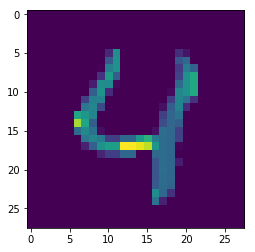

In [0]:
plt.imshow(x_test[4])
plt.show()

# SAVE AND LOAD MODEL

In [0]:
model.save("enter name here.h5")

Function will save:


*   The architecture of the model, allowing to re-create the model.
*   The weights of the model.
*   The training configuration (loss, optimizer).
*  The state of the optimizer, allowing to resume training exactly where you left off.




In [0]:
from keras.models import load_model
new_model = load_model("saved name file.h5")

In [0]:
new_model.summary()  #should have exact same summary as saved model